In [1]:
# Import necessary packages
import numpy as np
import cobra
import cobra.flux_analysis
import pygad
import copy
import matplotlib.pyplot as plt
import libsbml
import pandas as pd
import numpy as np
import pandas as pd
import random

In [2]:
from cobra.io import load_model
from cobra.util import create_stoichiometric_matrix
from cobra import Model, Reaction, Metabolite
from numpy import allclose, dot
from typing import TYPE_CHECKING, NamedTuple, Optional, Union

In [3]:
# Load a metabolic model
model = load_model("e_coli_core")

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [4]:
model2 = load_model("e_coli_core")

In [5]:
model2.reactions[1]

Reaction identifier,PFL
Name,Pyruvate formate lyase
Memory address,0x7f2233e9e990
Stoichiometry,coa_c + pyr_c --> accoa_c + for_c Coenzyme A + Pyruvate --> Acetyl-CoA + Formate
GPR,((b0902 and b0903) and b2579) or (b0902 and b0903) or (b0902 and b3114) or (b3951 and b3952)
Lower bound,0.0
Upper bound,1000.0


In [6]:
model.metabolites.coa_c

Metabolite identifier,coa_c
Name,Coenzyme A
Memory address,0x7f2233fca1d0
Formula,C21H32N7O16P3S
Compartment,c
In 9 reaction(s),"BIOMASS_Ecoli_core_w_GAM, CS, PDH, PFL, SUCOAS, AKGDH, ACALD, PTAr, MALS"


In [7]:
model2.objective='BIOMASS_Ecoli_core_w_GAM'#'y001882' #yali.reactions.xBIOMASS

In [8]:
solution = model2.optimize()
solution

,fluxes,reduced_costs
PFK,7.477382,-1.387779e-17
PFL,0.000000,2.081668e-17
PGI,4.860861,0.000000e+00
PGK,-16.023526,6.938894e-18
PGL,4.959985,1.517883e-17
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,-1.387779e-17
O2t,21.799493,0.000000e+00


In [9]:
model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [10]:
def fitness_func(ga_instance, solution, solution_idx):
    # Print the solution
    print("Chromosome ", solution_idx, ": ", solution)
    
    # Create a deep copy of the model
    model_copy = copy.deepcopy(model)
    penalty = 0
    
    # Manipulate the model with the solution
    for i, reaction in enumerate(model.reactions):
        flux = solution[i]
        if flux > 0:
            flux = 1000
            reaction.lower_bound = 0
            reaction.upper_bound = flux
        else:
            flux = 0
            reaction.lower_bound = flux
            reaction.upper_bound = 0
            
    print(model)
    # Perform FBA
    solution = model.optimize()
    print(solution)
        
    # Guarantee viability to model
    S = create_stoichiometric_matrix(model)
    flux_vector = solution.fluxes.values
    
    # Check mass balance of complete model
    is_balanced = allclose(dot(S, flux_vector), 0)
    if is_balanced != True:
        # Calculate a penalty based on the extent of the imbalance.
        # This is just an example - you might want to use a different penalty calculation.
        penalty += sum(abs(dot(S, flux_vector)))
        

    print(solution.objective_value)
    print(penalty)
    solution.objective_value = random.randint(1,99)
    print(solution.objective_value)
    # Return the objective value (biomass production)
    return solution.objective_value - penalty

In [11]:
num_generations = 100
num_parents_mating = 5
mutation_rate = 0.1

sol_per_pop = 10
num_genes = len(model.reactions)

init_range_low = -2 #0.0
init_range_high = 5 #1000.0

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 50 #porcentaje de genes de 2 a 1 en 50%

In [12]:
# Create a GA instance
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_type=float,
    init_range_low=init_range_low,
    init_range_high=init_range_high,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)

In [13]:
# Run the GA
ga_instance.run()

Chromosome  0 :  [-0.97782076  3.56165061  3.15820544 -0.73362806  3.11406596  3.3561266
 -1.89101558  0.74839817 -1.5377236   1.67728464 -0.03441037 -0.1132405
  3.82129083  4.95891702  2.63552599 -1.85512254 -0.55222309  0.31238327
  3.60570407  4.21128182 -0.77905405  3.39477825  4.3782228  -0.01068467
  1.18739044  0.25350248  0.05863024  0.75400264  3.4327654   1.53434985
  3.74966246  4.80279411  1.51856376 -0.06749508  3.20613627 -0.7268316
 -0.61089697  1.10500226  0.43476434  4.27384232  2.49711341  2.04141513
  2.13937963  0.63549738  4.11439913  2.95857525  2.14067148 -0.14995507
 -0.60661336  3.94286857  2.65369566  4.25864549  0.02681704 -1.290475
  0.755432    2.72661827  3.89835878 -0.93930739 -0.67829388  1.99749597
  3.94977513  2.02078687  0.64421497  2.82093293  0.79034607 -0.07055792
  0.5958524  -1.92117084 -1.26726105  4.36920866  0.64470578  1.16830908
  2.3541167  -0.48870042  1.19770206  1.54584172 -0.37849973  1.96884896
  0.02350712 -0.14897753  0.18240274  4

<Solution 0.000 at 0x7f22339723d0>
0.0
0
93
Chromosome  6 :  [-1.80775897e+00  2.91226292e+00  1.47569108e+00  2.88402994e+00
 -8.98884617e-01  3.04518728e+00  3.91932394e+00  4.92677450e+00
  6.37827001e-01  3.97321294e+00  4.17182516e+00  3.11881079e+00
  2.51362703e+00  2.73952269e+00  4.22865431e+00 -1.31255947e+00
  3.11986326e+00  3.14484937e+00  4.01496024e-01 -8.72982586e-01
 -6.75714910e-01  3.33407496e+00 -8.03013950e-01  4.66479589e+00
  9.71766527e-01  2.05119505e+00  4.56150785e+00 -1.94446949e+00
  2.39367095e+00  4.11440722e+00  4.31396988e+00  2.57305674e+00
  1.24792387e+00 -3.86295339e-01  1.48851513e+00  4.84565365e+00
  6.90663101e-01  3.80250229e+00  2.98823375e+00  4.41723112e+00
  3.74768237e+00  4.16363454e+00  8.45519822e-01  4.52547202e-01
  2.57129383e+00  3.13407823e+00 -8.72347726e-01 -2.00154764e-01
  7.06298703e-01 -1.63530133e+00  1.32697757e+00 -1.61462533e+00
 -4.59207505e-01 -1.75986622e-01  4.93819462e-01  1.51819859e+00
 -1.73784417e+00 -1.31515142e

<Solution 0.000 at 0x7f22337c6750>
0.0
0
75
Chromosome  2 :  [-0.64509966  0.63883439  0.69160119 -1.72096652  3.87780669 -0.68489983
  2.19173552  3.3811755  -1.13733793  0.37871386  0.10458341  1.37467082
  1.06654954  1.98252028  2.49946689 -1.13652112  2.59448977 -0.28612606
  1.54204408 -2.21130721  1.21786042  1.33885713 -1.83610251  4.96225927
  1.09883514  2.88490564 -2.01089597  0.99489359  0.84452956  3.51426425
  0.43250833 -0.96541962 -1.41553296 -0.02722398  2.07034621  1.29325675
 -1.80006468  1.98656965  2.46068542  0.39345872  0.33117464  2.63519634
  3.05636007  4.13543798 -0.35761738  4.64691302  1.46577349 -2.59300315
  2.07981399  3.48431754 -1.29558744  1.46915473 -0.44471055  0.75699413
  1.97903936  3.37363493  4.48828719  0.9506647  -1.68990962  0.86573634
 -0.61774644 -1.40923827 -1.1173135   0.03077479 -1.42754612  2.46632873
  1.2874346  -0.47656125  2.17954183 -1.65040223  2.82714939  0.63820191
 -1.15137877  3.02501574  3.00697996  1.59851298 -2.70726407 -1

<Solution 0.000 at 0x7f2233429650>
0.0
0
68
Chromosome  8 :  [ 2.07075889e+00  4.98692719e-01 -7.45217142e-01  1.29771302e+00
  1.20358328e+00 -6.20650956e-01  3.43315638e+00 -1.14175813e+00
 -3.50292509e-01  4.58742889e-01 -1.95146827e+00  1.93045368e+00
 -1.29796355e+00 -1.70958837e+00  5.50118005e+00  2.86233330e+00
  1.31204304e+00  4.29027665e+00  2.51790611e-01 -8.36482488e-01
  3.62061443e+00  4.44178416e+00 -1.05387448e+00  1.51247858e+00
  4.11410622e+00  2.99059854e+00  2.01632145e+00  4.48937043e+00
  1.77002995e+00  3.39455522e+00  2.81669928e+00  2.64581423e+00
  1.68866134e-01  4.28843737e+00  1.28041721e+00  2.36989152e+00
 -1.93522693e+00  3.77350485e-01 -5.79824817e-01 -2.44091583e-01
 -4.58676586e-01  5.73311939e+00  1.18608268e+00  3.77324374e+00
  2.58493923e+00  3.55354159e+00  1.55262912e+00 -1.95587121e+00
  5.19916576e+00 -8.10790281e-01 -1.22882718e+00 -1.93842591e+00
  3.05972581e+00 -3.42179480e-01  2.90757602e-01 -9.81605416e-01
  1.66288559e+00 -1.15576275e

<Solution 0.000 at 0x7f2233c15090>
0.0
0
46
Chromosome  3 :  [ 1.62142563  1.3109741  -1.69344849 -0.3626605   0.56032339 -0.62065096
  3.73828788 -0.76948278 -1.01844366  0.45874289 -1.23851818  2.88869574
 -1.36234342 -0.99411823  4.80494505  3.58501608  0.0692522   4.9213163
  0.25179061 -1.40884326  3.62061443  5.15952271 -1.52981362  1.51247858
  4.20171842  2.15190754  1.56874146  4.44577026  2.27768828  2.6411726
  2.92404147  2.4322501   2.78260146 -1.06837555  0.30983703  5.31012336
 -1.34946464 -0.39439976  3.2168724   0.91368821 -0.66992705  4.86010723
  0.60956506  2.9935195   1.84572572  3.55354159  1.55262912 -1.83078377
  5.43639998 -1.44152111 -1.22882718 -2.78616658  3.05972581 -1.24250171
  1.20047715 -0.98160542  2.28337141 -1.1942273   3.22945752  1.21216863
  1.08110849  3.2163948   2.82260613 -2.03406143 -0.46836092 -0.85986408
 -1.57399807  4.86338565  2.48087585 -0.90690573  1.71342716  0.13465913
 -0.62507113  3.84543083  0.72841376  0.54706872  5.15706227  4.5

<Solution 0.000 at 0x7f22338ee9d0>
0.0
0
6
Chromosome  8 :  [ 1.53712959  0.49869272 -1.69344849 -0.3626605   0.56032339 -0.61559302
  2.94185404 -0.76948278 -0.29089084  0.45874289 -1.83180559  3.14393429
 -0.80852477 -0.99411823  4.80494505  2.8623333   0.56354866  4.10453751
  0.25179061 -0.97495041  3.91716126 -0.74509752  3.17712243  4.86621503
  1.89141624  4.25294815  2.08985269  1.10530711  0.83005411  2.37811384
  1.72414751  0.80591644 -1.45050527  0.84410895  0.60263846  0.61655113
 -2.06541087  2.08487627  2.46068542  0.85039626  0.90325016  3.61255365
  3.00744249  5.34347989 -0.35761738  5.02515769  1.08194096 -1.59608154
  2.49584091  3.66219192 -1.11832685  1.46915473  0.03455255  0.92099334
  0.43962735  3.80061902  4.27426893 -0.09775996 -0.91891665  1.3761194
 -0.61774644 -1.40923827  0.12834504 -0.02773388 -1.42754612  2.46632873
  1.73390972 -0.11312577  1.64436241 -2.44157088  3.6120496   2.20310219
 -1.394918    2.49631295  4.24035871  1.59851298 -1.3875224  -1.3

<Solution 0.000 at 0x7f2233276bd0>
0.0
0
63
Chromosome  4 :  [ 2.91088884  0.87594976  3.2833189   2.13443068 -0.75602151  3.21718789
  3.6586881   2.83229645 -0.23989686  2.96063223  4.13248952  3.15665865
  0.88990318  0.59330221  3.70824723  3.97234183  0.42311584  3.70396544
  4.53127515  1.09004359 -0.63095408 -1.23975055  2.23363772  4.58845879
  2.01649791  4.59083454  2.08985269  0.28246525  1.11365689  1.63008656
  3.93569999 -0.06995274 -0.16042362  0.84410895  0.60263846 -0.28696893
 -1.17431126  2.80896736  2.77201004  0.3529175   4.58521511 -2.38072506
  1.01825664 -1.99087569  4.93773656 -2.77040856 -2.11858062 -1.28171877
 -1.60587623  4.64371273  1.40468398  2.16998998  1.98055851  5.16812964
  2.24798181  3.71970422 -0.90886485  1.16419274  4.4644056   0.08679288
 -1.78799633  3.75684082  3.96849411  4.76563095  3.35269484  4.61131669
  1.37249523 -2.26166087  0.33827675  3.57948753  0.86186315  1.57723884
  0.91556356  1.86162678  3.64913986  4.13453668  1.92618715  5

<Solution 0.000 at 0x7f2233067ed0>
0.0
0
22
Chromosome  9 :  [ 3.38886174  1.27409956  3.33338117  1.82540295 -1.23582113  3.5288992
  3.62895558  2.83229645 -0.02879481  2.25704173  4.13248952  4.14181576
  1.07879551  1.55798228  3.77434429  3.81349147 -0.52273325  4.29422001
  4.32277539 -0.48565006 -1.73175083  0.45584348  2.1976529   3.65482525
  2.22772187  3.85712798  3.58040357  0.72338825  1.00087004  2.99267457
  1.70310625  1.36545244  2.85421942  0.62217069  3.15985903  4.60145129
  1.0438074  -2.20816009  2.42672835  0.44426861  2.9208606   0.1480744
  1.2288983  -1.49833028  0.80283608 -0.80939029  2.67586357  4.26792993
  1.5380066   2.82434686  5.38377946  2.67233663  4.59416705  0.17043543
  2.55709256 -0.29137511 -1.17726948  2.61910886 -1.96584719  0.97780787
  0.42838388 -1.27794468  2.82709591  2.86712244  3.84376949  4.89598898
  1.37249523 -2.22869445 -0.29213318  4.43580812  0.64025761  1.51971985
  0.7122313   0.97044235  3.89242745  3.93095316  1.17669248  3.4

<Solution 0.000 at 0x7f22336bbbd0>
0.0
0
81
Chromosome  9 :  [-0.28360824  0.73056268  0.82966052 -0.63100942  0.15935647  0.31891679
  3.44492764 -2.14589027  0.34090971 -0.52904035 -0.82222134  2.33283048
 -1.04115563 -0.7833464   4.80494505  4.0596486   1.67687414  4.10453751
 -0.81569483  0.50122702  3.60292777  5.1101781   0.61459811  1.32355852
  5.50858681  3.53007574  1.50128346  3.68038641  0.82790643  3.39455522
  4.89112385  4.01421261  2.48971197 -0.34620296  0.30983703  4.65945555
 -1.34946464 -1.50520723  1.98069732  0.30390781  4.35125805 -3.27817027
  0.13721346 -0.36730097  4.94104574 -2.62421578 -2.44499434 -1.38088476
 -1.28454371  5.00597453  1.17331942  1.85051473  2.28080495  5.50843098
  2.64881943  3.35193941 -0.90886485  2.60112249  4.35712705  0.43006561
 -3.57601617  3.61844392  3.96849411  6.09715242  1.98576579  5.03814808
  2.96615492  3.57510965  1.35855148 -2.77670163  0.20948348 -0.81169451
  0.0444202   3.70450084  1.87632896  3.71022009 -0.57899876  1

<Solution 0.000 at 0x7f2233a27e50>
0.0
0
66
Chromosome  5 :  [ 2.91088884  1.15396276  2.93518533  0.99480607 -0.75602151  3.6950159
  3.09060679  2.83229645 -1.11328381  3.28330562  4.13248952  3.15665865
  0.11820026  1.50202751  2.71590964  3.61081058  0.42311584  3.70396544
  5.36900198  0.56757426  0.27510801 -0.60003099  2.33062993  3.76393017
  1.67553575  3.8664728   2.08985269  0.28246525  1.27397673  2.235577
  4.15918844 -1.22954301 -0.16042362  0.39131251  1.55692435 -0.28696893
  0.32481901  3.77183501  1.85348869 -0.34866252  5.43378207 -4.04517214
  1.50287819 -0.19010504  5.91232122 -2.36574019 -2.11858062 -1.12025075
 -2.38660249  4.37408065  0.6361178   2.62052227  1.98055851  5.16812964
  2.24798181  2.81015304 -1.42156999  1.96306997  4.4644056   0.08679288
 -1.11089418  4.41173248  3.96849411  4.76563095  3.04991471  4.83634475
  1.39510444 -3.2411195   0.50504576  3.57948753  2.52438002  2.10044672
  0.91556356  1.14753007  4.49844271  3.49772197  1.35759099  4.73

<Solution 0.000 at 0x7f2232da4c10>
0.0
0
75
Chromosome  1 :  [-0.69117512  1.33123846  1.98271286  0.4250778   0.18523243  0.11633103
  3.44492764 -2.14589027  1.27981767  0.11581212 -0.82222134  4.07245437
 -0.142151   -1.17080059  3.62904367  3.97577288  2.03248846  4.04304993
  0.7926033  -0.36044188  4.08874382  3.52631579  0.20641282  1.44798823
  5.65550373  3.1641478   1.50128346  4.50579465 -0.06214246  3.24503478
  4.75553982  4.01421261  3.52435541 -0.76279108 -0.53301053  6.05217991
 -1.47701347 -1.52851278  0.7561891   0.80964447  4.35125805 -3.12966485
  0.33548401  0.13636234  4.94104574 -3.15255838 -2.44499434 -1.73227847
 -0.62428224  5.79504614  0.85219261  1.24768813  2.67616807  5.31519051
  2.17453934  2.44521133 -0.75611985  2.01670923  3.62316478  0.74523427
 -3.57601617  3.60465206  3.90695868  5.29694892  2.04676821  4.34636021
  3.53506601  3.62456564  1.16896457 -3.16756395 -0.55438861 -1.52702072
 -0.74701061  3.60130521  1.81607338  4.05804279 -0.20725184  0

<Solution 0.000 at 0x7f2232a2ce90>
0.0
0
3
Chromosome  7 :  [ 3.05536736  1.14129987  3.2833189   1.55204199 -0.63073588  2.0595717
  3.6586881   2.85466395  0.06748821  2.08985581  4.13248952  5.42138646
 -0.01199392  2.33495894  1.79593726  7.14777201  0.67919833  4.31905659
  4.16287007  1.72325017 -1.09536809 -2.11073117  3.8726452   4.9222293
  1.83883401  3.97870128  2.20916116 -0.42692854 -0.09117492  0.71637487
  2.85894102  0.52997211  3.11635969  2.52579489  2.54450729  5.31752187
  1.12711385 -1.51841983  1.78738142  0.28867552  3.34477281  0.5970299
  1.51051446 -1.91189375  1.90551971 -1.35819816  1.80025052  3.61430404
  0.68889792  2.6977857   4.9345222   1.66016855  3.2771119   0.84841445
  4.15931059  0.71736623 -1.35847343  1.74773736 -1.25542422  1.31764877
  1.9370959  -1.86514977  2.04222906  1.06540039  3.83976918  4.82078413
  0.36879967 -1.22609635  0.63832045  3.30536699  0.15590909  0.87809879
  0.91003576  0.53839332  5.14818743  4.21276861  1.91760217  5.523

<Solution 0.000 at 0x7f2233c22710>
0.0
0
9
Chromosome  3 :  [ 3.4061304   1.77513273  3.33338117  1.94806919 -0.27678824  3.98662608
  4.4697079   1.86043806 -0.3554034   2.67107797  4.52057532  3.32336192
 -0.42934315  2.25275858  4.76066635  4.55994398 -0.90762534  3.81301355
  3.61714388  0.23853983  4.70823132  4.81994348  0.20641282  2.96587767
  5.82504135  3.47714559  0.2195683   3.97989544  1.70191367  3.24503478
  4.86059644  4.01421261  4.04161912 -0.74558467 -1.73161596  5.21828445
 -1.47701347 -1.50575681 -0.04878561 -0.25266689  4.35125805 -3.57432215
  0.13721346  0.29778913  5.5174742  -3.15255838 -1.81594677 -1.87114791
 -1.12152986  5.11509452  0.20826004  1.5506982   1.52414154  5.31519051
  1.63786983  2.63409187  0.04091822  0.45775335  3.87942498  0.22608862
 -4.40563669  4.21871     3.94217316  6.92193392  1.98576579  5.3443579
  3.98406176  2.35197575  0.82704931 -3.59893906 -0.54825483 -0.8591528
 -0.74701061  4.12016083  1.81607338  5.05578738  0.08902031  0.88

<Solution 0.000 at 0x7f2232f18e50>
0.0
0
93
Chromosome  8 :  [ 2.78555576  2.57924129  3.33338117  2.44185523 -0.80188204  3.98662608
  3.71234837  2.75031574 -0.29752697  2.6360704   3.80462716  3.32336192
  1.28111931  1.41771532  4.76066635  4.55994398 -0.90762534  2.9782641
  2.99882744  0.23853983  3.85148816  4.14233161  0.20641282  2.96587767
  5.72765549  3.13338717  0.6491463   3.97989544  1.70191367  3.24503478
  4.80220136  4.01421261  3.52435541 -1.34912593 -1.39116298  5.21828445
 -1.47701347 -1.52851278  0.8335958  -0.44197354  3.97444493 -2.75238874
  0.13721346  0.29778913  4.94104574 -3.15255838 -1.53870191 -2.12292192
 -0.98420639  5.70516367  0.1217883   1.5506982   2.28080495  4.70022464
  2.73375239  2.63409187  0.04091822  1.14422486  3.87942498 -0.82400312
 -4.51201564  3.60465206  3.03177565  7.5281977   1.74244743  5.52073977
  3.98406176  2.22799827  0.82704931 -2.77670163 -0.27079217 -1.69824375
 -1.55687189  4.12016083  2.45177122  4.11121407 -0.20725184  0.

<Solution 0.000 at 0x7f2232f88250>
0.0
0
46
Chromosome  4 :  [ 3.26398194e+00  2.57924129e+00  3.33338117e+00  2.64118086e+00
 -1.36953989e+00  3.99599121e+00  3.13560771e+00  3.15574780e+00
 -3.17600385e-01  2.63607040e+00  3.93140990e+00  3.13064662e+00
  4.36833459e-01  1.41771532e+00  4.76066635e+00  4.55994398e+00
 -1.39347031e+00  2.97826410e+00  2.06850527e+00  2.38539827e-01
  3.85148816e+00  4.14233161e+00  2.06412817e-01  2.96587767e+00
  5.99973990e+00  3.00371731e+00  6.49146302e-01  4.67171389e+00
  1.70191367e+00  3.60278628e+00  4.80220136e+00  3.04023956e+00
  3.52435541e+00 -1.34912593e+00 -1.39116298e+00  6.19527712e+00
 -1.96806517e+00 -1.52851278e+00  8.33595796e-01 -4.50053626e-01
  3.97444493e+00 -3.64969600e+00  6.15157524e-01  2.97789128e-01
  5.41109048e+00 -3.15255838e+00 -1.93959456e+00 -2.12292192e+00
 -9.84206390e-01  5.42177546e+00  1.21788302e-01  1.55069820e+00
  2.28080495e+00  4.70022464e+00  2.44776826e+00  2.18602928e+00
 -7.83439322e-01  6.18013145e

<Solution 0.000 at 0x7f21e4c12310>
0.0
0
35
Chromosome  9 :  [ 2.78555576  1.83409317  4.02284937  1.50848447 -0.80188204  3.98662608
  4.39758596  2.75031574 -0.29752697  3.19903636  4.79415089  4.05853832
  1.21236583  1.41771532  4.76066635  4.42025658 -0.90762534  2.35194487
  2.99882744  0.23853983  3.85148816  3.5558768  -0.16753864  2.96587767
  6.72499452  3.19317669  0.6491463   3.97442509  2.18763069  2.74295012
  4.00329345  4.53289931  2.6666995  -2.01106807 -1.39116298  5.21828445
 -1.2219596  -1.47808905  0.27218445 -0.78394082  3.82779416 -2.16666879
  0.23712935  0.29778913  5.37384901 -3.15255838 -0.98349172 -1.43094279
 -0.89142133  5.70516367  0.1217883   1.5506982   2.6941403   4.70022464
  2.73375239  2.48149523  0.04091822  0.86523353  3.87942498 -0.82400312
 -4.51201564  3.50367762  2.20854018  7.5281977   1.96245164  5.52073977
  4.00693615  2.09396195  0.82704931 -3.59500267 -0.27079217 -1.69824375
 -1.55687189  4.10180448  2.45177122  4.60403118 -0.20725184  0

<Solution 0.000 at 0x7f21e4c08150>
0.0
0
12
Chromosome  4 :  [-0.52353786  0.8463105   1.27440744 -2.20038036 -0.97028377 -0.61442601
  3.44492764 -2.39591107  2.27977199 -0.45275846 -0.82222134  3.83847515
 -0.01452074 -1.83000712  3.45063278  5.9912374   2.89655423  4.10453751
  0.8280964  -0.33990183  5.20008289  3.96386165  1.30212121  3.32964929
  2.66111994  4.30461512  2.36401676 -0.07839303  0.45623124  2.45250127
  2.01873119 -0.2459973   1.01024882  0.86173315  4.17793164  3.93554843
  1.66468013 -0.15768783  1.78296316  0.75262364  3.27026093  0.01837149
  1.2835918   0.97149571  0.04186861 -0.89684055  2.88897347  3.76840631
  2.54513625  3.43869654  4.99597757  1.04783143  4.74893905  0.10035733
  2.24165559  0.54617526 -1.786244    1.17063577  2.27190227 -0.5848781
 -4.00854447  3.86350443  2.6821013   6.36020466  2.7938583   5.3443579
  3.90880114  2.72938241  1.31506758 -1.73125434 -1.46965078 -2.07406655
 -1.89522626  4.09873644  2.34604432  3.94429631 -2.08220689  1.3

<Solution 0.000 at 0x7f2233c61750>
0.0
0
67
Chromosome  9 :  [-0.52353786  1.37879127  1.27440744 -1.60196131 -0.50546346 -0.40455888
  3.25633331 -2.39591107  2.30131443 -1.13224975 -0.79374953  2.94202467
 -0.90112492 -1.83000712  3.51513926  5.11254383  2.89655423  4.39806376
  0.29413602  0.43471296  5.8772204   4.05311767  1.30212121  3.32964929
  3.47364256  3.85712798  3.2634747  -0.07839303  0.25522118  1.85020961
  1.15502934  0.28497784  2.03779115  0.86173315  4.12089744  3.20960142
  1.66468013 -0.15768783  1.78296316 -0.60466255  2.98894253  0.7812677
  1.25649501  0.97149571 -0.90798281 -0.37771119  4.11560172  3.09990036
  3.01336725  3.04778723  4.45873911  1.04783143  5.66552473  0.10035733
  2.24165559  0.31457764 -2.17392483  2.16061019  2.83156288 -0.98992706
 -4.00854447  3.60465206  3.31042472  7.06406037  2.7938583   5.3443579
  2.92487967  2.71704668  0.89208072 -2.34220244 -1.12291909 -1.44200203
 -1.68264678  4.96991531  1.70501014  4.6832573  -2.10343922 -0.0

<Solution 0.000 at 0x7f2233486ed0>
0.0
0
7
Chromosome  5 :  [-0.52353786  0.8463105   0.77270977 -2.20038036 -0.60883068  0.2522976
  2.57377214 -2.39591107  2.27977199 -0.71567999 -0.82222134  4.18889753
 -0.42674055 -1.83000712  3.45063278  6.42818026  3.86100649  4.10453751
  0.8280964  -0.33990183  4.84554442  3.63933862  0.87696038  4.15700078
  2.66111994  4.30461512  2.60941164 -0.10966783 -0.34207415  2.45250127
  1.25836672 -0.98506544  1.01024882  1.42310236  4.26340713  4.48813216
  1.66468013 -0.15768783  1.78296316  0.75262364  3.27026093  0.23857377
  0.79358393  0.97149571 -0.86988655 -0.89684055  2.72895943  3.70798574
  2.00698283  4.12491789  4.99597757  0.26514188  5.34066597  0.10035733
  3.17482192  1.38077978 -1.786244    0.46405225  2.27190227  0.1989403
 -4.00854447  3.80174157  3.30658467  5.75325088  2.7938583   5.3443579
  3.50804192  3.63092403  0.73471186 -1.4865824  -1.30538704 -1.78532175
 -1.89522626  4.48380272  2.34604432  4.23751886 -2.49048297  2.132

Chromosome  1 :  [ 1.00418256  2.82120777  2.48008924 -0.15484146 -0.57490183  0.31488153
  3.54662128 -2.99251997 -0.64452602 -0.53200935 -0.12444556  2.60561781
 -0.13057417 -3.38700041  2.68488039  4.95122639  3.12381994  4.72104171
  0.10237424  0.47172299  3.86954482  3.52631579 -0.77880788  2.6545289
  7.83811029  4.25452742  1.76447363  4.07515528  0.43278576  3.64792444
  3.9312708   5.03131762  3.46518185 -1.55459038  0.11527811  4.60522212
  1.81442913 -0.26895955  0.69753405  1.76092796  2.49346401 -0.20440598
 -1.18675903  0.27344865  0.52999887 -0.89684055  3.3814588   3.69217012
  1.91458862  3.59288944  4.12799637  1.04783143  4.90274949  0.9000982
  1.80307248 -0.41788408 -1.91549976  1.45932831  0.81436019 -0.5848781
 -4.00854447  3.86350443  3.61876653  6.73127758  3.16177363  4.50106296
  4.59996366  1.7606882   0.94105877 -2.34704209 -2.38674115 -1.25677972
 -2.1752866   4.58217177  2.63662635  4.76763227 -2.08220689  1.11075438
  0.11899087 -0.78873839  4.69977258 

<Solution 0.000 at 0x7f21e4751050>
0.0
0
76
Chromosome  7 :  [ 0.03743455  1.08984562  1.78924008  0.04997119 -0.67760771  0.11633103
  3.44492764 -1.52061396  0.81155985 -0.05164644 -0.83860862  3.46329186
 -0.142151   -1.96001671  3.62904367  4.25041315  2.49725373  4.10453751
  0.52068027 -0.08839742  3.35378794  3.52631579  0.22684724  1.99382806
  5.00032594  4.13490395  0.52501334  3.65046347  1.43013299  2.52356491
  3.53631293  4.46836246  4.45395446 -1.07408682 -0.48401932  6.03504098
 -0.28988431 -1.52851278  1.5955988   0.30390781  4.39343531 -3.2420324
  0.45508281 -0.95469154  4.82215935 -3.15255838 -3.40895724 -1.10682341
 -1.19029904  5.79504614  0.86814858  2.13556149  1.79122518  4.85504947
  2.82629929  2.13832442 -0.77456555  2.74942263  3.05161298  0.43006561
 -3.57601617  3.04571124  3.96849411  5.37624141  2.22594902  4.73813938
  3.85937947  1.88355868  2.08330588 -2.77670163 -1.38746918 -0.15783751
 -0.29595936  3.33246068  2.80377781  4.14598415  1.28109222  1.

<Solution 0.000 at 0x7f21e482e1d0>
0.0
0
97
Chromosome  2 :  [ 0.05332971  1.2998264   1.78924008  0.92317889 -1.0819781   0.65897077
  3.24325208 -2.14589027  0.22478901  0.05510406 -0.69686813  4.15790741
 -0.67968715 -2.83133035  3.68597426  5.09901726  1.74427368  4.46732687
  2.47436359 -0.36044188  3.99057776  3.95723795  1.30212121  2.79552177
  3.2485622   3.11581468  4.52762456  2.09220862  0.25522118  2.79720764
  1.31548903  0.15815997  1.66567916  0.86173315  4.42330545  3.16353473
  1.59809328 -0.15768783  0.85218871 -0.00846428  2.98894253  0.74769223
  1.25649501 -0.01184887 -0.90798281 -0.22283023  5.68154764  2.72093802
  3.01336725  3.75182601  4.58525369  1.10661439  5.22316758  0.39106584
  2.24165559 -1.10563207 -1.73519441  1.16959635  2.64890663 -0.98992706
 -4.59978997  3.64052711  2.94879132  8.04019323  2.7938583   5.02893828
  2.45120544  2.06439832  1.03992687 -1.98379318 -0.63846587 -1.1372386
 -2.50857348  4.55466338  1.70501014  4.27545547 -1.83538788  0.

<Solution 0.000 at 0x7f22331b9390>
0.0
0
22
Chromosome  7 :  [ 0.05332971  1.48472249  1.87488177  0.04997119 -0.41572064  0.65897077
  3.44492764 -2.14589027  1.46911406  0.05510406 -0.69686813  3.5811452
 -0.18084938 -1.90225887  3.26481559  4.17616625  1.76410816  4.68773922
  1.75647447 -0.81651773  3.0791284   4.29535896  1.28310992  2.86229923
  5.83430521  4.87173317  1.79861855  3.65046347  0.66696233  3.24503478
  4.2155697   4.46836246  3.72561212 -1.07408682 -0.50359528  6.84183234
 -0.91443837 -1.04956015  1.21215449  0.30390781  4.37164946 -2.50876189
  0.45508281 -1.66186346  4.05750423 -3.91521362 -1.48087423 -2.16201831
 -1.12152986  6.70044822  0.44400531  1.89579935  2.84847018  4.46368927
  1.9530119   1.31415139 -0.30218763  2.01670923  3.02367482  1.10499165
 -5.30457695  3.94368166  3.96849411  5.96796149  0.65441185  4.68579466
  3.85937947  3.26196453  1.42769653 -2.3808212  -0.91256312  0.21930917
  0.0356874   3.32318306  2.25834903  4.35858589 -0.03431597  1.

<Solution 0.000 at 0x7f21e4b2e890>
0.0
0
43
Chromosome  3 :  [ 5.33297100e-02  1.11607106e+00  2.48390204e+00  1.77258937e+00
 -1.08197810e+00  6.58970773e-01  2.45585880e+00 -2.04132527e+00
  2.24789010e-01  5.51040643e-02 -1.68979392e-02  4.15790741e+00
 -6.79687154e-01 -2.73167411e+00  3.73047317e+00  5.09901726e+00
  1.74427368e+00  4.46732687e+00  2.47436359e+00 -3.60441876e-01
  3.81922136e+00  3.95723795e+00  2.07116266e+00  2.79552177e+00
  3.24856220e+00  3.68074977e+00  4.04657432e+00  2.09220862e+00
  2.55221183e-01  2.01876056e+00  1.31548903e+00 -3.91814008e-01
  1.66567916e+00  1.76901573e+00 -2.36376467e+00  5.48289767e+00
  1.64666932e-01  9.49085297e-01  1.50635109e+00  1.19615863e+00
  2.52540050e+00  9.15279916e-01 -1.05029868e+00 -5.69967658e-01
  5.91797346e-01 -2.03758917e+00  3.97357181e+00  3.60080480e+00
  2.54513625e+00  3.98521047e+00  5.16159566e+00  1.74849403e+00
  5.70026650e+00 -3.21467055e-01  1.50713720e+00 -3.57914616e-01
 -2.95434936e+00  1.87774350e

<Solution 0.000 at 0x7f21e4c64f50>
0.0
0
77
Chromosome  1 :  [ 0.15188614  2.82120777  1.86728875  0.99744537 -0.57490183  1.01199663
  2.93593622 -2.32636997 -0.18488336 -0.88974508 -0.06356656  2.56700132
 -0.39429052 -3.38700041  4.01485859  4.25041315  2.15968708  5.63333264
  0.19693744  0.47172299  3.56355813  3.52631579 -0.07889314  3.40286051
  6.09664049  3.58977873  1.27196574  4.30467985  1.48006599  0.69215881
  3.45761936  5.02633414  3.68968903 -0.91748465 -1.5664256   5.05556871
  0.77914961  1.15197109  1.45191414  0.95189675  2.5254005   1.91497678
 -0.65473207  1.21431714  0.18963844 -2.29792466  3.97357181  3.6008048
  2.54513625  4.33112479  4.96160758  1.5341258   5.56666427  0.36171191
  2.83145091  0.35463321 -2.44696997  1.15036129  1.49060996 -1.2498856
 -3.64044345  3.629039    4.01520161  6.73127758  3.16177363  4.33546603
  2.6927785   1.65195941  0.76157578 -2.70223869 -1.41120836 -2.71472186
 -2.14932664  4.23989498  2.07794398  4.26695601 -2.09827231  2.2

<Solution 0.000 at 0x7f21e42c0c50>
0.0
0
80
Chromosome  6 :  [ 0.59845624  2.82120777  3.46349447  0.70681951 -0.57490183  1.01199663
  3.54662128 -2.32636997  0.01080681 -0.88974508 -0.06356656  1.90434054
 -0.80712082 -3.38700041  3.50530437  4.25041315  2.15968708  4.72104171
  0.7560579   0.3111951   4.25930018  3.52631579  0.20765924  3.25307405
  7.0010491   4.03112089  1.49604429  4.94383064  1.02874476  2.85291894
  3.28764217  4.87249965  2.79554468 -2.08483694 -0.76988432  4.03331467
  2.50629087  0.09640322  1.45191414  1.76092796  1.43411452 -0.03654212
 -1.00206206  0.01961466 -0.58734357 -0.89684055  3.3814588   3.11504637
  2.87440213  3.92681774  4.48306804  1.04783143  5.93290397  0.9000982
  1.31638406 -0.95987876 -2.67762715  1.17063577  2.29113134 -0.23703281
 -4.12450714  3.86350443  3.51300228  6.2512143   3.16177363  3.95936768
  2.6927785   2.36087603 -0.15085072 -2.65837404 -1.41120836 -2.71472186
 -1.7988191   4.88945741  2.60085438  4.11880989 -1.15965985  2.

<Solution 0.000 at 0x7f2232f17550>
0.0
0
67
Chromosome  2 :  [ 7.68396625e-01  2.82120777e+00  2.48008924e+00  4.93830787e-01
 -5.74901834e-01  1.01199663e+00  3.54662128e+00 -3.10905951e+00
  1.08068128e-02 -1.22983244e+00 -6.35665623e-02  2.35887225e+00
  9.82687073e-01 -3.38700041e+00  3.50530437e+00  3.70326859e+00
  2.15968708e+00  4.72104171e+00  1.96937443e-01  4.71722991e-01
  4.66110672e+00  4.10918672e+00 -5.56683079e-01  2.73463127e+00
  7.54817888e+00  4.26602645e+00  9.28829952e-01  5.50227275e+00
  1.12149890e+00  2.73690828e+00  3.84245610e+00  4.87249965e+00
  3.46518185e+00 -2.13431376e+00 -1.53671721e+00  4.60522212e+00
  2.25602573e+00 -6.39643754e-01  2.18485622e+00  1.76092796e+00
  2.14679215e+00 -5.65150875e-01 -8.15776886e-01  2.73448647e-01
  3.33553383e-01 -8.96840548e-01  3.15196371e+00  3.60080480e+00
  2.54513625e+00  3.98040607e+00  5.77065859e+00  1.04783143e+00
  5.70026650e+00  9.00098205e-01  1.58480891e+00 -2.02684013e-01
 -3.58237075e+00  1.17063577e

<Solution 0.000 at 0x7f2233af5f10>
0.0
0
2
Chromosome  8 :  [-1.85858117  1.27038819 -0.85155212 -0.88155463 -0.38509298  0.01351829
  5.43956281 -2.32636997  0.5431405  -1.40509682 -0.06305545  3.26966859
 -0.28282655 -4.3486939   4.01485859  4.25041315  2.15968708  5.56121747
  0.19693744  0.47172299  3.56355813  3.75563443 -0.84127124  3.90176759
  6.09664049  3.58977873  0.38053445  4.30467985  1.24703297  0.69215881
  3.45761936  5.02633414  3.12138958 -0.9896697  -1.5664256   5.05556871
  0.81668404  1.15197109  1.61931354  0.95189675  2.73512107  2.90553008
 -0.65473207  1.21431714 -0.6634182  -2.29792466  4.53946178  4.4374688
  2.78302991  4.33112479  4.30847569  1.5341258   5.56666427  0.8910199
  2.83145091  0.35463321 -1.68854743  1.15036129  1.49060996 -1.53145602
 -3.64044345  2.67420442  4.01520161  7.67918768  3.16177363  4.33546603
  2.6927785   1.13924068  0.73527712 -2.70223869 -1.39341045 -2.71472186
 -1.81604555  4.23989498  2.41491435  4.47264107 -2.63628249  2.42

<Solution 0.000 at 0x7f21e49dc910>
0.0
0
90
Chromosome  4 :  [-2.14133214  1.27038819 -0.85155212 -1.46045255 -0.38509298  0.75436138
  4.62335515 -2.32636997  0.5431405  -1.40509682  0.78559971  2.33730031
 -0.54991156 -4.3486939   3.62603337  4.19232079  2.15968708  5.56121747
  0.19693744  0.47172299  3.56355813  2.89801073 -0.84127124  3.99607153
  6.09664049  3.58977873  0.38053445  4.30467985  1.6082104   0.69215881
  3.76087407  5.86642929  3.93624231 -0.75724157 -1.5664256   5.61055316
  0.81668404  1.15197109  1.61931354  0.95189675  2.13481112  3.15179626
 -0.17945929  1.21431714 -0.49532484 -2.29792466  4.53946178  4.4374688
  2.09132197  4.33112479  5.05077417  1.5341258   4.6153815   0.8910199
  2.66535513  1.32253192 -1.68854743  1.15036129  1.49342248 -1.53145602
 -3.28736252  2.67420442  4.01520161  7.67918768  3.52559224  4.33546603
  2.19433098  1.13924068  0.73527712 -3.57829969 -1.57456779 -2.71472186
 -1.70494791  4.23989498  1.45499253  3.80858081 -2.63628249  2.4

<Solution 0.000 at 0x7f21e4493690>
0.0
0
85
Chromosome  9 :  [-2.5107934   0.92926671 -0.85155212 -0.51976632 -0.38509298 -0.85329907
  6.01867853 -3.26790182  0.85372564 -1.40509682 -0.06305545  3.26966859
 -0.28282655 -4.31898913  4.01485859  3.45813978  2.15968708  6.42800003
  0.19693744  0.47172299  3.56355813  3.75563443 -1.62582822  4.54668653
  6.09664049  3.58977873  0.38053445  4.30467985  1.24703297  0.0166827
  3.79611888  5.02633414  3.12138958 -0.9896697  -1.5664256   5.85311325
  0.81668404  1.15197109  2.20152645  0.55309463  2.65590566  2.13996069
 -0.65473207  1.63763137 -0.41289175 -2.15424533  3.95371436  4.4374688
  2.78302991  4.38706798  4.30847569  1.8707455   6.09497941  0.01472819
  2.83145091  0.35463321 -1.68854743  2.03158781  1.49060996 -1.78192783
 -2.84657641  2.68465775  3.53015846  7.67918768  3.4704432   4.05217272
  3.12919898  1.60712786  0.73527712 -3.24812731 -1.39341045 -2.71472186
 -1.81604555  3.49688336  2.41491435  4.47264107 -2.07101786  2.4

<Solution 0.000 at 0x7f21e3ea5bd0>
0.0
0
10
Chromosome  5 :  [-2.14133214  1.27038819 -0.57384875 -1.46045255  0.46589961  0.91519762
  4.47517761 -2.32636997  1.07108952 -1.40509682  0.25616698  2.33730031
 -0.16590264 -5.18639263  2.98865154  4.19232079  2.15968708  5.98602138
  0.19693744  0.21412955  2.93719153  3.26114741 -1.65842085  3.1491621
  6.09705207  3.58977873  0.38053445  3.71846176  1.6082104   0.69215881
  4.15335755  6.24665854  4.65091594 -0.75724157 -2.36580747  4.75650675
  0.33826573  1.15197109  1.00948101  1.74421267  2.13481112  3.15179626
  0.47968861  0.46969992 -1.03006856 -2.07582392  3.85162779  5.01900932
  2.09132197  3.34704237  5.05077417  1.78277766  4.6153815   0.8910199
  2.66535513  1.32253192 -1.445953    1.99290349  1.42189803 -1.53145602
 -3.28736252  1.91285857  4.78301605  7.35488792  4.50411856  4.33546603
  1.66804085  1.13924068  1.38131776 -4.30250501 -1.57456779 -2.71472186
 -1.70494791  4.23989498  1.45499253  4.06607875 -2.63628249  2.4

<Solution 0.000 at 0x7f21e3cfb410>
0.0
0
71
Chromosome  1 :  [-1.51282519e+00  5.65407491e-01 -8.51552121e-01 -2.37174568e+00
 -6.42262007e-01 -5.76340726e-01  4.38067082e+00 -3.21534869e+00
  3.68096325e+00 -7.60930737e-01 -1.41999873e-01  2.01726258e+00
 -1.08818579e+00 -3.24947691e+00  5.33595015e+00  5.52532462e+00
  2.63781568e+00  5.33525356e+00  1.87543292e+00 -1.80717387e-01
  4.65337244e+00  3.02248516e+00 -5.75272997e-01  3.85163618e+00
  6.69252994e+00  4.46047176e+00 -7.42221621e-01  4.11274888e+00
  1.15688236e+00  3.91146675e+00  3.96301780e+00  6.16993134e+00
  3.64993241e+00 -2.58101437e-01 -1.69225178e+00  2.67959088e+00
  1.95748474e+00 -4.29874031e-01  2.36325257e+00 -5.03242701e-01
  1.78878716e+00 -2.84475492e-01 -8.15776886e-01 -4.86031436e-01
  6.89001799e-01 -8.53737598e-01  3.83244516e+00  3.72483752e+00
  1.87398629e+00  4.62236431e+00  4.42992480e+00  5.02078994e-01
  4.79926570e+00  1.00265662e+00  1.96894458e+00 -1.20403700e+00
 -3.58237075e+00  2.52777143e

<Solution 0.000 at 0x7f21e3ba4f90>
0.0
0
93
Chromosome  4 :  [ 9.66902459e-01  2.71218078e+00  2.48008924e+00  7.72036935e-02
 -5.74901834e-01  1.68048999e+00  3.54662128e+00 -3.17700360e+00
  1.46666405e+00 -1.74563406e+00  3.43752882e-01  2.48956601e+00
  7.61217882e-01 -3.38700041e+00  3.63781955e+00  2.96108316e+00
  2.98824100e+00  4.72104171e+00  3.07446617e-01  8.41958829e-01
  5.64934170e+00  4.96790556e+00 -2.34759372e-01  2.04216283e+00
  7.88080380e+00  3.26713152e+00  7.96519311e-02  5.20896638e+00
  2.19965021e-01  3.67086287e+00  3.49144074e+00  5.81969802e+00
  3.78108413e+00 -2.13431376e+00 -1.75659263e+00  5.41648335e+00
  1.19283591e+00 -9.67080169e-01  1.84059621e+00  1.21626956e+00
  2.62786986e+00 -4.61646553e-02 -1.58309152e+00  6.15374839e-01
  3.33553383e-01 -8.96840548e-01  2.93307939e+00  3.70538358e+00
  2.80089301e+00  3.40929680e+00  3.80367199e+00  5.27329739e-01
  5.26867489e+00  9.93028545e-01  1.55772670e+00  4.52536478e-01
 -4.16384552e+00  7.49709189e

<Solution 0.000 at 0x7f2232c24110>
0.0
0
59
Chromosome  9 :  [ 1.68521983e+00  2.71218078e+00  2.48008924e+00  4.93830787e-01
 -9.16172294e-01  1.63570575e+00  3.54662128e+00 -2.72185283e+00
  6.41257971e-01 -1.22983244e+00  9.36219106e-01  3.41520135e+00
  1.36817428e+00 -3.38700041e+00  3.66527110e+00  2.96108316e+00
  2.73254779e+00  4.86686901e+00  5.89404138e-02  8.41958829e-01
  4.81927258e+00  4.96790556e+00 -5.33594109e-01  2.04216283e+00
  7.66257090e+00  3.19777630e+00  4.52249049e-01  5.96954120e+00
  2.19965021e-01  3.67086287e+00  3.70574724e+00  5.18005288e+00
  3.78108413e+00 -2.13431376e+00 -1.67164982e+00  4.88767512e+00
  1.83845122e+00  1.94469340e-01  2.74520820e+00  1.21626956e+00
  2.38038942e+00 -4.61646553e-02 -2.05871867e+00  6.15374839e-01
 -1.74932468e-01 -6.95099087e-01  3.22547437e+00  3.70538358e+00
  2.91534479e+00  3.98013421e+00  4.30089281e+00  1.72899962e+00
  5.16201368e+00  1.53881329e+00  1.55772670e+00  8.56586323e-01
 -5.07545442e+00  3.99558745e

<Solution 0.000 at 0x7f22338f4310>
0.0
0
18
Chromosome  5 :  [-1.843965    1.18333641 -1.73987321 -3.20454883 -1.2250707  -1.04526065
  5.43956281 -3.57117621  2.83449147 -1.11007457 -0.74757456  1.63875819
 -0.35479443 -3.31166232  3.5021446   5.63547694  1.31527318  4.88614768
  1.85151408  1.40343095  4.25930018  3.80669728  1.41771738  3.85163618
  6.95465315  4.85638386  0.44123283  3.37433535  1.15688236  2.39970828
  4.70764593  5.16252514  3.64993241 -1.05724689 -1.31944685  3.4083849
  1.11809677 -0.69165094  2.89984554  0.10743947  2.18204227 -0.04311261
 -0.54530164  0.75396469 -0.04781546 -1.26532611  4.20794149  3.6008048
  1.72919193  2.76287717  5.5901306   0.26654962  6.64137221  1.18017198
  1.93256463 -0.20268401 -2.13438674  1.87725649  1.96638833 -0.88966998
 -3.2546494   4.02106188  4.0181001   7.03194159  2.97907518  5.49412772
  4.59951019  2.46646081  0.17258757 -2.14457912 -1.46965078 -2.24607237
 -2.1027185   3.60649548  0.63150392  5.35289685 -1.86614731  0.5

<Solution 0.000 at 0x7f21e421ce50>
0.0
0
2
Chromosome  1 :  [-1.843965    0.56540749 -1.58170121 -1.62155108 -1.2250707   0.32942017
  5.58624539 -3.0581182   2.24852402 -0.24541594 -0.2025813   2.33623641
 -1.5801424  -3.06964948  4.10542772  5.28008656  1.2168027   4.88614768
  1.74552044  0.47172299  4.89121441  3.4077061   0.32871629  3.85163618
  7.46695542  3.83871968  0.87840395  3.37433535  1.15688236  4.03018126
  3.26255685  4.87249965  3.64993241 -1.05724689 -0.9041951   4.85337454
  1.11809677 -0.86527813  3.58308179  0.98878671  2.12235939 -0.9385767
 -0.28882356  0.89063803 -0.88863304 -0.66008635  4.20794149  3.6008048
  0.79545339  3.59288944  4.96160758  0.70248538  7.58745615  0.76444808
  1.93256463 -0.71496095 -2.57546362  1.59201167  1.09106442 -0.31970231
 -2.70511523  4.02106188  3.72261874  7.10370987  2.25294869  5.49412772
  5.50838829  0.78810248  0.8535376  -2.14457912 -1.46965078 -2.32713867
 -2.1027185   3.65464745  0.22969079  6.10125142 -1.86614731  0.35

<Solution 0.000 at 0x7f21e3995b90>
0.0
0
87
Chromosome  7 :  [-8.32304715e-01  5.65407491e-01 -8.51552121e-01 -1.22421079e+00
 -4.90582476e-01 -8.56747890e-01  3.39249026e+00 -4.80548490e+00
  3.73177426e+00 -7.32453312e-01 -1.41999873e-01  2.01726258e+00
 -1.90079898e+00 -3.24947691e+00  6.62821821e+00  5.66040735e+00
  1.81288832e+00  5.33525356e+00  1.33930626e+00  3.17731224e-01
  4.98679076e+00  2.05407155e+00 -5.75272997e-01  3.85163618e+00
  7.50096953e+00  4.10093460e+00 -3.04680520e-01  3.56542257e+00
  1.00320806e+00  3.91146675e+00  4.09917281e+00  6.16993134e+00
  5.15544359e+00 -1.02845124e+00 -1.86653398e+00  2.23466637e+00
  1.71069772e+00 -4.29874031e-01  2.36325257e+00 -5.03242701e-01
  1.64792987e+00 -1.80474482e-01 -1.96166025e+00  6.15374839e-01
  1.42330153e-01 -6.95099087e-01  4.18601580e+00  3.70538358e+00
  2.63553929e+00  4.08428426e+00  4.26317734e+00 -1.54779154e-01
  5.36629131e+00  1.68166114e+00  2.78999114e+00 -2.26621183e-01
 -3.58237075e+00  2.52777143e

<Solution 0.000 at 0x7f21e370b250>
0.0
0
98
Chromosome  3 :  [-1.21984999e+00  1.08014688e-01 -8.51552121e-01 -2.02063472e+00
 -7.53867119e-01  5.34470282e-01  6.04621778e+00 -3.91053617e+00
  2.23380445e+00 -2.45415944e-01  3.45586396e-03  1.33998074e+00
 -1.08818579e+00 -3.06964948e+00  3.45226538e+00  4.94672958e+00
  1.58424220e+00  4.24012923e+00  1.64611750e+00  2.29356676e-01
  4.87950386e+00  3.11327544e+00  1.05388424e+00  2.88102292e+00
  8.43277473e+00  5.16296383e+00  5.31253804e-01  2.71853827e+00
  1.15688236e+00  1.98886714e+00  3.38650629e+00  5.10426770e+00
  3.64993241e+00 -1.05724689e+00 -1.88604840e+00  4.24423623e+00
  1.51523319e-01 -1.19527807e+00  2.69537189e+00  1.07439469e-01
  1.87227446e+00 -8.38384185e-01  4.03676817e-01 -7.83016365e-02
 -4.78154572e-02  2.08142620e-02  4.20794149e+00  3.34159004e+00
  1.36083896e+00  3.59288944e+00  3.68273115e+00  4.17127828e-01
  5.83386380e+00 -1.45318733e-01  1.93256463e+00 -2.02684013e-01
 -2.65260171e+00  1.85529148e

<Solution 0.000 at 0x7f21e3564ad0>
0.0
0
72
Chromosome  7 :  [-1.02196441  0.8967612  -0.85155212 -1.53416101 -0.75555694 -0.57634073
  3.59256914 -3.47081574  3.71453469 -0.76093074 -0.19952064  1.84866997
 -0.79786629 -1.60622055  5.33595015  5.11585862  1.78099876  5.33525356
  1.57436451  1.14628938  5.15253616  2.03465318 -0.88019149  4.63669396
  6.69252994  3.80347023 -1.71251775  4.08779945  1.85641529  3.8027011
  2.41949909  6.47162562  3.86773501  0.27723531 -2.14136648  1.18789843
  2.05625302 -0.42987403  2.29019265 -1.52787108  1.78878716 -0.42988721
 -1.49580381  0.16626283  0.53845971 -1.05546626  2.66114959  3.26137861
  1.5906507   3.80549304  4.53157437  0.96321528  5.36629131  1.5757162
  2.76050434 -1.204037   -3.58237075  1.22966272  2.2858662   1.10415552
 -4.17279623  2.62918426  2.71137416  4.23426724  2.71995347  4.06813153
  4.59951019  0.74384952  1.50793147 -2.5335614  -2.31049977 -2.20206691
 -1.60108642  3.8836612   0.7889559   4.27743716 -2.56795298  2.4

<Solution 0.000 at 0x7f22328cb590>
0.0
0
68
Chromosome  3 :  [-1.91179983e+00  1.78450697e+00 -1.54849308e-01 -2.02063472e+00
 -1.06605034e+00  4.32283512e-01  5.18644484e+00 -3.05811820e+00
  2.23380445e+00 -2.45415944e-01 -1.48797394e-01  1.39265389e+00
 -1.14229170e+00 -4.80856453e+00  4.21148415e+00  5.74368502e+00
  1.57766397e+00  4.24012923e+00  1.29421774e+00  4.07577843e-01
  4.36820852e+00  4.02920781e+00  1.47772674e+00  2.88102292e+00
  7.46695542e+00  5.09776951e+00  3.12586221e-01  4.31996025e+00
  6.75546214e-01  3.51482036e+00  2.99060008e+00  5.04806279e+00
  3.16399319e+00 -3.42227875e-01 -1.86971878e+00  4.84656690e+00
  1.11809677e+00 -1.80498405e+00  2.88494034e+00  9.82291224e-01
  1.69163269e+00 -3.29412383e-01  1.37717775e+00 -6.03339907e-03
 -4.78154572e-02 -6.71262873e-01  4.20794149e+00  5.03597537e+00
  1.57115929e+00  3.59288944e+00  4.57884153e+00 -3.18521611e-01
  7.50830753e+00 -1.04451552e+00  1.48715801e+00 -1.53421982e+00
 -2.13999875e+00  1.62811375e

<Solution 0.000 at 0x7f21e41654d0>
0.0
0
7
Chromosome  9 :  [-2.31026244  0.34909958 -0.26210651 -3.04794001 -1.10751373  0.32942017
  5.64539823 -3.0581182   3.20388094 -1.62834117 -0.23600831  1.25768838
 -1.91311249 -3.06964948  4.98773416  5.9066549   1.24374715  4.09288871
  1.87543292  0.47172299  5.17864656  3.4077061   0.32871629  1.96186231
  7.46695542  5.43963249  1.00521285  2.90177263  1.27183482  3.40752347
  3.78531086  5.88196368  3.64993241 -0.61332893 -1.8860484   3.81748769
  0.84107114 -1.55149776  4.04953276 -0.64972277  2.12235939  0.21475127
  0.60125509 -0.76256437 -0.04781546  0.18254317  4.0078337   2.5665315
  1.36083896  2.99537901  3.444936    1.97969824  5.76745915  0.38178921
  0.48469459 -0.74755058 -2.58769928  0.97020964  1.98158185 -0.67288465
 -3.95421184  4.21054989  3.76196612  6.14626004  2.34735294  7.01232279
  5.14706368  1.98217338 -0.77151195 -1.66438186 -1.61500081 -2.67935444
 -2.94303975  2.62189452  1.32242229  5.34900458 -1.86614731  0.2

<Solution 0.000 at 0x7f21e3e1ce90>
0.0
0
85
Chromosome  5 :  [-2.21323137  1.37280528 -0.26210651 -1.88456108 -2.76051343  0.32942017
  6.62042039 -2.71866588  3.57322051 -1.17983115 -0.54603545  0.59951274
 -2.47322    -3.28261655  4.44923179  6.39923901  1.34129782  3.44658117
  1.87543292  0.7566812   4.6843969   3.4077061  -0.27919498  2.32109466
  6.58462515  3.6960553   0.51504635  3.37433535  1.15688236  4.59729685
  3.23833307  6.56547517  3.76436402  0.43644877 -1.33456304  1.60384454
  2.11922665 -0.42987403  1.62182415 -2.19372274  1.89041689 -0.27965128
 -0.92624286  0.73680443  0.77243103 -3.06105438  3.03970918  5.11565907
  1.87398629  3.971782    5.06063944  1.28838355  5.53028756  2.9818443
  2.98209595 -0.52784955 -3.72722503  1.6567502   1.48721959  0.22926057
 -3.03281818  2.38180765  2.55861199  4.71984006  4.66758565  4.07351234
  4.06689461  0.92096756  0.22014288 -1.71750364 -2.04834309 -0.38139655
 -1.21312947  3.34082947  0.02664389  5.29884766 -1.86614731  2.

<Solution 0.000 at 0x7f21e3461cd0>
0.0
0
72
Chromosome  2 :  [-1.25726482  0.74570806 -0.85155212 -2.02321363 -0.55374417  0.05084736
  5.5597619  -4.03508646  3.98907288  0.07157787 -0.30559462  2.6239961
 -0.43731092 -3.54734537  4.20959647  6.34682113  1.31527318  3.50112592
  2.83827082  0.47172299  4.25930018  3.67331362  0.96051184  3.85163618
  7.54834     4.08388627  0.24360005  3.42427313 -0.13951884  3.73225837
  3.41276916  4.81323909  4.23754552 -1.05724689 -1.39920956  3.46321277
  0.85179284 -1.12467653  2.76597797 -0.62339768  2.12235939 -0.04311261
 -1.46868603  0.27344865 -0.04781546  0.16428757  4.20794149  3.41878022
  1.33158113  4.03903374  4.96160758  0.46308574  7.44979933  0.94884202
  1.93256463 -1.68856734 -2.57546362  2.67349932  0.68589485 -1.3053752
 -3.36781663  3.9207183   1.79166422  7.63072367  1.80071123  6.51107228
  4.51259988  1.69478893  1.23772216 -2.14457912 -1.30775629 -2.32713867
 -2.45695987  3.99428797  0.63150392  5.42866671 -1.86614731 -0.1

<Solution 0.000 at 0x7f21e3111450>
0.0
0
72
Chromosome  9 :  [-1.58134071  1.78450697  0.68229241 -0.97485779 -0.37083822  0.11794351
  5.18644484 -3.89998937  2.50424357 -0.85017891  0.5896945   0.8371756
 -1.07257399 -4.49224228  2.97048632  6.12506037  0.75969766  4.99841206
  1.29421774  1.26642125  4.36820852  4.49843595  0.6277621   2.16779979
  7.8537805   4.48282015  0.02818722  4.13847342  0.67554621  3.84313917
  2.94033491  4.64449776  4.13652676 -0.10347124 -1.86971878  4.8465669
  1.11809677  0.05527153  2.88494034  0.98229122  1.69163269  0.20127816
  1.26183362 -0.80964326 -0.58495343 -1.02328951  4.20794149  6.47645405
  2.13077386  3.59288944  4.27051719 -0.40289182  6.75157983 -1.04451552
  2.83094908 -0.91578726 -1.81185596  2.20658195  2.35723122 -0.70044129
 -2.30856531  3.62156386  4.07309381  6.40421855  2.66599474  5.61244678
  3.51377096  2.26643006 -0.09277001 -3.50686516 -2.64618459 -2.24872236
 -2.26666549  3.55125566  1.26665073  4.9717209  -2.16821338  1.9

<Solution 0.000 at 0x7f21e416f650>
0.0
0
20
Chromosome  8 :  [-1.84396500e+00  6.55399492e-01 -8.95784757e-01 -2.12906103e+00
 -7.40688953e-01 -1.02654142e-01  3.67018356e+00 -1.79707600e+00
  3.02143489e+00  4.79187215e-01 -9.70737653e-01  3.59555646e+00
 -1.36524048e+00 -1.13760783e-01  4.40774462e+00  5.74368502e+00
  8.93576509e-01  4.23299889e+00  1.92905781e+00  1.06415500e+00
  4.62881896e+00  3.26526055e+00  6.75772214e-01  2.52962887e+00
  7.17193647e+00  4.31343838e+00  8.78403953e-01  3.97699607e+00
  4.57372818e-01  3.57536201e+00  2.73619405e+00  4.24017154e+00
  3.55264969e+00 -1.43206876e+00 -3.94543872e-01  3.36875420e+00
  2.50406093e-01 -1.67813524e+00  2.67403785e+00  4.42587591e-01
  2.22685734e+00  5.60752584e-01 -3.73367844e-01  1.18527795e-01
  4.32026396e-01 -8.04387157e-01  5.98058309e+00  4.28792102e+00
  8.02657475e-01  4.48195748e+00  5.44620908e+00 -1.06080496e+00
  6.82895766e+00 -5.68882308e-02  2.77690029e+00 -1.36897102e-01
 -2.27602533e+00  2.20680456e

<Solution 0.000 at 0x7f21e47a3d50>
0.0
0
25
Chromosome  5 :  [-2.0548543   2.87187639 -1.09247243 -1.15312634 -0.69819141  0.43228351
  5.84244837 -3.16009803  2.41570768 -0.47976646 -0.12713341  2.87358913
 -2.79550355 -0.550532    4.62554346  5.74368502  1.96671988  4.23299889
  2.13449742  1.26272101  4.85528844  1.99761051  0.51887977  3.48338282
  6.84708752  3.48625797  0.69593629  2.85904979 -0.58472657  2.52111947
  4.35208337  3.39700823  4.16005484  0.08393303 -0.69538059  4.55463001
  1.10171938 -0.67623068  2.72028169  0.44258759  3.10786889 -0.93090805
 -1.8432447  -0.7466851   1.2579687  -1.312016    6.93961265  4.05697331
  2.2316792   3.64031231  6.79653772  0.86211968  6.01472343  0.01308766
  2.13505827  0.37119545 -2.73396959  1.62088428  1.6685508  -2.61321608
 -2.49381638  3.35596115  1.24648421  7.10356215  2.68323879  5.00512928
  4.53888177  0.20509721  0.17153988 -2.03045749 -3.48515988 -1.70592204
 -2.385768    3.48108136  1.38495329  4.9717209  -2.79679047  1

<Solution 0.000 at 0x7f21e371b1d0>
0.0
0
24
Chromosome  1 :  [-1.84396500e+00 -3.51248880e-01 -8.51552121e-01 -2.71672479e+00
 -1.12349631e+00  3.58742602e-01  5.43956281e+00 -2.21166905e+00
  2.79645494e+00 -2.45415944e-01 -1.40175657e+00  1.74899709e+00
 -1.08818579e+00 -3.35203663e+00  4.38535375e+00  6.43791633e+00
  1.31527318e+00  4.88614768e+00  2.65727748e+00  4.71722991e-01
  3.83501064e+00  3.40770610e+00  5.44208176e-01  3.85163618e+00
  6.49886992e+00  4.46047176e+00  8.78403953e-01  3.37433535e+00
  2.61772273e-01  3.36677236e+00  3.58068090e+00  4.87249965e+00
  3.64993241e+00 -1.31135928e+00 -9.04195098e-01  4.07634358e+00
  1.11809677e+00 -3.82258305e-01  2.67403785e+00  1.07439469e-01
  2.12235939e+00 -4.31126127e-02 -5.45301643e-01  2.73448647e-01
  5.36825977e-01 -1.71236249e+00  5.10685040e+00  3.60080480e+00
  1.36083896e+00  2.82294032e+00  4.96160758e+00  1.00975437e+00
  6.64137221e+00  2.06518673e-01  2.35354776e+00 -2.02684013e-01
 -2.57546362e+00  1.87725649e

<Solution 0.000 at 0x7f21e431a590>
0.0
0
4
Chromosome  7 :  [-2.34210013e+00 -1.08920943e+00 -8.07485198e-01 -1.71767626e+00
 -1.22507070e+00 -1.42282432e-02  5.47637228e+00 -2.40824088e+00
  2.85267873e+00 -2.45415944e-01 -1.61644251e-01  1.95023051e+00
 -1.91090757e+00 -2.19086966e+00  4.38535375e+00  5.74368502e+00
  5.69665339e-01  3.90107513e+00  1.61767949e+00  2.53501477e-01
  3.81733243e+00  3.67989940e+00  1.30194830e-01  3.78428532e+00
  6.92990491e+00  4.14044347e+00 -3.47536241e-01  3.37433535e+00
  5.21239230e-01  3.37285399e+00  3.96301780e+00  5.03756933e+00
  3.64993241e+00 -1.08531214e+00 -1.72129085e+00  2.75030915e+00
  1.87393630e-01 -1.81215937e+00  1.69399393e+00 -8.43180639e-01
  1.74746907e+00 -4.31126127e-02 -1.95476356e+00 -1.98690254e-01
  7.88983446e-03 -1.55507860e+00  4.20794149e+00  3.60080480e+00
  2.32290878e+00  3.15525490e+00  4.18354890e+00  2.66549618e-01
  5.37370470e+00 -2.42312203e-01  1.97033598e+00 -1.01006792e+00
 -3.13755126e+00  2.49602072e+

<Solution 0.000 at 0x7f21e2c418d0>
0.0
0
76
Chromosome  3 :  [-1.85122408e+00  1.26024222e+00 -1.10614697e+00 -2.06320971e+00
 -1.60757705e+00  3.95071440e-01  6.86657533e+00 -3.45046228e+00
  2.78404356e+00 -2.45415944e-01 -1.52416793e+00  1.95023051e+00
 -7.10070277e-01 -1.95461210e+00  4.38535375e+00  5.51934532e+00
  1.86596117e+00  5.38906416e+00  1.53771603e+00 -1.79042736e+00
  4.89153061e+00  3.40770610e+00  3.28716286e-01  1.28944494e+00
  8.15447873e+00  4.28971729e+00  9.25151367e-01  1.89476389e+00
  8.41187954e-01  2.88815021e+00  2.96667718e+00  3.49031345e+00
  5.87503278e+00  2.25006411e-01 -1.06965119e+00  3.36418289e+00
  2.01845961e+00 -1.12467653e+00  3.05639842e+00  1.27128735e+00
  4.63478804e-01 -1.70264397e-01 -9.47933316e-01 -6.25803238e-01
 -1.62883880e-01 -1.03681795e+00  3.74255301e+00  4.53892482e+00
  6.01779857e-01  2.94926645e+00  5.07352714e+00 -1.75136137e-01
  6.71574488e+00  1.05823683e+00  1.90528762e+00 -2.02684013e-01
 -3.68115718e+00  1.87725649e

<Solution 0.000 at 0x7f21e29cde50>
0.0
0
58
Chromosome  8 :  [-2.66127344e+00  1.64873602e+00 -1.10614697e+00 -1.54645008e+00
 -1.00816881e+00  9.10890829e-02  6.40122212e+00 -2.75347350e+00
  2.14979397e+00 -5.66442510e-01 -5.49015267e-01  1.41767273e+00
 -1.62571381e-01 -1.80056048e+00  4.38535375e+00  5.74368502e+00
  1.94806594e+00  4.88614768e+00  1.87543292e+00 -5.66432353e-02
  4.61721283e+00  3.21535883e+00  2.90187464e+00  3.75228813e+00
  7.82529557e+00  4.31343838e+00  1.32610213e+00  3.24296013e+00
  1.04714915e+00  3.66609849e+00  4.40975007e+00  5.60645503e+00
  4.41036763e+00 -1.52783172e+00 -1.56392955e+00  5.02462156e+00
  2.32239411e+00 -1.31615703e-01  2.09629320e+00  2.56050071e-02
  1.69222187e+00 -7.14258377e-01 -1.48127915e-01 -1.17006532e-01
 -2.30223822e-01 -7.90200053e-01  3.97239459e+00  3.62000159e+00
  1.12692109e+00  2.24189595e+00  4.36044157e+00 -1.37618318e+00
  8.27925974e+00 -8.75027242e-01  2.81216083e+00 -1.59343795e+00
 -2.70839452e+00  8.76986983e

<Solution 0.000 at 0x7f21e3eb27d0>
0.0
0
72
Chromosome  7 :  [-2.47720413  1.7779816  -1.2411064  -2.2588095  -0.93658056 -0.19196846
  5.97098475 -3.0581182   0.95468928 -0.24541594 -1.36765829  2.37226952
 -0.65553852 -1.28440042  5.65068704  5.74669256  0.18926007  4.88614768
  1.53771603 -1.03728345  5.1671151   4.25574303  0.26099244  1.85491027
  8.26299885  4.46047176  1.90716403  2.99981705  0.8084224   3.24024393
  4.31204212  2.95433774  4.23834504 -0.17425258 -0.62799974  3.36418289
  1.69849053 -0.38290809  2.87045037  1.27128735  1.40116259  0.18687775
 -1.23599944  0.12913996 -0.68557714 -0.71816864  3.74255301  4.04308428
  0.60177986  3.94078104  5.55895964  0.26654962  6.28183126 -0.088546
  1.90528762 -1.09139792 -3.54598478  2.07130792 -0.44105949 -0.48348578
 -3.76168173  4.15437325  4.43057881  7.29268327  2.74071268  5.24857559
  4.1289241   2.9843362   1.72954859 -0.93847239 -1.46965078 -3.07383574
 -2.40086037  2.3112048   1.14101127  4.92553133 -2.89257168 -1.2

<Solution 0.000 at 0x7f21e4332050>
0.0
0
2
Chromosome  3 :  [-1.58366704  0.41494235 -0.08580528 -2.37174568 -0.85979919  0.89746878
  4.68946527 -3.0581182   2.27170164 -1.19728403 -0.70581056  1.8103942
 -0.13803796 -2.1650296   5.13033125  5.9844774   1.9881828   5.64029122
  1.57128054 -0.0477391   5.21345216  4.02263675  0.19372076  4.68633745
  7.23023518  3.96801927  0.90675309  2.87811409  0.42541299  4.02678643
  3.9726002   4.81198213  5.09013264 -1.28498934 -0.9041951   4.0532935
  1.64475347 -1.12467653  3.61070671  0.40745649  2.12235939  0.37705115
 -0.78401275  0.27694488  0.28291377  0.19711622  3.74255301  3.19031439
 -0.29109972  4.23278787  6.19853883  0.26654962  6.28183126 -0.088546
  1.90528762 -1.18175078 -2.83120097  2.07130792 -0.44105949 -0.48348578
 -3.76168173  3.91034353  4.87104576  7.35255503  2.74071268  4.70102232
  4.79133778  2.9843362   2.30626635 -0.93847239 -1.46965078 -3.07383574
 -2.40086037  1.92766313  1.14101127  5.69721003 -2.03622666 -1.2931

<Solution 0.000 at 0x7f21e33b6390>
0.0
0
91
Chromosome  1 :  [-1.97215358  0.56540749 -0.12739981 -1.82592926 -1.2250707   0.32942017
  5.77935873 -3.0581182   3.49975966 -1.23302864 -0.54603545  2.88379065
 -1.08818579 -3.06964948  3.44696937  5.42114525  0.43443379  4.21809673
  1.2368883   0.47172299  4.25930018  2.74025627 -0.61777816  3.85163618
  7.69322702  4.34311083  1.29287237  4.1095671   1.15688236  2.46143077
  3.9630178   4.87249965  4.49082156 -0.51532631 -1.76675519  4.0532935
  1.11809677 -1.12467653  2.59117535  0.10743947  2.12235939  0.0575509
 -0.54530164  0.27344865 -0.04781546 -0.67300068  5.15790264  3.6008048
  1.36083896  3.59288944  5.48316026  0.26654962  6.64137221  0.62435718
  1.73212754 -0.20268401 -2.57546362  0.96131353  1.09106442 -0.88966998
 -3.2546494   4.30841831  2.77785747  7.35310257  2.34506601  5.10666061
  4.59951019  2.24641029  1.40879108 -2.77947568 -1.46965078 -3.03184132
 -2.58288353  2.62096651  0.69303619  6.01544671 -1.86614731  0.53

<Solution 0.000 at 0x7f21e2e30610>
0.0
0
3
Chromosome  6 :  [-1.843965    1.04573488 -0.58421639 -2.37174568 -1.27289596  0.5418159
  5.22189577 -3.26672866  3.57003518 -0.08412879 -1.44478104  1.64429819
 -1.08176843 -3.47314222  4.38535375  5.85141985  1.31527318  4.30903769
  1.87543292  0.47172299  4.51408852  4.01423097  0.32871629  3.85163618
  7.07778706  4.46047176  0.87840395  3.37433535  1.15688236  3.34089409
  4.58793064  4.87249965  3.64993241 -1.05724689 -1.87406533  3.39862857
  1.11809677 -1.399394    3.13835099  0.10743947  2.12235939 -0.70224348
 -1.23599944  0.61034405 -1.43286797  0.71190915  3.74255301  4.96060879
  0.4323568   3.33203257  5.77307737 -0.3284398   6.28183126 -0.20429591
  1.90528762 -0.68292039 -4.32173189  2.90070674 -0.44105949 -0.93774429
 -3.76168173  4.39134323  3.52647399  7.29268327  3.59292281  4.83374321
  5.03104058  2.9843362   1.72954859 -0.93847239 -0.22633933 -3.07383574
 -1.31018475  2.3112048   1.11736268  4.92553133 -2.06471866 -1.7

<Solution 0.000 at 0x7f21e2591d50>
0.0
0
22
Chromosome  3 :  [-1.75651711e+00  2.19128507e+00 -7.00051542e-01 -2.12441966e+00
 -5.85823405e-01 -1.12230339e+00  7.02299470e+00 -2.11384518e+00
  2.08032780e+00 -5.21436782e-02 -1.19360395e+00  3.09514392e+00
 -5.30825375e-01 -1.85453986e+00  4.26322917e+00  7.07011632e+00
  1.04404332e+00  5.94713533e+00  1.53771603e+00 -1.18820225e+00
  5.61148420e+00  4.25574303e+00 -1.59945829e+00  2.79554327e+00
  7.78324090e+00  4.46047176e+00  1.01068638e+00  2.56101080e+00
  1.75736884e+00  3.36777877e+00  4.31204212e+00  2.93848378e+00
  4.23834504e+00 -1.74252578e-01 -6.27999737e-01  3.55121490e+00
  1.32446806e+00 -3.82908089e-01  2.84718771e+00  2.26592661e+00
  7.83556216e-01 -7.65610226e-01 -1.06542965e+00  1.17779273e+00
 -1.45054077e+00 -1.02637618e+00  3.06613341e+00  4.83459146e+00
  4.32356796e-01  3.39191048e+00  6.00850732e+00  4.57170806e-01
  4.71121305e+00  1.63223899e+00  1.98378939e+00 -5.21230008e-01
 -4.42792911e+00  1.93625589e

<Solution 0.000 at 0x7f21e22b3350>
0.0
0
23
Chromosome  9 :  [-1.58366704e+00  8.21053850e-01  9.10207677e-01 -2.37174568e+00
 -4.08307460e-01  8.97468783e-01  3.81844930e+00 -3.60113972e+00
  2.82286741e+00 -1.64887363e+00  4.69123581e-02  2.22035216e+00
  6.42896964e-01 -2.25889751e+00  5.08755843e+00  5.60905673e+00
  2.39321241e+00  5.25775831e+00  7.05215083e-01 -2.48135684e-01
  4.63241660e+00  3.06251401e+00 -3.66747298e-01  6.12618586e+00
  6.33696131e+00  4.58648527e+00  1.26197901e+00  3.71417254e+00
  3.44682453e-01  4.57860770e+00  5.14657375e+00  2.28354987e+00
  4.73117197e+00  9.95121941e-01  2.00660527e-01  3.11198963e+00
  1.69849053e+00 -9.08368598e-01  2.95932971e+00  1.53379211e+00
  1.40116259e+00 -2.58492965e-01 -2.16802469e+00  1.18028235e+00
 -7.53977292e-01  2.21757063e-01  3.60277441e+00  3.65390257e+00
  6.08667416e-01  3.57623237e+00  6.07941171e+00  1.84399421e+00
  6.28183126e+00  4.71068906e-01  9.46254942e-01 -1.02750839e+00
 -3.77057550e+00  2.07130792e

<Solution 0.000 at 0x7f21e3d964d0>
0.0
0
81
Chromosome  8 :  [-1.27636435e+00  1.77418528e+00  9.10207677e-01 -3.25138119e+00
 -4.08307460e-01  8.97468783e-01  3.10883833e+00 -3.60113972e+00
  2.82286741e+00 -1.64887363e+00 -1.96460211e-01  2.69347188e+00
  1.37901281e+00 -2.25889751e+00  5.34472121e+00  4.70671573e+00
  2.39321241e+00  5.25775831e+00 -1.65308247e-01 -2.48135684e-01
  4.63241660e+00  3.01719955e+00 -3.66747298e-01  6.57111327e+00
  5.55273640e+00  3.62741991e+00  1.26197901e+00  4.69833942e+00
  7.89629738e-01  4.57860770e+00  5.14657375e+00  1.30731912e+00
  4.28625352e+00  1.50030193e+00  2.00660527e-01  3.76988997e+00
  2.29120417e+00 -9.08368598e-01  2.62896114e+00  8.46309222e-01
  1.40116259e+00 -2.58492965e-01 -2.16802469e+00  2.17223245e+00
 -7.53977292e-01  2.21757063e-01  3.37671901e+00  2.97549640e+00
  4.92268685e-01  3.19680846e+00  6.07941171e+00  1.84399421e+00
  6.68496313e+00  3.94006142e-03  9.46254942e-01 -1.02750839e+00
 -3.77057550e+00  1.75454518e

<Solution 0.000 at 0x7f21e4312a10>
0.0
0
59
Chromosome  4 :  [-1.74122029  0.48149877 -0.17502552 -2.37174568 -0.39262692  0.32942017
  5.01877338 -2.31513545  2.08691777 -0.62596293 -0.68381418  1.95023051
 -2.03215852 -3.81555452  4.27312733  5.74368502  1.31527318  5.16841828
  1.01033213  0.25138723  4.25930018  3.63953645  0.05673888  4.61721414
  6.85482516  3.72724921  0.87840395  3.37433535  0.90034422  3.36677236
  3.15030539  4.65731721  4.08890813 -1.05724689 -0.95301436  3.6213138
  1.11809677 -0.7019898   3.00560789  0.9830038   2.17479926 -0.80992268
 -0.4146823  -0.08171244 -1.42088922 -0.78178554  4.20794149  5.18438954
  1.79246557  3.59288944  4.96160758 -0.631512    5.66689044  0.1389825
  1.93256463 -0.20268401 -2.36044382  2.55715775  2.62389963 -0.88966998
 -4.08276889  3.48785165  2.54815288  7.27394074  1.79949597  6.44139159
  5.24717141  1.96020687  0.38420953 -1.831717   -0.28235691 -2.68953309
 -2.1027185   3.60649548  0.94587599  6.97203604 -1.52612233  0.5

<Solution 0.000 at 0x7f21e2a94a10>
0.0
0
47
Chromosome  1 :  [-2.50181914  0.56540749 -0.85155212 -2.37174568 -1.43939514  0.32942017
  6.09383493 -3.10760465  3.02114809 -0.07249828 -1.28732312  1.95023051
 -0.20462237 -2.82458811  4.55651668  6.16086413  0.68911656  4.88614768
  2.50846205  0.47172299  4.25930018  3.69573839  0.32871629  3.85163618
  7.46695542  4.004619    1.36337468  3.37433535  2.03434793  3.36677236
  3.9630178   4.87249965  3.64993241 -1.60515242 -1.60926039  4.87980296
  1.34267536 -1.12467653  1.78410558  0.10743947  1.1328602   0.89270302
 -0.23248993  0.23186058 -0.04781546 -0.78178554  4.20794149  3.6008048
  1.36083896  3.59288944  4.96160758 -0.20085618  7.2271144   0.98116737
  1.98913363 -1.00621195 -3.26563657  1.87725649  1.09106442 -0.88966998
 -3.2546494   4.70858154  2.10987435  7.30188103  1.35349863  5.06648197
  4.29838712  1.7606882   0.81538188 -2.91271566 -1.46965078 -2.32713867
 -2.10637939  3.60649548  0.63150392  5.79814734 -1.86614731  0.

<Solution 0.000 at 0x7f21e2195310>
0.0
0
67
Chromosome  6 :  [-1.843965    0.56540749 -0.85155212 -3.24032551 -1.2250707   0.32942017
  6.3880228  -3.37245015  2.89787316 -0.60796339 -0.54603545  1.95023051
 -1.37196199 -3.06964948  3.86445776  6.21303192  1.31527318  4.83904633
  1.87543292  0.864626    4.17466418  3.74150594  0.56648913  3.85163618
  7.46695542  4.46047176  0.87840395  3.37433535  1.41744039  3.36677236
  3.9630178   5.66368189  3.04261311 -0.11570632 -0.92264665  4.17730125
  1.55674225 -1.12467653  2.67403785  0.10743947  2.12235939 -0.04311261
 -0.54530164  0.97709126 -0.04781546 -0.68868585  4.10798731  3.6008048
  0.64130594  3.18853943  5.33019146  0.26654962  6.64137221  0.02499404
  2.26824456 -0.20268401 -2.57546362  1.87725649  2.003166   -0.88966998
 -3.2546494   4.25363279  3.17171654  6.12051041  2.30104415  4.54886207
  5.53269644  2.09692957  0.8535376  -1.93475976 -1.46965078 -2.32713867
 -2.1027185   3.60649548  0.02564795  5.91853403 -2.34873178  0.

<Solution 0.000 at 0x7f21e2060c10>
0.0
0
48
Chromosome  2 :  [-2.08282745  0.20515657 -0.13619559 -4.07703987  0.29606481 -1.20204617
  4.93232786 -4.35665759  5.21044174  0.75830288 -0.7307385   3.9616632
 -0.81794026 -2.43933092  4.9089011   6.6481359  -2.09490972  4.61891926
  0.93038007 -1.77462116  5.72710563  4.8102776  -0.05888457  2.20394264
  9.09764219  4.98099445  0.56791029  3.66075791  0.64387311  4.16055838
  4.75619149  2.6788731   3.86298248 -0.15053813 -1.85340308  3.5022099
  2.28833057  0.61357986  4.67176238  0.88890716 -0.20273252 -0.79920767
 -0.76843496 -0.66939271 -4.19945502  0.09247602  3.83789158  5.14710447
  0.34143548  3.9429301   5.22110842  1.121047    6.495562    2.46910861
  2.49752731 -0.44719834 -5.49190808  1.54068233 -2.57619976  1.59054556
 -3.83610094  4.31153654  4.33078972  6.86648883  3.76450611  7.04769378
  5.55221871  4.10008367  2.4229321  -2.4074009   0.48565012 -4.37570683
 -0.87544777  2.3112048  -1.34406896  5.23259889 -0.80233787  0.0

<Solution 0.000 at 0x7f21e1de6e10>
0.0
0
51
Chromosome  7 :  [-2.32564026  0.08845485 -0.1885079  -3.35008016  0.29606481 -0.39484402
  4.49336129 -3.74323546  5.21044174  1.2847901  -0.10302049  3.172991
 -0.55055629 -3.35143426  4.56925225  7.86101084  0.99948879  5.01540278
  1.17342836  1.21608936  3.64049725  3.56970865  1.60879951  3.94018288
  5.91628333  4.55474171  1.11053396  3.37433535  1.15688236  3.68356854
  3.15030539  5.15012481  3.85717115 -1.05724689 -0.9041951   4.17742215
  0.74256099 -1.91940298  2.44038897 -0.98170649  2.58196489  0.12278493
 -1.79744124 -1.07311442 -0.58728638 -0.78178554  4.77019823  4.26003167
  1.31580124  2.69019581  4.99615887 -0.631512    6.33952194  0.55211572
  1.83422812 -1.07484756 -2.14614103  2.1836062   2.90732526  0.22136626
 -4.08276889  2.98840839  2.48113374  4.94723813  0.57669522  4.95367312
  5.33587388  4.10008367  2.4229321  -1.42817526  1.40423518 -3.42569209
 -1.32087275  2.3112048  -0.7478882   4.96961472 -0.47636349  0.0

<Solution 0.000 at 0x7f21e1b5f710>
0.0
0
43
Chromosome  3 :  [-1.69277591  0.91378028 -1.6941971  -1.63172701 -1.07280988 -0.57232341
  4.5387678  -3.05824825  3.02114809  0.29019289 -1.69429193  2.38625448
 -0.51954639 -2.85491397  6.30295726  6.16086413 -0.35321685  4.58634964
  2.01439773 -0.24568248  4.25930018  3.80529764  1.10126331  3.6897981
  7.46695542  4.52863782  1.36337468  2.60860376  2.03434793  3.01412355
  3.9630178   4.00468179  3.78389229 -0.56960958 -1.90617608  4.76006032
  0.85942904 -2.01094801  2.19256596 -0.62152557  1.41459794  1.21424726
 -0.68013947  0.63170346 -0.4960126  -0.14352988  3.24607822  4.5046564
  1.36083896  3.59288944  3.63187013 -1.18546575  6.42950271  1.39083528
  2.50857085 -1.96200341 -2.31769158  2.71979746  1.99119989 -2.2063244
 -2.5460109   4.38118582  3.04720804  7.30188103  0.79656076  5.46914551
  4.55193035  0.91535261  0.7435037  -2.91271566 -1.05183919 -2.32713867
 -2.10637939  4.03109512  0.63150392  6.41928516 -1.01484985  1.12

<Solution 0.000 at 0x7f21e2929710>
0.0
0
49
Chromosome  2 :  [-1.54558629  0.91378028 -1.6941971  -1.63172701 -0.40809654 -1.43049948
  4.65177241 -3.05824825  3.02114809  0.29019289 -1.69429193  1.80799426
 -0.11118138 -2.13824862  6.30295726  5.55572359 -1.00446403  4.58634964
  2.01439773  0.32618143  4.25930018  3.78847915  1.10126331  3.57001468
  7.46695542  5.12673811  1.36337468  1.77993371  2.03434793  3.01412355
  3.9630178   4.76395259  2.95467112 -0.54445236 -2.08036143  5.43580102
  0.41945552 -2.01094801  2.19256596 -0.97978312  2.31751247  1.21424726
 -0.68013947  1.17434896 -0.4960126  -0.14352988  3.62857244  4.5046564
  1.05395768  3.59288944  3.63187013 -1.36254488  6.42950271  1.39083528
  2.50857085 -1.33269603 -2.31769158  2.71979746  1.99119989 -1.60414493
 -3.38242879  4.38118582  3.04720804  7.84817442 -0.1115035   5.46914551
  4.55193035  0.32287457  0.7435037  -2.03326838 -0.67926651 -2.32713867
 -2.34045045  4.45917254  0.63150392  6.41928516 -0.09060915  1.

<Solution 0.000 at 0x7f21e44fc190>
0.0
0
75
Chromosome  7 :  [-1.69277591  0.91378028 -1.6941971  -1.44490243 -1.67503789 -1.18072048
  4.5387678  -2.31238004  2.5841125   0.29019289 -1.69429193  2.38625448
 -0.51954639 -2.85491397  6.30295726  6.16086413 -0.35321685  4.58634964
  1.3196454  -0.24568248  3.3884769   3.91637965  0.7695249   3.6897981
  7.46695542  4.53350943  0.86922023  2.60860376  2.54234975  2.88295925
  3.44082306  4.00468179  4.0662988  -0.56960958 -1.38203807  4.76006032
  0.85942904 -2.01094801  2.62045015 -0.01347023  1.41459794  1.87004302
 -1.5749527   0.3607222  -0.16716646 -0.37849286  3.24607822  4.5046564
  0.98246489  3.59288944  3.82117079 -1.18546575  6.54623231  1.19918049
  3.33150495 -2.66085895 -2.31769158  1.87882107  1.99119989 -2.05303535
 -2.7292032   3.99149262  3.46292371  7.43074457  0.73752024  5.46914551
  5.21872964  0.91535261  0.7435037  -2.91271566 -1.05183919 -2.38963953
 -1.31266668  4.03109512  0.63150392  6.47205455 -1.01484985  1.1

<Solution 0.000 at 0x7f21e31de250>
0.0
0
56
Chromosome  3 :  [-1.47001437  2.42396461 -2.11305453 -2.78527088 -1.28791419 -0.57232341
  5.14244346 -3.70158103  2.4262269  -1.56145793 -0.82846561  2.15935425
 -0.20462237 -2.61184979  5.01080366  7.13267695  0.26474433  4.58634964
  2.96100021  0.43004424  4.65962934  4.29807274  1.95225632  3.50292783
  7.13176269  5.55470876  1.4034497   1.9890821   2.25104994  4.96920521
  3.47770497  4.10171697  4.00466696 -3.20810696 -1.60926039  5.93050063
  0.65248687 -2.01094801  1.68411543 -1.07943816  1.57401564  0.84940342
 -1.73825855  0.31188618 -0.13733711  0.73343138  4.6417791   3.45967302
  0.63075778  3.28018457  3.65446071 -0.89744742  6.18091552  2.45826749
  3.14881993 -0.498361   -2.31769158  2.5129254   1.77814161 -2.30044393
 -1.75690312  4.74358137  2.48301368  6.40541572  0.8116189   5.91440012
  4.55193035  2.41386632 -0.51517206 -2.03306338 -0.02754855 -2.40555883
 -1.92059854  3.28666888  0.63150392  5.37623992 -0.92973871  1

<Solution 0.000 at 0x7f21e1aa8e50>
0.0
0
97
Chromosome  1 :  [-2.74932448e+00  5.65407491e-01 -1.46762887e+00 -2.38627519e+00
 -2.05975957e+00  3.29420168e-01  6.15372019e+00 -3.05811820e+00
  3.34528726e+00 -2.45415944e-01 -5.46035454e-01  2.77594640e+00
 -1.08818579e+00 -3.06964948e+00  4.38535375e+00  6.08883784e+00
  1.92202344e+00  5.74410876e+00  2.62618730e+00  1.26361411e+00
  4.78831445e+00  3.34494365e+00  6.47328605e-01  3.85163618e+00
  7.46695542e+00  4.46047176e+00  1.83930094e+00  3.37433535e+00
  1.15688236e+00  3.96720485e+00  3.69925412e+00  4.87249965e+00
  2.70236740e+00 -1.05724689e+00 -2.23309691e-01  3.22064265e+00
  1.11809677e+00 -1.12467653e+00  2.67403785e+00  1.07439469e-01
  2.12235939e+00 -4.31126127e-02 -2.11542291e-01  7.63183819e-01
 -4.78154572e-02 -7.81785544e-01  4.99110582e+00  3.60080480e+00
  2.12724161e+00  3.46376634e+00  5.88517788e+00  9.49429534e-01
  6.64137221e+00  3.20312644e-01  2.31317472e+00 -2.02684013e-01
 -2.15773593e+00  1.87725649e

<Solution 0.000 at 0x7f21e198b2d0>
0.0
0
5
Chromosome  6 :  [-1.843965    0.56540749 -0.85155212 -2.37174568 -0.98865276  0.32942017
  6.36478256 -3.50066033  3.02114809 -0.10411665  0.165315    1.95023051
 -0.68972426 -2.88637807  4.98311757  5.74368502  1.09330414  5.41643498
  1.87543292  0.47172299  5.04055003  3.40253308 -0.25327421  3.85163618
  8.3114693   4.94168897  0.38700211  3.95529226  1.24316111  3.36677236
  3.9630178   5.59951251  3.64993241 -1.05724689 -1.07057037  3.66232001
  1.11809677 -1.12467653  2.42707336 -0.56810764  2.12235939 -0.04311261
 -1.26928906  0.27344865  0.50331373 -0.78178554  3.43072583  3.2333235
  1.36083896  2.63544294  4.96160758  0.26654962  6.64137221  0.5736705
  1.93256463 -0.20268401 -2.11295769  1.15342247  0.89044532  0.02442696
 -3.2546494   4.02106188  3.5893905   6.40737942  2.95456154  5.75987905
  4.59951019  1.7606882   0.06842626 -2.55291475 -1.46965078 -2.32713867
 -2.1027185   4.49270587  1.39622003  6.22019989 -0.27797187  1.12

Chromosome  1 :  [-1.85364417  0.56540749 -0.85155212 -2.96344779 -1.76127154  1.32079719
  5.43956281 -3.0581182   3.02114809 -0.24541594  0.07769247  1.74189487
 -1.493881   -3.20789272  4.68773402  5.74368502  1.31527318  5.53870389
  1.87543292  0.47172299  4.12834038  3.4077061  -0.02426689  3.3715135
  7.46695542  5.38176009  1.04461018  3.81425747  1.15688236  3.36677236
  4.47308268  5.20328894  3.82378592 -1.848109   -0.49324264  4.0532935
  0.37024772 -1.12467653  2.67403785  0.10743947  2.12235939  0.00762764
 -0.54530164  0.68573749 -0.44046948 -0.78178554  4.20794149  3.51511186
  1.36083896  3.59288944  4.96160758  0.26654962  6.64137221  0.62435718
  1.35859069 -0.20268401 -2.57546362  1.87725649  1.63485522 -0.88966998
 -3.16017783  3.90470595  3.09469231  5.8388069   2.25294869  5.49412772
  3.96045527  1.7606882   0.91794844 -3.13583243 -1.45807886 -2.32713867
 -2.1027185   3.60649548  0.5938245   6.06488607 -1.86614731  0.53121261
  1.08849957 -0.78873839  3.68106774

<Solution 0.000 at 0x7f21e142ba90>
0.0
0
19
Chromosome  7 :  [-1.39231364  1.11537111 -2.3099673  -3.17428389 -1.89076309 -0.41202845
  5.48684574 -3.5831079   3.3279271  -0.99734148 -0.64925834  2.78347737
 -0.95589432 -3.62346162  4.53471367  6.3868348   0.57681072  6.09530513
  2.80760886  0.45891389  5.02646579  3.37727713 -0.21874486  3.1428313
  7.46695542  4.10477737 -0.24094828  2.53501281  0.68440976  3.60788715
  4.09932453  3.92011644  3.68497891  0.24645909 -0.78254845  3.14022798
  0.21510037 -1.04400095  1.39773949  0.95374078  2.50615259 -0.59836745
  0.01037398 -0.21591142  1.11150836 -0.78615805  3.00998592  3.70886667
  3.86290995  4.54217453  4.33371454  0.84348508  4.15675679  0.65305863
  2.54758608 -1.01468488 -2.87646806  3.67738892  2.36851674 -2.59208203
 -2.27123037  4.46007004  3.60720565  7.53613817  1.7188049   6.09569302
  5.63462633  2.20218854 -0.70632199 -1.96344586 -1.4196126  -1.76169076
 -2.35791445  4.10212016  0.11368934  5.8758108  -0.29407071  1.

<Solution 0.000 at 0x7f21e142bcd0>
0.0
0
6
Chromosome  2 :  [-1.76514359e+00  2.42396461e+00 -1.64265634e+00 -3.58693891e+00
 -1.28791419e+00 -6.07917829e-01  4.52858310e+00 -4.45050046e+00
  3.33768374e+00 -4.29489668e-01 -2.66186120e-01  3.89960928e+00
  6.09557774e-01 -2.77451836e+00  5.43367268e+00  6.71285834e+00
 -1.53215774e+00  5.28389288e+00  1.98221215e+00  8.77756268e-02
  3.88196693e+00  4.29807274e+00  2.71400602e+00  3.18430732e+00
  6.99566931e+00  5.22964441e+00  2.97474923e+00  2.65300714e+00
  1.34126037e+00  4.23553837e+00  3.01991948e+00  4.28724639e+00
  5.64057600e+00 -2.34899561e+00 -2.07152828e+00  7.36992595e+00
  1.22547327e-01 -1.02945984e+00  2.50151659e+00 -2.21439072e+00
  6.81076709e-01  1.53249123e+00 -2.91350433e+00  5.30136485e-01
 -6.94176746e-01  7.33431379e-01  4.13179951e+00  4.18113242e+00
  1.57960204e+00  3.16467127e+00  4.22008341e+00 -6.24615888e-03
  6.63163771e+00  1.16932760e+00  4.00674441e+00 -1.08075631e+00
 -3.45805294e+00  3.77519853e+

<Solution 0.000 at 0x7f21e2647910>
0.0
0
85
Chromosome  8 :  [-0.31002418  3.02431307 -2.99330514 -4.33484941 -1.67065993 -0.16259541
  5.30935644 -4.57359692  1.93075657 -1.56145793 -0.82846561  2.88567823
 -0.7960608  -2.76730398  4.67292435  7.13267695 -0.96913862  5.31195211
  3.89640733 -0.87866242  5.41620735  4.29807274  1.95225632  2.73000057
  7.99430136  6.32814813  3.75690483  2.65300714  0.71099582  4.52314236
  3.50468306  5.3867429   5.640576   -3.20810696 -2.40917368  7.36992595
 -0.30649369 -0.3875087   2.89605236 -1.72406409  1.9266555   0.86139682
 -2.38969468  0.31417818 -0.69417675  0.73343138  4.45959414  3.3875948
  1.57960204  2.7211168   3.13950483 -0.38579415  6.23261769  1.62650863
  2.4962895  -1.03636722 -2.94085533  4.12318679  1.46881744 -1.78014922
 -3.27243883  4.74358137  2.20025238  5.91814113  0.8116189   5.33841414
  4.55193035  2.41386632 -0.19468308 -2.73325328  0.20822412 -3.08801863
 -0.21397167  2.65814312 -0.88510853  4.45709536 -0.66289987  1.

<Solution 0.000 at 0x7f21e3804a90>
0.0
0
80
Chromosome  4 :  [-1.11946631e+00  5.65407491e-01 -6.89487156e-01 -2.37174568e+00
 -8.99106545e-01 -4.80328014e-01  4.77466915e+00 -1.32609399e+00
  3.02114809e+00 -2.45415944e-01  1.07340660e+00  2.24755739e+00
 -1.40782816e+00 -2.22924543e+00  4.29803149e+00  6.52133611e+00
  8.40095944e-01  4.27033885e+00  2.56732141e+00  6.52242052e-01
  5.16413766e+00  3.80877227e+00  9.84957077e-01  3.85163618e+00
  7.22781333e+00  5.14095570e+00  3.13897721e-01  3.37433535e+00
  5.68308397e-01  3.62917677e+00  5.01095240e+00  5.18016702e+00
  3.14879873e+00 -1.05724689e+00 -7.13047330e-01  4.38174395e+00
  6.30786569e-01 -1.29274317e+00  1.72060844e+00  3.55927233e-01
  1.58613982e+00 -4.31126127e-02 -5.45301643e-01 -4.28280390e-01
  6.70640626e-01 -1.48150025e+00  4.20794149e+00  3.60080480e+00
  1.05344540e+00  3.59288944e+00  5.21250066e+00  6.73195772e-01
  6.64137221e+00  1.46054239e+00  1.87591735e+00  1.85721102e-01
 -2.18350496e+00  2.65732125e

<Solution 0.000 at 0x7f21e1eb7250>
0.0
0
77
Chromosome  1 :  [-1.76514359e+00  2.42396461e+00 -1.32512309e+00 -3.58693891e+00
 -3.71726098e-01  3.25982737e-02  4.33524011e+00 -4.27739035e+00
  2.68601746e+00 -1.07632057e+00 -2.95220202e-01  3.00371717e+00
 -3.76110458e-01 -2.77451836e+00  4.90853435e+00  6.73348034e+00
 -1.53215774e+00  4.57019694e+00  1.98221215e+00  8.77756268e-02
  3.41374035e+00  4.29807274e+00  2.71400602e+00  3.18430732e+00
  6.69341239e+00  5.73695597e+00  2.97474923e+00  1.75979303e+00
  7.96813196e-01  3.95844568e+00  3.01991948e+00  3.95237861e+00
  6.20945389e+00 -2.34899561e+00 -2.07152828e+00  6.44117777e+00
 -8.36586072e-01 -1.02945984e+00  2.84964093e+00 -2.55478849e+00
  1.65004677e+00  1.13469004e+00 -2.91350433e+00  5.30136485e-01
 -6.94176746e-01  1.28695861e+00  4.13179951e+00  4.18113242e+00
  1.57960204e+00  2.71604994e+00  4.22008341e+00 -6.24615888e-03
  5.65123159e+00  7.46599331e-01  4.00674441e+00 -1.08075631e+00
 -3.45805294e+00  3.77519853e

<Solution 0.000 at 0x7f21e17e1410>
0.0
0
1
Chromosome  6 :  [-1.76514359e+00  2.12724884e+00 -8.99668416e-01 -4.19113288e+00
 -1.28791419e+00  3.05166235e-01  5.34530431e+00 -5.31656902e+00
  3.33768374e+00 -6.74471319e-01 -2.66186120e-01  3.89960928e+00
  1.75701971e-02 -2.77451836e+00  6.08872466e+00  6.71285834e+00
 -1.31746189e+00  4.31358426e+00  1.98221215e+00  1.00585644e+00
  4.24122505e+00  4.29807274e+00  2.62581391e+00  3.14961124e+00
  6.99566931e+00  5.22964441e+00  2.01428828e+00  2.65300714e+00
  1.10765439e+00  4.23553837e+00  3.01991948e+00  4.28724639e+00
  5.64057600e+00 -2.34899561e+00 -2.32451377e+00  6.65420410e+00
  1.22547327e-01 -7.41223998e-02  1.82340842e+00 -2.21439072e+00
  1.50465145e+00  1.40631127e+00 -2.91350433e+00  5.30136485e-01
 -6.94176746e-01  2.87760954e-02  3.72032599e+00  4.18113242e+00
  1.57960204e+00  3.16467127e+00  4.08323891e+00 -6.24615888e-03
  7.24486868e+00  3.27427374e-01  4.00674441e+00 -1.08075631e+00
 -3.45805294e+00  4.53018585e+

<Solution 0.000 at 0x7f21e1689b50>
0.0
0
34
Chromosome  2 :  [-1.42123574e+00  1.41604171e-03 -1.64575959e+00 -4.02786093e+00
 -1.28925586e+00 -6.20566920e-01  5.48684574e+00 -3.59647848e+00
  3.32792710e+00 -1.69030959e+00 -1.61027118e+00  2.84295570e+00
 -1.42070419e+00 -3.81877875e+00  4.29092584e+00  6.05914535e+00
  1.15502965e+00  5.96110820e+00  2.71044428e+00  1.91848619e+00
  5.64406011e+00  2.76224762e+00 -4.37977212e-01  2.85127121e+00
  6.65079811e+00  4.32596397e+00 -4.96293160e-01  1.49331368e+00
 -2.66627969e-01  1.51003289e+00  2.88662861e+00  3.03848351e+00
  2.56614779e+00  2.91389801e-02  1.07622498e+00  3.41617406e+00
  6.96377149e-01 -6.48883202e-01  5.85912033e-01  1.44384292e+00
  2.74958430e+00 -9.64626053e-01  1.85880494e-01 -1.64291208e+00
  1.44184219e-01 -5.41969866e-01  3.00998592e+00  4.66842423e+00
  4.35052038e+00  3.68807713e+00  3.46664122e+00  1.19827395e+00
  3.86070836e+00  4.31185280e-01  1.59868657e+00 -6.00023566e-01
 -1.97412092e+00  3.01063345e

<Solution 0.000 at 0x7f21e102d350>
0.0
0
10
Chromosome  7 :  [-1.42123574 -0.15879786 -2.34874687 -3.24095556 -1.74829459 -0.927638
  6.27954737 -3.59647848  2.77338452 -1.69030959 -1.61027118  4.0867265
 -0.45681044 -2.84163218  4.29092584  6.85639922  0.30342351  6.14451254
  2.5308045   1.33139202  5.92887994  2.76224762 -0.43797721  3.03686217
  6.80890882  3.98706075 -0.61343723  1.80144764  0.02989008  2.2813943
  3.85832387  3.25510974  3.21913592  0.87581387  1.19598632  3.41617406
  0.69637715 -0.52326095  1.39773949  1.44384292  2.70635536 -0.12975416
  0.68614969 -0.81175237  0.58249415 -0.18149706  3.00998592  4.97948829
  4.35052038  3.68807713  4.80462012  1.19827395  3.86070836  0.66889643
  0.92688951 -0.60002357 -2.71898477  3.01063345  1.47923976 -1.93220944
 -1.5875081   5.48663116  3.60720565  5.98557953  1.7188049   6.28311365
  5.69891221  2.82240641 -1.43900527 -1.53487025 -1.73844577 -1.37289294
 -1.80257044  4.268322    0.7525907   5.40035973  0.67579817  1.740

<Solution 0.000 at 0x7f21e0d76750>
0.0
0
95
Chromosome  3 :  [-1.03527515 -0.53198648  0.09361353 -2.88446031 -0.61051258  0.69450621
  6.21948987 -2.67611064  2.87767408  0.71447248  0.05168563  1.95023051
 -1.9246573  -3.87549242  3.53770566  4.79877274  1.18508053  3.79046728
  1.52766474  1.1615865   4.25930018  3.4077061  -2.19114693  3.61353794
  8.09196058  4.90081242  0.25223439  3.37433535  1.09631537  3.36677236
  4.24186478  3.34166882  3.1636391   1.46171485 -1.59997448  3.70104611
 -0.41539994 -0.84355151  0.46705081  1.37405251  2.49052287 -0.95687406
  0.50677485  0.2193537   1.88385968 -0.68656706  2.95918866  2.91659195
  3.55316329  3.55665019  4.36501349  1.082836    3.86070836  0.517455
  1.0454206  -0.21707633 -4.61650679  4.20009509  3.35080041 -2.44385399
 -2.75288133  5.68719284  3.60720565  6.52231323  3.26610945  4.95269621
  7.24962617  3.25912014  0.45055403 -2.45597304 -3.22604542 -0.50054268
 -3.67025658  5.00496121 -1.0246194   6.71588689  0.67579817  2.3

<Solution 0.000 at 0x7f21e0a58690>
0.0
0
5
Chromosome  9 :  [-0.93381292  2.12724884 -0.40837332 -3.27108706 -1.28791419 -0.07921131
  3.92135235 -6.35940342  1.78852289 -1.07016209  0.6418988   4.35257214
  0.4913902  -2.77451836  5.88363908  6.71285834 -1.31746189  4.31358426
  1.47799879  0.18590415  4.80422218  4.98931547  3.16482289  2.24454228
  7.45510223  5.22964441  0.83275845  2.63840715  1.10765439  4.23553837
  3.01991948  4.94029164  4.66031864 -2.34899561 -2.32451377  6.6542041
  0.12254733 -0.10015842  1.79502753 -2.64694087  1.50465145  1.92651183
 -3.3422311   0.53013649 -0.33194122  0.0287761   4.77189329  4.18113242
  1.35391664  3.29525968  4.08323891 -1.18343636  6.91199486 -0.64011669
  4.00674441 -0.49320368 -3.44585033  4.01910164  1.07226371 -1.52273863
 -4.00868076  4.50135207  3.13297078  6.73690355  1.13307905  4.38365771
  5.3326481   1.59392888  0.51921569 -1.89696156  1.15634889 -3.30114586
  0.10651553  2.7325239  -0.6524099   4.36442341 -2.81169135  1.1

<Solution 0.000 at 0x7f21e1b25b90>
0.0
0
63
Chromosome  6 :  [-1.68251047  2.68746571 -1.64265634 -3.58693891 -1.28791419 -0.60791783
  4.5285831  -4.03360374  3.33768374 -1.04559735 -0.26618612  3.89960928
  0.60955777 -2.77451836  6.2625697   6.41563396 -0.55074134  5.28389288
  1.98221215  0.08777563  3.88196693  4.29807274  2.71400602  3.24672454
  6.99566931  5.64540368  2.97474923  3.1749605   1.34126037  4.23553837
  3.01991948  4.07535717  6.62582329 -2.59282783 -2.07152828  8.13751128
  0.84466788 -1.12711051  2.50151659 -2.21439072  0.68107671  1.53249123
 -3.79129852 -0.32956759  1.88385968  0.99516975  2.49868205  3.43492529
  4.37767178  3.77217747  4.36501349  0.97856312  4.17735493  0.92578432
  1.67014123 -0.85771297 -3.62661542  3.53207778  2.95775585 -3.86055976
 -1.97975806  5.03156907  3.60720565  6.10503344  3.97430623  5.11395767
  6.81451958  2.81073373  0.96053573 -2.94247655 -3.21205068 -0.85420873
 -2.28835026  3.83162245 -1.0246194   6.33247493  0.99097856  1

<Solution 0.000 at 0x7f21e29e3150>
0.0
0
92
Chromosome  3 :  [-1.97979078e+00  2.19771283e+00 -2.46198529e+00 -5.20153533e+00
 -1.28791419e+00 -6.07917829e-01  4.19868961e+00 -4.52373369e+00
  3.15057688e+00  9.34640329e-01 -2.66186120e-01  4.36394899e+00
  1.36219740e+00 -2.82498592e+00  5.89819208e+00  7.25677324e+00
 -4.21689770e-01  4.87349219e+00  2.20320718e+00  5.69448984e-01
  4.23717173e+00  3.63631815e+00  2.71400602e+00  3.97106651e+00
  7.60259618e+00  4.28023243e+00  2.17684173e+00  3.16343551e+00
  2.35456124e+00  3.92177052e+00  2.48099578e+00  3.55755466e+00
  5.75766790e+00 -1.25583042e+00 -2.42659357e+00  8.23215570e+00
  1.22547327e-01  6.65376694e-01  3.84028148e+00 -1.71235820e+00
  1.60987753e+00 -1.48178576e-03  1.49281171e+00  2.19353697e-01
  2.48886653e+00  1.34040415e-01  2.87187749e+00  3.07684375e+00
  4.28840450e+00  3.17514271e+00  4.39598901e+00  1.85480511e+00
  3.11454533e+00  1.51154000e-01  1.35070978e+00 -2.66912649e-01
 -4.61650679e+00  4.83690031e

<Solution 0.000 at 0x7f21e208bb10>
0.0
0
32
Chromosome  9 :  [-1.42123574 -0.06941403 -2.24265676 -2.78666861 -2.41167855 -0.62056692
  5.84709881 -2.72749564  3.08043062 -2.65525558 -2.27637077  3.17686082
 -2.33871593 -3.81877875  3.31630103  4.85545384  0.84046436  6.87395538
  2.20412044  1.44597992  5.81709578  2.76224762 -0.43797721  2.60246566
  6.65079811  4.32596397 -0.49629316 -0.3473473  -1.63103193  1.36805419
  3.40504172  2.49677906  2.53826277 -0.65891019  3.48754688  3.41617406
  0.69637715  0.55541118  0.58591203  1.59861304  2.60208048 -1.2606718
  0.41765051 -1.64291208 -0.03387169 -1.90961362  4.08524827  5.76187768
  2.64831592  3.68807713  3.52346128  0.66422667  3.86070836  0.17620234
  0.6060738   0.14380447 -2.61571436  3.990232    2.21065125 -2.35617248
 -2.84983718  5.22557791  3.93726668  8.16208616  2.45358097  7.02344728
  5.26050209  2.18456896 -0.38105641 -1.26733755 -2.36967409 -1.37289294
 -2.59974272  5.60448792  0.7525907   5.79569552  0.99357691  1.

<Solution 0.000 at 0x7f21e157b190>
0.0
0
86
Chromosome  5 :  [-2.12425088e+00  2.50734178e+00 -2.98682885e+00 -3.54487459e+00
 -1.34913858e+00 -8.34924873e-01  3.70880058e+00 -2.79785203e+00
  3.33768374e+00 -6.17346530e-01 -1.24494824e+00  3.89960928e+00
 -6.04139190e-01 -2.77451836e+00  6.26256970e+00  5.75027951e+00
 -5.50741338e-01  5.28389288e+00  1.98221215e+00  1.03157291e+00
  3.57950255e+00  4.29807274e+00  2.71400602e+00  3.18430732e+00
  6.99566931e+00  4.92221658e+00  2.97474923e+00  2.59023566e+00
  2.12967279e+00  4.23553837e+00  3.01991948e+00  4.36582158e+00
  5.75971545e+00 -2.34899561e+00 -2.07152828e+00  7.36992595e+00
  1.22547327e-01 -1.02945984e+00  2.74083836e+00 -2.21439072e+00
  1.45889908e+00  1.28596420e+00 -3.85958322e+00  5.30136485e-01
 -6.94176746e-01  7.33431379e-01  4.13179951e+00  4.83648932e+00
  1.96802692e+00  3.16467127e+00  4.22008341e+00 -6.24615888e-03
  6.37328911e+00  1.17975792e+00  3.94592208e+00 -1.08075631e+00
 -3.45805294e+00  3.77519853e

<Solution 0.000 at 0x7f21e0cf86d0>
0.0
0
24
Chromosome  2 :  [-1.53209163 -1.35100784 -1.15185055 -2.23928889 -0.51724988  1.29962046
  6.19327534 -3.92193698  2.18996628  1.55047448 -0.33751633  2.43368046
 -1.04404351 -3.22939674  4.2179364   5.10303873  1.14258851  2.75408381
  2.37843979  1.1615865   3.17199779  3.4077061  -0.86174016  3.16894546
  7.70111426  2.95400644  0.19096885  2.59106505  1.30363559  2.92476174
  4.24186478  2.74210988  1.33242658  1.71027364 -1.01608602  3.75513394
 -1.70796959 -1.68988864 -0.32441417  1.07469845  2.87710731 -1.34396988
 -0.48340401  0.38311147  2.26922386 -1.35042118  2.05861011  4.36159393
  2.87883712  3.43987933  4.73416275  0.20436152  5.05485176  0.7609874
 -0.34504837  0.2480745  -6.08414585  4.36328289  2.61966616 -2.68903216
 -3.06825891  5.68719284  3.89282085  6.79523679  3.71667584  5.80977726
  8.11118234  2.55531429  0.69734382 -2.63553689 -2.28768443 -0.58099344
 -3.84687033  4.50680982 -1.5975735   7.06470691 -0.54389242  3.

<Solution 0.000 at 0x7f21e082c990>
0.0
0
62
Chromosome  8 :  [-1.50469961e+00 -9.81473019e-01 -2.27009110e+00 -1.53540185e+00
 -1.60019516e+00  7.03027709e-01  5.49871206e+00 -2.08548340e+00
  3.50727657e+00  8.42244084e-01  5.96708804e-01  1.16070856e+00
 -1.80484680e+00 -4.30083253e+00  4.13820287e+00  5.75728934e+00
  1.14205107e+00  2.87163035e+00  9.60077513e-01  2.78693096e+00
  3.03026708e+00  3.62790960e+00 -1.73536454e+00  2.75819617e+00
  6.78962717e+00  4.41893591e+00  1.51312649e-01  3.37433535e+00
  1.65005325e+00  2.79585557e+00  3.83213707e+00  3.03793194e+00
  2.29209846e+00  1.27691907e+00 -1.50717264e+00  4.29252742e+00
 -3.14480073e-01 -1.42445916e+00  7.27322401e-01  9.43951876e-01
  2.49052287e+00 -4.76687253e-01 -1.03855173e-03  6.30862539e-01
  1.28606490e+00 -1.16745414e+00  6.01261483e-01  3.88836685e+00
  3.99727667e+00  2.75548832e+00  5.18649267e+00  7.60895624e-02
  4.09857348e+00  5.03075487e-01 -1.02576087e-01  4.03937346e-01
 -5.08692511e+00  5.11720157e

<Solution 0.000 at 0x7f21e06be250>
0.0
0
29
Chromosome  4 :  [-2.61661511  2.13770682 -1.2971318  -3.66864187 -2.04644884  1.34836462
  5.25143919 -4.4764953   3.74087015 -1.78533683 -1.55535629  3.73350261
  0.49149243 -3.23776808  4.04077003  6.57279851 -1.46986253  6.86461363
  2.42997239  0.04136193  3.88196693  4.86802577  2.23043211  2.48539603
  7.99161461  4.8013242   3.64801251  2.65300714  0.8402283   3.33294079
  3.01991948  3.40300278  6.62682558 -3.1323605  -2.7190677   7.11113507
  0.29753018 -1.96656021  3.04691012 -2.60656828  0.68107671  0.74206435
 -3.4739145   1.53310935  0.09340869 -0.54751759  3.71102845  3.76859142
  1.77198707  2.76076656  3.96798835 -1.78277431  5.84933558 -0.17392159
  3.08011359 -0.76105246 -2.38850549  5.50620136  2.10666534 -2.57090674
 -2.93886168  5.38793263  3.24326036  6.70104332  3.97430623  5.11395767
  6.1749538   2.04425389 -0.29061171 -2.84792213 -3.96191051 -1.04618695
 -2.87435086  2.22853078 -1.61771122  7.15203927  0.99097856  2

<Solution 0.000 at 0x7f21e022d690>
0.0
0
51
Chromosome  1 :  [-1.57534926e+00  2.42396461e+00 -8.28949376e-01 -3.58693891e+00
 -1.55804945e+00 -6.07917829e-01  4.52858310e+00 -4.45050046e+00
  3.51238615e+00 -4.29489668e-01 -4.08235086e-01  2.93411887e+00
  6.09557774e-01 -1.84461116e+00  5.43367268e+00  6.33213416e+00
 -5.70829409e-01  6.11919462e+00  1.92153880e+00  8.77756268e-02
  3.88196693e+00  4.37866763e+00  2.71400602e+00  3.18430732e+00
  6.99566931e+00  5.22964441e+00  2.97474923e+00  3.26382975e+00
  1.34126037e+00  4.23553837e+00  3.01991948e+00  5.02871495e+00
  5.25921179e+00 -2.34899561e+00 -2.57778976e+00  8.30667166e+00
 -2.02268973e-02 -1.02945984e+00  2.50151659e+00 -2.21439072e+00
 -2.81573018e-01  1.56769950e+00 -2.05909271e+00  5.30136485e-01
  2.94530462e-01  7.33431379e-01  4.13179951e+00  4.18113242e+00
  2.25431670e+00  3.16467127e+00  5.04673614e+00 -6.24615888e-03
  7.50013150e+00  1.45776349e+00  4.00674441e+00 -1.99754783e+00
 -2.92262712e+00  3.77519853e

<Solution 0.000 at 0x7f21e0b6eb50>
0.0
0
11
Chromosome  7 :  [-2.67470240e+00  2.81768477e+00 -1.64265634e+00 -3.67038114e+00
 -6.99247449e-01 -4.57907775e-01  4.52858310e+00 -5.73083919e+00
  3.16182565e+00 -1.33225403e+00 -2.66186120e-01  3.60990211e+00
 -3.58414676e-01 -2.60750616e+00  5.49524579e+00  6.69230064e+00
 -2.09488154e+00  6.29319439e+00  2.30825130e+00  9.38432996e-01
  4.19094931e+00  4.29807274e+00  1.77547178e+00  3.88323117e+00
  6.99566931e+00  5.33518807e+00  1.98500471e+00  2.99116286e+00
  1.34126037e+00  3.44038219e+00  1.90863436e+00  6.05317368e+00
  5.21758337e+00 -2.34899561e+00 -1.75740718e+00  8.21811007e+00
  1.22547327e-01 -7.84789283e-01  2.36883173e+00 -3.13906661e+00
  6.81076709e-01  1.53249123e+00 -3.56153548e+00  4.90469021e-01
 -1.76457375e-03  7.33431379e-01  3.22267689e+00  4.18113242e+00
  1.57960204e+00  4.19815390e+00  4.22008341e+00 -1.35208279e-03
  6.63163771e+00  2.85168877e-01  6.24265551e+00 -1.78134974e+00
 -4.02584572e+00  4.97878228e

<Solution 0.000 at 0x7f21e21a7910>
0.0
0
16
Chromosome  3 :  [ 0.07560266  2.02737172 -2.26134282 -2.9873393  -1.98797844  0.60140954
  3.94606817 -4.84862728  3.89287038 -3.1571589  -0.45385149  4.4994764
  1.46890121 -0.39540091  5.42112926  7.05949112 -2.78236271  6.13327877
  2.86327685  0.95646494  3.38413827  5.84198373  3.4002477   4.16031088
  7.88158331  4.74919067  3.12325952  3.13933862 -0.53161577  3.81799229
  3.81953231  4.15857533  6.62582329 -2.59144977 -0.45766935  8.0564627
  1.2615151  -0.59399695  1.63649818 -3.31518895 -0.10472842  1.92746038
 -2.94105987  1.12452061  0.91314604  1.72762744  3.3514284   3.10429261
  4.73463312  5.67593259  3.22065171  1.43968126  4.03966762  0.62988968
  1.27558291 -0.86286479 -3.0548358   4.58512513  3.90786506 -2.29460308
 -2.14255919  4.64044853  5.16914384  5.77839435  5.14188571  6.58106527
  5.37493894  2.70741967  0.22603349 -2.94578322 -2.30580393 -1.37144895
 -2.41509571  2.86997701 -1.29460986  6.11252467  0.65646488  1.8

<Solution 0.000 at 0x7f21e166ad90>
0.0
0
26
Chromosome  9 :  [-2.14619747e+00  1.95976837e+00 -3.67943807e-01 -3.12941277e+00
 -9.87692273e-01  2.49159011e+00  4.08195180e+00 -4.68215709e+00
  4.66737602e+00 -2.06872346e+00 -1.03579109e+00  3.66813919e+00
  9.21570142e-01 -3.91068007e+00  5.37546532e+00  4.90842667e+00
 -1.89585253e+00  6.27329541e+00  2.30109644e+00  5.84456341e-02
  2.54766417e+00  4.89100291e+00  1.63999088e+00  2.48539603e+00
  7.66444302e+00  5.67042943e+00  4.75901343e+00  2.88561796e+00
  1.36263833e+00  3.45172328e+00  3.01723192e+00  3.75721016e+00
  6.62682558e+00 -2.97619507e+00 -2.41420692e+00  8.70264667e+00
 -8.65646110e-01 -8.65081238e-01  1.30973184e+00 -2.50642461e+00
 -1.20222836e-01  1.30363923e+00 -3.71917408e+00  5.89678926e-02
 -8.23782800e-01  8.67129721e-01  3.22267689e+00  3.16163557e+00
  2.01402606e+00  5.55329889e+00  3.68673676e+00 -1.35208279e-03
  7.25525904e+00  1.00913447e+00  5.48201667e+00 -1.48796860e+00
 -4.60829537e+00  5.15013315e

<Solution 0.000 at 0x7f21e03b0390>
0.0
0
54
Chromosome  6 :  [-1.76514359e+00  2.42396461e+00 -2.61754389e+00 -3.31582985e+00
 -1.28791419e+00 -6.07917829e-01  4.52858310e+00 -4.45050046e+00
  3.33768374e+00 -5.89516197e-01 -3.57975478e-01  3.89960928e+00
 -2.53971922e-01 -2.77451836e+00  5.43367268e+00  6.71285834e+00
 -1.53215774e+00  5.28389288e+00  1.98221215e+00 -7.74868473e-01
  4.43694891e+00  4.29807274e+00  2.71400602e+00  4.00408554e+00
  6.84420351e+00  4.48203399e+00  2.97474923e+00  2.65300714e+00
  6.01883265e-01  4.23553837e+00  3.01991948e+00  4.28724639e+00
  5.80664283e+00 -2.34899561e+00 -2.07152828e+00  7.59288736e+00
  1.22547327e-01 -1.02945984e+00  3.03241341e+00 -1.87732193e+00
 -9.82462640e-02  9.18378482e-01 -2.35976148e+00  6.02242166e-01
 -6.94176746e-01  1.48614406e+00  4.13179951e+00  4.38283937e+00
  1.45929683e+00  2.53686608e+00  3.36533442e+00  1.29367325e-02
  6.63163771e+00  2.06129538e+00  4.56837659e+00 -1.08075631e+00
 -4.17607214e+00  3.05862059e

<Solution 0.000 at 0x7f21e0739790>
0.0
0
64
Chromosome  2 :  [-2.24348285e-01  2.82110386e+00 -2.46376635e+00 -3.58693891e+00
 -2.95663811e+00  1.61963807e-01  4.39822971e+00 -4.03700272e+00
  4.16371233e+00 -1.40962718e+00  9.08241611e-02  2.41039339e+00
  5.11242257e-01 -1.40885784e+00  5.75420345e+00  7.02147922e+00
 -2.84358366e+00  6.68613892e+00  2.31166550e+00  2.26036796e+00
  2.65366048e+00  5.18572860e+00  3.86596136e+00  4.35348193e+00
  5.89172352e+00  4.48334741e+00  1.39458563e+00  1.01304345e+00
  2.27975805e-02  4.33970795e+00  4.78587671e+00  3.84752295e+00
  7.75190769e+00 -4.60229962e+00 -1.23743620e+00  7.34671962e+00
  5.42741234e-01 -2.23212082e-01  4.13877090e+00 -1.72380191e+00
  2.81858566e-01  2.26741398e+00 -4.54987942e+00 -1.22303328e+00
 -2.44873440e-01  1.43428151e+00  1.42762528e+00  3.18130047e+00
  4.86266648e+00  5.67593259e+00  4.23835887e+00  3.35858976e-02
  3.57331227e+00  4.34655972e-01 -6.98459597e-01 -8.62864787e-01
 -1.83699336e+00  4.75449531e

<Solution 0.000 at 0x7f21e007e690>
0.0
0
65
Chromosome  8 :  [-0.22434828  3.48269035 -2.78979542 -3.58693891 -2.82121867  0.63062879
  4.39822971 -2.74625338  2.53361834 -2.05935054 -0.98382536  1.60843187
  0.44904033 -3.77201225  6.47342276  7.71585124 -1.88703866  7.84690572
  1.7652357   0.97671012  2.18199225  5.27861813  3.64648182  4.60145482
  6.87786788  4.34310277  1.34064017  2.27368341 -1.58001162  4.20457292
  4.16882423  4.56867716  6.64926872 -4.67977928 -0.84221127  7.34671962
  0.2489082  -0.75167005  3.76249983 -1.8382821   0.50218563  2.26741398
 -3.4688712   0.7263331   0.0814      2.66534137  1.15781714  3.16645366
  3.9337076   5.11411111  3.10472575  0.69036748  3.14686904  0.4481896
  0.99833024 -1.05298572 -2.45882546  4.07070283  3.83864372 -2.68555522
 -2.93965279  3.89408792  3.6768884   5.21793901  4.45726003  6.23435244
  4.89220124  2.68146763  1.16392783 -3.69499914 -2.78737084 -1.66640149
 -1.80363992  4.0757777  -0.52138154  6.96490236  0.47560619  2.

<Solution 0.000 at 0x7f21dfdb1a50>
0.0
0
53
Chromosome  4 :  [-3.72836342  2.16667236 -1.40286476 -2.89031139 -1.5481301   1.456844
  1.62697145 -4.87072204  4.98975763 -1.95660727 -1.4138966   5.412574
 -0.10912171 -4.56344274  4.28823777  6.3478721  -3.87693553  5.4628772
  3.03704495  0.69768173  1.45683741  4.52048234  0.09087442  1.50542049
  8.81575903  6.20306286  5.3485804   3.26252142  1.69447853  3.05140498
  4.66861611  3.93198715  7.88811588 -2.71971352 -3.60399391  8.77921826
 -0.94085854 -1.4406674   1.30973184 -1.45851811 -0.12022284  2.26794306
 -3.52940876  2.28963452 -0.42618365  1.49037828  4.12747786  4.05973964
  1.46963857  4.72702588  5.05162227  0.34475861  5.5045966   0.13063938
  6.31684776 -1.15750785 -4.60829537  4.97081968  1.95728704 -3.09124169
 -5.52455925  3.56183682  2.28211144  6.30198006  1.14316796  5.54647615
  3.95513805  2.6369002  -2.72992523 -2.4753923   0.75819066 -2.19800346
  1.79452602  3.26198585 -1.74651461  6.18373864 -4.13787279  1.4324

Chromosome  1 :  [-1.76514359  2.42396461 -2.18761526 -3.58693891 -1.28791419  0.33551399
  4.23237486 -4.66517711  3.33768374 -0.08748615  0.59002822  3.45890692
  0.64616846 -2.60044524  6.21263172  6.71285834 -1.53215774  4.50043572
  1.91321657  0.08777563  4.53744432  4.29807274  2.71400602  3.92471853
  6.99566931  5.67434453  2.97474923  2.42383205  2.26579637  4.46598026
  3.01991948  4.28724639  6.43827493 -2.77164776 -1.38257366  6.65914772
  0.60759956 -2.01341037  2.50151659 -2.21439072  0.68107671  2.26794306
 -3.99034906  2.28963452 -0.42618365  2.48761591  4.12747786  4.58995104
  2.26452932  5.48284335  5.05162227  0.34475861  6.09447312  0.13063938
  7.19586856 -1.15750785 -4.60829537  4.32509213  2.40016424 -3.09124169
 -5.52455925  3.56183682  2.28211144  6.68547669  1.74540254  5.54647615
  2.96127141  2.6369002  -2.72992523 -2.4753923   1.32572777 -2.19800346
  1.79452602  3.26198585 -1.74651461  6.94850929 -4.25441159  1.88487014
 -1.51299677  2.34435497  4.713000

<Solution 0.000 at 0x7f21df875450>
0.0
0
89
Chromosome  6 :  [-8.31727208e-01  1.91097001e+00 -9.68134954e-01 -3.58693891e+00
 -1.84800564e+00  2.35104883e-01  4.52858310e+00 -4.55944811e+00
  4.25112811e+00 -1.36486340e+00 -2.66186120e-01  3.89960928e+00
  4.33458590e-01 -2.77451836e+00  6.29147481e+00  6.91212879e+00
 -1.53215774e+00  5.47425422e+00  1.98221215e+00  8.77756268e-02
  3.85055492e+00  4.15396376e+00  2.71400602e+00  3.18430732e+00
  6.25121014e+00  6.08782527e+00  2.97474923e+00  2.65300714e+00
  2.33969379e+00  4.23553837e+00  3.01991948e+00  4.88567469e+00
  5.64057600e+00 -2.34899561e+00 -2.07152828e+00  7.36992595e+00
  1.22547327e-01 -1.02945984e+00  3.22259620e+00 -2.21439072e+00
  6.81076709e-01  8.10143906e-01 -2.91350433e+00  3.48526279e-01
 -6.94176746e-01  1.56471343e+00  4.66550702e+00  5.11034020e+00
  1.88089535e+00  3.02924576e+00  4.22008341e+00 -6.24615888e-03
  6.00604690e+00  1.24938094e+00  4.47226315e+00 -8.00653106e-01
 -3.45805294e+00  3.77519853e

<Solution 0.000 at 0x7f21e0473fd0>
0.0
0
87
Chromosome  3 :  [-6.94731100e-01  2.84946874e+00 -3.30727499e+00 -4.78310733e+00
  1.51658548e-01  1.37438602e+00  4.20522341e+00 -3.79033724e+00
  2.93944014e+00 -1.19759165e+00 -3.36443876e-01  3.01463836e+00
  2.18115879e+00 -4.84078730e+00  3.02609992e+00  5.64082916e+00
 -1.98341919e+00  7.15321695e+00  2.74050564e+00  1.46391829e+00
  2.16817128e+00  5.45497059e+00  1.11092756e+00  3.11804163e+00
  8.47056459e+00  6.28751663e+00  4.94223350e+00  3.37422908e+00
  1.18196201e+00  4.37196242e+00  3.27763009e+00  2.77374819e+00
  6.48125008e+00 -2.87804216e+00 -3.74679174e+00  9.16730287e+00
 -8.74386136e-01 -1.35814802e+00  1.05854570e+00 -2.57913930e+00
 -2.80863623e-01  9.01560416e-01 -3.52940876e+00  2.54588659e+00
 -4.32651662e-01  2.72307610e+00  4.40200973e+00  3.05866263e+00
  2.16067114e+00  4.35941797e+00  5.25660988e+00 -1.45383403e-02
  6.09747315e+00  9.96250799e-01  6.97221997e+00 -1.65274257e+00
 -4.10134370e+00  5.64813274e

<Solution 0.000 at 0x7f21e2944c90>
0.0
0
97
Chromosome  9 :  [-8.31727208e-01  1.91097001e+00 -9.68134954e-01 -3.58693891e+00
 -1.84800564e+00  1.02736756e+00  3.55222503e+00 -5.46810856e+00
  3.53955407e+00 -1.36486340e+00 -2.66186120e-01  3.21312068e+00
  1.96478736e-01 -2.77451836e+00  6.29147481e+00  7.78926646e+00
 -1.67837524e+00  5.47425422e+00  1.98221215e+00  3.68073084e-01
  3.85055492e+00  4.15396376e+00  2.71400602e+00  2.65545501e+00
  6.37300373e+00  5.95492727e+00  2.81340923e+00  3.41342496e+00
  2.33969379e+00  4.66022820e+00  2.31103298e+00  5.78168058e+00
  6.04728753e+00 -2.34899561e+00 -2.43452829e+00  7.36992595e+00
  4.48041166e-01 -1.21845576e+00  2.25906918e+00 -3.12668199e+00
  6.81076709e-01  6.67586658e-01 -2.79901346e+00  3.48526279e-01
 -6.94176746e-01  6.40728496e-01  4.66550702e+00  5.11034020e+00
  1.88089535e+00  2.63141686e+00  4.22008341e+00 -6.24615888e-03
  6.56846234e+00  2.19032330e+00  4.91636500e+00 -1.18348408e+00
 -3.45805294e+00  3.77519853e

<Solution 0.000 at 0x7f21e232de90>
0.0
0
1
Chromosome  5 :  [-3.72836342  2.62252835 -2.59697477 -1.1238772   0.95402461  1.71159335
  3.88698487 -5.9594655   4.98975763 -1.37711545 -1.33600069  5.04282623
  0.46602848 -5.16089208  4.21256946  6.58854396 -3.71348891  7.21251144
  3.2679229  -1.87607207  1.90591186  4.56081735  2.05775929  0.78597793
 10.12411153  6.91342604  5.3342576   3.62302794  2.23054389  3.17541727
  4.15183365  3.66983932  6.6210832  -1.72730736 -2.68644591  8.19304532
 -0.59507163 -1.43432919  1.35587367 -2.16294715 -0.12291541  1.80984693
 -2.86673723  1.10792714 -0.18819266  1.86966255  4.21461703  4.77946624
  4.63025741  5.10753124  4.09329805 -0.48018303  5.06544566  1.49647671
 -0.12749342 -1.69583586 -1.83699336  4.06068636  3.25078853 -3.35527616
 -3.08782711  6.10724502  2.76693316  5.0492805   5.71154511  6.2387925
  5.57807662  2.84578507 -0.60187358 -2.98666012 -2.44082857 -0.51477116
 -1.73164801  3.77802177  0.38419212  5.92332715  0.27722399  2.8

<Solution 0.000 at 0x7f21e077cc10>
0.0
0
56
Chromosome  1 :  [-1.52140711  2.80030499 -1.64265634 -2.82708131 -1.28791419 -0.60791783
  5.05386093 -4.38503229  3.33768374 -0.42948967 -0.16244007  3.89960928
  0.71150951 -2.08379217  5.6151161   7.65723658 -2.28218864  5.28389288
  1.78587319 -0.28420702  3.64312008  4.29807274  2.71400602  3.19861939
  6.99566931  5.22964441  2.55522771  2.26771473  1.85303815  4.61805016
  3.01991948  4.9640763   5.61267586 -2.34899561 -2.07152828  8.04204507
  0.12254733 -1.02945984  2.50151659 -2.63165857  1.60947004  1.53249123
 -1.99992031  0.53013649 -0.80636632 -0.23834474  4.13179951  3.36315612
  1.57960204  3.16467127  4.22008341  0.43966204  6.63163771  1.1693276
  4.00674441 -1.08075631 -4.19312505  3.77519853  2.08933864 -1.53270079
 -2.64711138  6.60534172  2.76693316  5.0492805   6.22696013  7.11370251
  5.57807662  3.09774122 -1.00003055 -2.94214996 -1.86361519 -0.51477116
 -1.73164801  4.38670788 -0.40975362  6.83962338  0.27722399  2.

<Solution 0.000 at 0x7f21e03101d0>
0.0
0
23
Chromosome  6 :  [-0.88712364  2.42396461 -1.64265634 -2.85895394 -1.28791419 -0.60791783
  4.28257135 -5.32419074  3.33768374  0.23747816 -0.26618612  4.17992674
  0.60955777 -2.77451836  6.13709224  7.55669187 -0.9513973   5.28389288
  1.65784312 -0.86492249  3.88196693  4.29807274  2.71400602  3.18430732
  6.97003273  5.22964441  3.54376293  2.65300714  1.34126037  4.73926961
  3.01991948  3.58524135  6.0434387  -2.09556626 -1.25095739  7.36992595
  0.12254733 -0.1064292   1.99788391 -2.21439072  0.68107671  1.53249123
 -2.91350433  1.33664129 -0.35600396  0.07099977  5.11157365  4.18113242
  0.95683714  4.04755592  4.15136157 -0.98017628  6.93900374  1.1693276
  4.4215859  -1.08075631 -3.45805294  3.77519853  2.04495818 -1.78014922
 -3.1599213   3.94750395  2.83338078  5.93387268  0.95599104  5.05149796
  4.64840673  2.41386632 -1.69946054 -1.89696156  0.49157801 -1.596917
  0.10651553  2.50095343 -0.64312911  4.16321633 -2.20140602  1.09

<Solution 0.000 at 0x7f21e000b610>
0.0
0
46
Chromosome  2 :  [-0.71215528  2.57406302 -2.78979542 -2.91628155 -2.84130161 -0.43793974
  4.7873156  -3.23638093  2.6162333  -0.45333386 -3.55496857  0.89314875
  1.74193612 -4.00901574  5.83432196  6.71285834 -1.98643322  5.38719781
  1.77387838 -0.81754339  4.01824194  4.86900788  3.25107846  3.08029575
  6.59512111  6.56857768  1.27309579  1.64736724  0.81048199  3.83209889
  3.70238548  3.89490668  5.640576   -1.80603866 -2.12066982  8.31989389
 -0.76361483 -2.25815899  1.7211422  -1.00924615  0.68107671  1.90261015
 -3.15734742  0.75533159 -2.07577254  0.47519178  3.64087119  5.22197722
  0.82317895  2.48739097  3.62729337 -1.25912003  7.61463017  1.34630557
  2.91106631 -1.62073732 -3.45805294  4.08525207  0.37146647 -1.92342435
 -1.93367857  5.29807205  1.69698124  5.1092844   2.33864713  5.20051253
  3.55709222  1.11879125 -1.80404399 -1.89696156  0.6580485  -1.44630791
  0.61513122  2.7981187  -1.03999664  3.68652242 -2.211937    0

<Solution 0.000 at 0x7f21df511bd0>
0.0
0
63
Chromosome  8 :  [-3.18403943  2.62252835 -1.50445496 -3.61382521 -1.34232753 -0.60791783
  5.05386093 -4.7600242   3.33768374 -0.65898227 -1.12287409  3.89960928
  0.71150951 -2.81024969  5.59430126  7.65723658 -2.74837668  5.28389288
  2.54772782 -0.28420702  3.64312008  4.37412686  2.71400602  3.19861939
  6.99566931  5.22964441  2.55522771  2.0668956   1.7984113   3.711334
  3.01991948  4.9640763   5.61267586 -2.34899561 -2.73273176  7.48676896
 -0.57158537 -0.10015606  2.50151659 -2.6565453   1.60947004  1.01459439
 -2.28918808 -0.2483832  -0.80636632 -0.23834474  4.13179951  3.36315612
  0.96381725  3.65344445  3.42702692  0.7384425   6.63163771  1.1693276
  4.00674441 -1.08075631 -5.19033212  3.77519853  2.42561949 -1.53270079
 -1.9536242   6.60534172  2.76693316  5.0492805   5.54604798  6.98590058
  5.57807662  2.91742677 -0.10191806 -3.66873707 -1.86361519 -1.1992367
 -1.69907018  4.38670788 -0.40975362  6.83962338 -0.46810352  3.802

<Solution 0.000 at 0x7f21df2fda10>
0.0
0
63
Chromosome  4 :  [-1.88604607  2.77336001 -2.3954918  -2.17049669 -1.41826795 -1.01665127
  4.81717237 -4.95018154  2.621619   -1.32651165 -0.16244007  5.0346168
  0.71150951 -2.08379217  5.6151161   7.66151972 -2.30239231  4.921598
  0.87992734 -0.1901326   3.15471214  3.36287982  2.71400602  3.89473679
  7.1769205   4.70460372  2.55522771  1.68314216  1.85303815  4.94934639
  2.74326014  4.88792145  4.69467211 -2.39183248 -1.71828994  7.29485998
  0.34956573 -1.02945984  2.17664149 -2.48676912  2.40499212  1.76904656
 -1.8561969   1.13063026 -0.88996251 -0.23834474  4.13179951  3.42065348
  1.40559277  3.00916001  4.22008341  0.43966204  6.63163771  1.1693276
  3.58819918 -1.5581977  -4.21461702  3.77519853  2.08933864 -1.53270079
 -2.57334796  3.62997025  3.34323332  5.2717789   1.81217993  5.47771597
  3.84521259  2.11224577 -1.13396994 -1.21705321  0.42270629 -0.92953227
  0.65751671  3.32976947 -0.64312911  4.16321633 -2.35366989  0.809

<Solution 0.000 at 0x7f21df005e90>
0.0
0
60
Chromosome  9 :  [-1.52140711  2.60942229 -1.64265634 -3.1038156  -1.11732153 -1.84227031
  4.42075924 -5.35147973  3.05608228 -0.67888887  0.66048485  3.93053155
  1.61831055 -2.34406292  6.23311023  7.66151972 -2.60305585  5.28389288
  1.12693192  0.1958323   3.15471214  3.90047582  2.24845603  3.38383336
  6.2082167   5.22964441  2.12802865  1.64991796  1.95668014  4.61805016
  3.01991948  4.88792145  5.61267586 -2.34899561 -1.81151531  7.19833911
  0.12254733 -1.3339603   2.17664149 -1.63724063  1.92472051  1.62228868
 -1.10819026  0.23394295  0.10644763  0.59749277  4.13179951  3.42065348
  1.40559277  3.16467127  4.22008341  0.43966204  6.63163771  1.1693276
  3.44277755 -0.9774324  -4.79241109  3.77519853  1.11843528 -1.53270079
 -2.20974359  3.62997025  2.88643043  5.2717789   0.07175323  6.44572024
  3.89396503  3.74833546 -2.59088347 -1.1363859   0.1870544  -1.596917
  0.10651553  1.94157194 -0.64312911  4.94212938 -2.22499688  0.80

<Solution 0.000 at 0x7f21def6abd0>
0.0
0
84
Chromosome  5 :  [-0.44038466  2.57406302 -3.39097662 -2.91628155 -4.10369478  0.49927064
  6.05128869 -3.83911367  2.45379951 -0.5711678  -4.72438385  0.89314875
  1.48769495 -3.50939486  5.73516428  7.40757519 -3.85119903  6.26918243
  1.59020543 -0.11217499  0.59781425  7.30434932  5.24545963  4.54261552
  5.42657045  3.6151186  -0.49818751  1.11112788 -0.48122267  7.25355636
  4.44820321  4.57138104  8.75609739 -3.89376683 -5.16482452  8.51532796
  0.43164909 -2.19208038  1.14106748 -3.57119787  0.66262968  1.53249123
 -2.91350433  0.53013649 -0.69417675  1.67633126  4.13179951  4.18113242
  1.57960204  2.18291853  4.22008341 -0.101311    6.63163771  1.1693276
  4.65458854 -1.03290832 -3.45805294  4.11531597  2.37868873 -1.84271037
 -2.73458664  3.87535285  2.4501613   5.84808599  1.85257631  4.52193312
  4.55193035  2.41386632 -0.86771795 -1.5560754  -0.27447691 -2.04135426
  0.78320033  1.89540668 -1.11271709  4.45709536 -2.15086006  1.

<Solution 0.000 at 0x7f21df90b4d0>
0.0
0
61
Chromosome  1 :  [-2.19775035e+00  2.42396461e+00 -1.64265634e+00 -4.04404298e+00
 -1.28791419e+00 -8.42599566e-01  4.52858310e+00 -4.45050046e+00
  3.55784091e+00  2.01971898e-01 -1.10802973e+00  3.97907833e+00
  1.44595945e+00 -2.77451836e+00  5.43367268e+00  6.93072119e+00
 -1.53215774e+00  4.52858554e+00  1.98221215e+00  2.97083129e-03
  3.88196693e+00  4.10963998e+00  2.71400602e+00  3.18430732e+00
  6.41330152e+00  5.22964441e+00  2.97474923e+00  1.96376431e+00
  1.63116250e+00  4.83715085e+00  3.20524749e+00  3.93402395e+00
  5.64057600e+00 -2.34899561e+00 -2.07152828e+00  7.36992595e+00
  2.94162932e-01 -1.96042931e+00  2.50151659e+00 -2.21439072e+00
  6.81076709e-01  1.83244543e+00 -2.91350433e+00  5.30136485e-01
  2.57452314e-02  7.33431379e-01  4.13179951e+00  4.18113242e+00
  1.57960204e+00  2.82715770e+00  4.22008341e+00  3.68798980e-01
  6.63163771e+00  1.16932760e+00  3.16132270e+00 -1.33230006e+00
 -3.98894631e+00  4.74833526e

<Solution 0.000 at 0x7f21e06d01d0>
0.0
0
80
Chromosome  4 :  [-0.69147804  3.00240255 -1.82620508 -2.41151888 -1.55492079 -1.36687622
  3.48858246 -5.66685544  3.42383222  0.73657561 -1.36574398  3.84747708
  1.39122179 -4.77722683  6.62361539  9.4379827   0.14077975  4.81671668
  1.98375635 -0.52809614  5.43637752  3.83799214  2.71400602  2.69604766
  7.42043993  6.09426024  3.87839427  2.59929589  1.3421035   3.91089501
  3.01991948  2.63268902  4.59135083 -0.70539308 -0.68634611  7.60977435
  0.62545805 -0.58042417  1.31945306 -0.98544386 -0.73004843  1.74899934
 -1.31333826  1.36866671 -0.97054501  0.74911453  5.2570329   5.43377751
 -0.5306895   4.12548116  3.3318747  -0.48041449  7.19562271  1.71383873
  4.20120994 -1.05436505 -1.99448982  4.36116533  2.2299017  -2.99553724
 -3.63163505  5.89699467  2.0331598   5.08186784  1.5765371   5.75075118
  5.02998851  2.52841046 -2.47183191 -2.24286351  0.49157801 -1.53319114
  0.26363455  1.40375953 -0.16881489  3.16355833 -3.95546475  0

<Solution 0.000 at 0x7f21e38042d0>
0.0
0
15
Chromosome  9 :  [-1.04574518e-01  2.17643018e+00 -1.59056918e+00 -2.36453680e+00
 -1.55492079e+00 -7.48098423e-01  2.85900300e+00 -4.68308946e+00
  3.42383222e+00 -6.45994133e-01 -1.36574398e+00  3.84747708e+00
  6.49237870e-01 -4.06080959e+00  5.40268445e+00  9.84133773e+00
 -2.61515982e-01  4.81671668e+00  1.98375635e+00 -8.10473556e-01
  7.17086573e+00  4.54519457e+00  2.62162062e+00  2.69604766e+00
  7.50026578e+00  5.55459457e+00  3.87839427e+00  2.59929589e+00
  1.34210350e+00  3.16908134e+00  2.73535046e+00  3.28150593e+00
  5.45634666e+00 -7.05393081e-01 -1.28076385e+00  8.02287697e+00
  6.25458048e-01 -1.06429204e-01  2.15261445e+00 -9.85443858e-01
 -7.30048431e-01  1.15288847e+00 -1.23751093e+00  1.36866671e+00
 -9.70545011e-01  7.49114530e-01  3.55066746e+00  5.43377751e+00
  4.09365217e-01  3.18409242e+00  4.15136157e+00 -1.06007422e+00
  6.58690537e+00  1.71383873e+00  3.99571571e+00 -1.05436505e+00
 -2.68486713e+00  4.36116533e

<Solution 0.000 at 0x7f21e0f79650>
0.0
0
63
Chromosome  4 :  [-0.5815499   2.54382583 -1.2508974  -3.19467399 -2.60995885  0.37818434
  4.17039314 -4.9809552   4.29014321 -0.03474296 -1.84976606  4.33642842
  1.07934231 -3.09020365  5.53916126  7.72549772  0.44116798  6.41995589
  1.72607044 -0.98695078  4.01055611  4.29807274  2.30771717  1.35907815
  7.42868525  5.41949187  4.06204276  1.57248822  1.63183978  5.69407262
  5.17813736  5.06441426  4.6791027  -2.18373046 -2.970279    5.83752086
  0.62545805  0.836579    1.02867132 -0.98544386 -0.73004843  2.16385539
 -1.58607958  1.88280937 -0.97054501  0.74911453  5.16412435  5.64950864
  1.91982484  3.35106218  4.15136157 -1.06007422  7.40578089  1.93165355
  4.38141473 -1.40971147 -1.60742745  3.38763367  3.33156096 -1.2182176
 -3.03218345  4.91643572  2.01674734  5.13410437  0.61355337  6.24026985
  4.8907673   2.75257352 -2.50823697 -1.99379947  0.49157801 -1.87078781
 -0.00819551  2.19691217  0.01245738  3.37796912 -3.35002582  0.

<Solution 0.000 at 0x7f21e0f68750>
0.0
0
59
Chromosome  8 :  [-0.5815499   3.08789895 -2.03238579 -3.23542823 -2.38364484  1.88396154
  4.16405032 -5.34815065  2.53427947  0.26545084 -1.47500891  4.11006665
  1.2722568  -5.06808676  4.61960232  7.65339304 -3.88013376  7.10873347
  0.93945657  0.76941748  0.46257933  7.20267144  5.10181276  3.77218405
  6.2017803   5.26802964  0.34292147  1.45768082 -0.1119626   7.14161301
  4.12413528  4.19479544  4.87374474 -2.18373046 -3.09867614  6.7915465
  0.637959   -0.1295045   1.88346552 -0.98544386 -0.73004843  1.49064914
 -2.23862129  1.36866671 -0.97054501  0.74911453  4.69990193  5.97481306
  1.06880821  3.36640595  3.667613   -1.06007422  8.10765762  1.0717751
  5.12458    -0.90128024 -1.99448982  4.69682972  3.33156096 -1.44582724
 -3.87676444  4.57679354  1.8873729   5.13410437  0.61355337  6.24026985
  4.47338963  1.0692332  -1.73091389 -2.61517742 -0.17610314 -1.53319114
 -0.26216415  2.30308075 -1.16312639  4.10145086 -3.74135811 -0.2

<Solution 0.000 at 0x7f21df942290>
0.0
0
69
Chromosome  7 :  [ 4.44430854e-01  2.54382583e+00 -2.61833265e+00 -3.23542823e+00
 -3.35861680e+00  1.88396154e+00  4.00025190e+00 -5.34815065e+00
  2.53427947e+00  2.65450837e-01 -1.47500891e+00  4.11006665e+00
  1.74055710e+00 -4.75100100e+00  3.85613763e+00  8.28382001e+00
 -3.88013376e+00  6.13934988e+00  5.35304381e-01  7.69417483e-01
  1.07748995e+00  7.20267144e+00  5.10181276e+00  3.77218405e+00
  6.78583568e+00  5.26802964e+00  3.42921467e-01  1.45768082e+00
  5.96030225e-01  7.70828901e+00  4.12413528e+00  4.19479544e+00
  5.70801132e+00 -2.18373046e+00 -3.09867614e+00  7.54456456e+00
  6.37958999e-01 -4.52954710e-01  1.12441071e+00 -1.33761226e+00
 -1.71651902e+00  1.80217881e+00 -2.26381846e+00  1.81985102e+00
  1.31134134e-02  7.49114530e-01  4.69990193e+00  6.64670081e+00
  4.70770614e-01  3.36640595e+00  3.66761300e+00 -6.29916888e-01
  8.10765762e+00  3.63093632e-01  5.12458000e+00 -9.01280244e-01
 -1.99448982e+00  5.55627582e

<Solution 0.000 at 0x7f21df2bc350>
0.0
0
73
Chromosome  2 :  [ 1.43984711  2.54382583 -2.78199024 -2.71872722 -4.06993282  1.88396154
  3.49990789 -6.28363449  2.53427947  0.26545084 -1.91021168  4.11006665
  2.6437119  -3.82522748  3.66508737  9.10705793 -3.95038965  5.74713157
  0.44465468  1.00879467  1.07748995  8.14335048  4.32797129  3.77218405
  6.78583568  5.26802964  0.34292147  1.45768082  0.59603022  7.16909296
  3.79884954  4.3597473   6.60077274 -2.18373046 -2.6456322   8.01069669
  0.637959   -0.45295471  1.12441071 -1.65276161 -2.68415859  1.80217881
 -3.13246653  2.57811703  0.01311341  0.74911453  4.71086361  6.64670081
  0.47077061  3.36640595  4.04337602 -1.19555159  8.10765762  0.36309363
  4.93071873 -0.30095426 -1.99448982  5.55627582  3.00304427 -2.44135133
 -3.87676444  4.9311789   1.72946959  4.3905812   0.42600709  6.24026985
  3.42538943  1.26154363 -1.65313346 -2.61517742 -0.17610314 -0.69967073
 -0.6763734   2.30308075 -0.91270794  3.69745611 -3.34137071  0

<Solution 0.000 at 0x7f21dec09690>
0.0
0
64
Chromosome  7 :  [ 0.44443085  2.7290488  -3.20933994 -2.66535489 -3.3586168   1.88396154
  4.0002519  -5.34815065  2.53427947 -0.52771091 -1.71392785  3.11687475
  1.7405571  -4.751001    4.68685543  8.67397351 -4.37406884  6.13934988
  0.53530438  0.08854241  1.07748995  6.33717323  5.10181276  4.01691336
  7.47862574  5.26802964  0.11518401  1.45768082  0.52069491  7.70828901
  4.51528444  4.19479544  5.70801132 -2.19244167 -3.63000886  7.54456456
  0.637959   -0.45295471  0.72738653 -1.33761226 -2.27235352  2.35836385
 -2.26381846  1.16959721  0.01311341  0.74911453  4.69990193  6.64670081
  0.72873175  3.36640595  3.01591461 -0.62991689  8.10765762  0.36309363
  4.52631619 -1.38092275 -1.99448982  5.55627582  3.33156096 -1.5480777
 -3.87676444  4.87583214  1.7663567   5.36942981  0.60917351  6.24026985
  3.15152951  1.0692332  -1.43394543 -2.41261455 -0.33397874 -0.69967073
 -0.26216415  2.30308075 -0.2358861   4.48206559 -4.10494851 -0.

<Solution 0.000 at 0x7f21dedaa790>
0.0
0
47
Chromosome  2 :  [-2.74969618e+00  2.42396461e+00 -2.54924760e+00 -3.58693891e+00
 -1.87774626e+00 -8.00941653e-01  4.52858310e+00 -4.69299896e+00
  3.33768374e+00  9.05550462e-02 -1.25436826e+00  3.89960928e+00
  6.09557774e-01 -2.77451836e+00  6.29914507e+00  6.71285834e+00
 -1.53215774e+00  5.28389288e+00  1.98221215e+00 -7.48715908e-01
  4.07937626e+00  4.29807274e+00  1.89673628e+00  3.77289124e+00
  6.89955453e+00  4.39521053e+00  3.10015167e+00  2.86861233e+00
  1.44544900e+00  3.36368290e+00  3.01991948e+00  4.28724639e+00
  6.39187033e+00 -2.34899561e+00 -1.19041201e+00  7.55908344e+00
  1.07922541e+00 -1.86815743e+00  2.50151659e+00 -2.21439072e+00
  6.45973666e-01  8.37111965e-01 -3.52619313e+00  6.28951017e-01
  2.21678826e-01  2.32156413e-01  4.13179951e+00  5.10351233e+00
  1.50038744e+00  3.16467127e+00  3.22023477e+00 -6.24615888e-03
  6.25832475e+00  1.16932760e+00  4.00674441e+00 -1.78633524e-01
 -3.22893929e+00  4.30742347e

<Solution 0.000 at 0x7f21de7ca290>
0.0
0
17
Chromosome  7 :  [-2.50928497  2.96285745 -1.64265634 -3.93655624 -1.28791419 -0.60791783
  4.31398204 -4.39194546  3.33768374 -0.42948967 -0.26618612  3.77979406
  1.49414094 -2.38576934  6.31361937  6.71285834 -1.53215774  5.64787725
  1.034662   -0.90962803  3.88196693  3.9005972   3.25645545  3.18430732
  6.99566931  5.22964441  2.97474923  2.65300714  1.34126037  4.23553837
  2.19864154  4.28724639  4.74155498 -2.34899561 -1.40541431  6.79726113
 -0.6321039  -1.02945984  2.3343568  -2.21439072  0.68107671  1.53249123
 -2.91350433  1.37095947 -0.29995695  0.73343138  4.13179951  4.18113242
  1.57960204  3.252167    4.22008341 -0.15211418  5.79268142  0.29673846
  4.00674441 -1.08075631 -3.45805294  4.10812608  0.90103246 -1.78014922
 -3.39756369  3.91039589  2.4501613   5.93387268  1.6725288   4.11476026
  5.07368335  3.84126718 -1.70622554 -1.6373584   0.68885538 -1.57545412
  0.88855373  1.5525461  -1.11271709  5.28558329 -2.19950641  1

<Solution 0.000 at 0x7f21de56bd10>
0.0
0
86
Chromosome  3 :  [-0.90016309  2.75104627 -2.5477827  -3.36596531 -1.13334425  0.15160314
  4.94207559 -5.0433064   3.33768374 -1.58586443 -0.00988235  2.91297951
 -0.17765792 -2.77451836  5.32284368  6.49538675 -1.87832497  5.09765317
  1.98221215  0.08777563  3.93438978  4.200654    2.98528442  1.98669409
  6.93648559  6.02734956  1.44998738  2.18726289  0.17189927  4.23553837
  3.26270331  4.0474814   5.19982335 -3.50420709 -2.88445846  7.56469955
 -1.26293724 -1.08152309  3.41407497 -3.06688206  0.16457928  1.80336497
 -1.91384716  0.16240213  0.30280317  0.56997253  4.13179951  4.39685864
  1.46541328  2.36200716  2.43547681  0.26380222  6.32266357  2.04135924
  3.29877488 -2.02104411 -2.52688582  2.76095715  0.72668231 -0.94253828
 -4.56092773  3.86600537  2.26413764  5.63387378  1.93583733  5.05149796
  3.90230207  2.84823577 -1.24797639 -1.89696156  1.31512829 -1.66109461
  0.04697003  1.49669132 -2.17898777  5.21278456 -3.51384957  0

<Solution 0.000 at 0x7f21df515790>
0.0
0
73
Chromosome  1 :  [ 0.44443085  2.7290488  -3.08628282 -2.8829293  -3.32805781  0.94514467
  4.80603246 -4.762563    2.53427947 -0.52771091 -2.16543703  3.11687475
  2.50299407 -4.751001    4.41230022  8.11924218 -4.37406884  6.13934988
  0.53530438  0.08854241  1.07748995  6.06449511  5.09468147  4.01691336
  7.47862574  6.02355147 -0.60049166  1.71078175  0.52069491  7.70828901
  3.83327853  4.19479544  5.70801132 -1.762818   -3.63000886  7.54456456
 -0.19411326 -0.45295471  0.27153605 -1.33761226 -2.27235352  2.35836385
 -2.26844742  1.44652624  0.01311341  0.25647941  3.79416083  6.00903112
  0.72873175  3.40374498  3.01591461 -0.62991689  8.98368714 -0.02089585
  4.52631619 -1.46056565 -2.32469232  5.55627582  3.33156096 -2.34030222
 -3.87676444  4.87583214  1.7663567   4.80248508  0.60917351  6.56093295
  3.15152951  2.84823577 -2.45886645 -2.68138947  0.3164951  -1.48075993
 -0.34086578  1.90534639 -1.76639634  4.45448002 -3.1088237   1

<Solution 0.000 at 0x7f21dfd79710>
0.0
0
34
Chromosome  6 :  [ 0.44443085  2.7290488  -3.20933994 -2.66535489 -3.77089079  1.88396154
  4.0002519  -6.3449156   2.53713379 -0.52771091 -2.46616879  3.39422341
  1.7405571  -5.06072805  4.68685543  8.67397351 -4.37406884  5.79202114
  0.66356445 -0.02503367  0.11115725  6.33717323  5.88634371  4.01691336
  7.40145745  4.49739023  0.49884218  1.77991259  0.52069491  7.70828901
  4.51528444  4.19479544  6.42789374 -2.56282969 -3.9086949   7.54456456
  0.637959    0.51418747  0.72738653 -1.15111912 -2.27235352  1.97964962
 -1.83025831  1.16959721  0.01311341  0.74911453  4.74737887  6.97151361
  0.14512415  3.08430908  3.01591461  0.3075783   7.43336426  0.36309363
  3.82910161 -1.38092275 -1.99448982  5.55627582  4.32210346 -0.98809461
 -4.15766554  4.87583214  1.7663567   5.36942981  0.60917351  6.24026985
  3.14658015  1.0692332  -1.43394543 -3.40890209 -0.5964814  -0.69967073
 -1.14511462  2.30308075  0.32051029  3.71143473 -3.18570021 -0

<Solution 0.000 at 0x7f21e2e3a690>
0.0
0
4
Chromosome  2 :  [-2.38005823  3.19263189 -2.95664223 -3.41670663 -1.78935446 -1.29066389
  4.43271374 -2.78974611  2.20979371 -0.81076501 -1.23570414  4.09969764
  0.52669505 -4.29619288  5.08097704  9.30978716 -4.39576883  7.8160386
  0.02465595 -0.13711432  0.23590246  8.66343721  4.88744405  3.46039125
  5.18804439  6.32824989  1.44995644  1.9545635  -0.31615321  8.20832628
  5.92273258  3.50672425  6.26594965 -2.35783081 -3.12028457  9.23262672
  2.2261625  -2.20211822  0.18335723 -0.51547684 -0.95856538  1.79983952
 -2.51239179  1.49941527 -1.37676008  0.41961963  4.81330236  6.53002373
  2.26947432  2.55002404  3.63880368  0.66222222  8.45016559 -0.01737647
  6.80827756 -0.95020426 -2.52675761  5.44338211  4.01043461 -3.74441536
 -3.92829936  4.67921658  2.29971382  4.63665602  1.14462859  5.77161686
  3.15301046 -0.68583003 -0.26225792 -3.4937413  -0.5310471  -2.11350577
 -0.12612945  2.15361637 -1.31080361  4.95788756 -4.20653031  1.4

<Solution 0.000 at 0x7f21e06162d0>
0.0
0
76
Chromosome  7 :  [-2.38005823  4.00173136 -2.85173081 -3.41670663 -1.28791419 -2.12552118
  4.43271374 -2.60054767  1.87784504 -0.81136348 -1.53657311  4.27962855
  0.52669505 -4.18256161  5.14899756  9.56961671 -4.28366639  7.9111018
  0.02465595  0.97776989  0.23590246  8.03204872  5.36043469  3.79022018
  6.09743423  6.32824989  2.19082803  2.86825151 -0.31615321  8.20832628
  6.02932395  3.50672425  6.43599082 -3.43778754 -2.83889165  8.66267166
  1.47376675 -1.18827762 -0.77374564 -0.88836542 -0.43635466  2.99715968
 -2.51239179  0.844624   -0.95811817  0.41961963  4.3126652   6.53002373
  2.48815509  2.55002404  3.63880368  0.92789096  8.45016559  0.84951922
  6.48753671 -0.17996083 -3.35495598  5.44338211  4.01043461 -3.11074133
 -4.74987845  4.67921658  2.29971382  3.95718918  1.14462859  6.40407952
  3.15301046 -0.06643902 -0.6374425  -3.4937413  -0.5310471  -0.87172102
 -0.31328089  2.15361637 -1.31080361  4.74188843 -2.60059612  1.

<Solution 0.000 at 0x7f21dfd578d0>
0.0
0
81
Chromosome  3 :  [-3.37057893  3.19263189 -2.95664223 -3.41670663 -1.78935446 -2.07800622
  4.26037938 -3.33632506  2.93241478 -0.81076501 -1.23570414  3.31850244
  0.4817262  -4.29619288  4.71280188  9.30978716 -4.39576883  8.37474168
 -0.38222173  0.51247078  0.72325958  7.78294974  5.4185276   3.46039125
  4.44688991  6.32824989  1.71001576  2.79096284  0.1208268   7.6122157
  5.92273258  3.50672425  5.37537058 -3.08969007 -2.82611055  9.23262672
  2.2261625  -2.49981034 -0.30105604  0.30542058 -1.36591366  1.79983952
 -2.33259279  1.49941527 -2.3274478   0.41961963  4.81330236  6.53002373
  2.26947432  3.24461961  4.53116222  0.66222222  9.05551336 -0.01737647
  6.80827756 -0.95020426 -2.52675761  5.44338211  3.39102762 -3.94039717
 -3.92829936  4.67921658  2.29971382  4.23525472  1.90714911  6.61569587
  3.15301046 -0.68583003 -0.47906793 -3.24586137 -0.5310471  -1.95347268
 -0.93526883  1.90709366 -1.31080361  4.59610833 -4.20653031  1.

<Solution 0.000 at 0x7f21de48a8d0>
0.0
0
41
Chromosome  8 :  [-1.95949987  3.19263189 -3.33414355 -4.07520037 -1.78935446 -1.11343218
  4.21952605 -2.78974611  1.97592496 -1.21796364 -1.23570414  4.09969764
  1.13033462 -4.29619288  5.64151649  8.31295818 -4.39576883  7.91720718
 -0.69033885  0.72552146  0.65445172  8.66343721  4.88744405  3.46039125
  5.18804439  6.66634879  2.15487537  1.95553749 -0.31615321  8.55332349
  6.65796886  3.50672425  5.87655646 -1.53978687 -3.6778153   9.23262672
  2.2261625  -2.20211822  0.18335723 -1.37497316 -0.95856538  1.64794387
 -2.51239179  1.91987877 -2.1499872   0.41961963  4.81330236  6.53002373
  2.26947432  2.55002404  3.63880368  0.17436202  8.02940485  0.92366111
  7.40594806 -0.95020426 -2.52675761  3.29486982  0.2079989  -0.86758297
 -4.25312963  3.86600537  2.85040971  5.91121172  2.00588159  5.05149796
  4.17380584  3.31458987 -1.17188958 -2.67635328  1.61118474 -1.66109461
 -1.45845688  1.31853763 -0.91773061  5.78410673 -2.93930293 -0

<Solution 0.000 at 0x7f21de4ff9d0>
0.0
0
51
Chromosome  3 :  [-1.70560150e+00  1.78087990e+00 -2.04100539e+00 -1.71775840e+00
 -9.09188378e-02  2.48897117e-01  5.26550898e+00 -3.86452193e+00
  2.77106819e+00 -5.27710912e-01 -2.46702338e+00  3.11687475e+00
  1.77516537e+00 -4.75100100e+00  4.90938566e+00  7.46457647e+00
 -4.37406884e+00  6.13934988e+00  5.35304381e-01  7.69465066e-01
  1.64078759e+00  6.33717323e+00  5.11793775e+00  4.01691336e+00
  7.86169345e+00  6.13318513e+00  1.15184006e-01  1.45768082e+00
  1.30571257e+00  6.65476245e+00  4.51528444e+00  4.19479544e+00
  5.14789391e+00 -1.62881469e+00 -4.11873623e+00  8.19228882e+00
  1.55066607e+00 -4.52954710e-01  7.27386529e-01 -4.34265476e-01
 -2.27235352e+00  3.30198018e+00 -2.02020426e+00  1.29420166e+00
 -9.88126982e-02  1.51359860e+00  3.86163050e+00  7.08135575e+00
  6.91743642e-03  2.69640139e+00  2.65848048e+00 -6.41590478e-01
  8.48322504e+00  3.17505630e-01  3.97451103e+00 -7.27127372e-01
 -2.93344346e+00  5.30155477e

<Solution 0.000 at 0x7f21de272910>
0.0
0
28
Chromosome  8 :  [-1.7056015   2.7477199  -2.09539135 -2.40731073  0.84807709  0.08485274
  5.26550898 -4.4858356   2.21645437 -1.04183927  0.08437639  1.95572771
 -1.39926982 -2.53206698  4.87130379  6.22450767 -1.96151896  4.75903268
  2.05330326 -0.59978748  5.38653137  4.54293293  2.20496651  2.92281458
  6.93648559  4.54410214  2.70304879  3.11869902 -0.67063674  4.03146308
  3.30291787  4.23628968  6.78718539 -3.61878038 -1.05164422  7.31265075
 -1.34702782 -1.08152309  2.7665152  -3.54729123  0.72051495  2.82241815
 -1.57896736  0.16240213  0.07685286  1.86541037  3.16240694  5.19726248
  0.81840886  1.66735756  1.79675072  0.26380222  7.24339607  2.37155407
  3.34093342 -1.28849189 -3.16273646  2.76095715  0.2079989  -1.75406557
 -4.66822262  2.9749776   2.93195893  4.67839954  1.83619603  5.53120574
  5.57643727  1.7884223  -2.30362818 -3.56840253  1.43822433 -1.47648956
 -0.75731211  0.8645943  -1.55844291  6.28401309 -3.00729859 -1

<Solution 0.000 at 0x7f21de05de90>
0.0
0
48
Chromosome  4 :  [ 1.42104689e+00  2.50175047e+00 -3.20933994e+00 -3.05975509e+00
 -3.38328367e+00  1.75515059e+00  4.00025190e+00 -4.56276737e+00
  2.53427947e+00 -6.47568136e-01 -1.71392785e+00  1.81422837e+00
  2.24795259e+00 -4.61243311e+00  5.78165967e+00  8.04634862e+00
 -3.30694966e+00  7.73983241e+00  1.11083859e+00  7.69465066e-01
  1.56055476e+00  6.01438395e+00  5.90716712e+00  3.73908618e+00
  7.86169345e+00  5.26802964e+00 -2.64721769e-01  1.85526171e+00
  9.99611493e-01  8.00030402e+00  5.38829467e+00  4.62183273e+00
  4.91595747e+00 -2.07032684e+00 -4.11873623e+00  7.91351069e+00
  1.55066607e+00 -3.13430211e-01  3.28764342e-01 -2.33876224e+00
 -1.39258094e+00  3.33457086e+00 -2.29218264e+00  1.29420166e+00
  3.28266811e-01  1.00525456e-01  4.56325206e+00  7.95926469e+00
 -5.65653403e-01  3.66698751e+00  2.71633262e+00 -6.29916888e-01
  9.17112012e+00 -6.35717552e-01  4.69753894e+00 -4.05150854e-01
 -2.40887777e+00  6.50426465e

<Solution 0.000 at 0x7f21ddde5390>
0.0
0
45
Chromosome  9 :  [ 1.49357241e-01  2.50175047e+00 -3.20933994e+00 -2.66535489e+00
 -4.06876275e+00  2.46202146e+00  4.00025190e+00 -5.34815065e+00
  2.53427947e+00 -5.27710912e-01 -9.04328286e-01  2.44810434e+00
  1.51486529e+00 -4.61243311e+00  5.70971873e+00  8.04634862e+00
 -4.03801352e+00  6.99764453e+00  1.48086090e-01  7.69465066e-01
  2.14834611e+00  6.01438395e+00  5.90716712e+00  3.85382434e+00
  7.91717720e+00  4.84593885e+00  6.84302149e-01  8.21418872e-01
 -7.15033666e-01  8.71356624e+00  5.50706490e+00  5.36590048e+00
  5.55881954e+00 -1.67557554e+00 -2.34423248e+00  8.88199956e+00
  1.73883849e+00 -6.69323693e-01  1.21166863e+00 -2.44033979e-01
 -2.89619903e+00  3.30955551e+00 -3.26397818e+00  1.33303632e+00
  2.94609398e-01 -1.65271289e-01  4.77623461e+00  7.76541771e+00
  1.18748812e+00  3.08932723e+00  4.00947634e+00 -4.32001710e-01
  7.34106979e+00  2.49166553e-01  4.21037900e+00 -1.99583562e+00
 -1.34271600e+00  4.94047777e

<Solution 0.000 at 0x7f21ddb6ca50>
0.0
0
21
Chromosome  5 :  [ 1.61119739  2.21972642 -2.92710758 -2.39978038 -3.86969376  0.34807235
  4.59015052 -5.60220095  1.93535433 -0.52771091 -1.02108182  3.11687475
  1.7405571  -4.3120587   3.78745408  8.67397351 -5.3486006   6.13934988
  0.53530438 -0.49041069  1.07748995  6.38322393  5.14305486  3.38871059
  7.0166934   5.7723624   0.11518401  1.98224111  0.52069491  7.01247066
  4.51528444  3.58010151  5.70801132 -3.01301773 -3.10090374  7.19828501
  0.637959   -1.0896917   1.63080475 -0.96884347 -2.27235352  2.91448508
 -2.26381846  1.16959721  0.01311341  0.69969888  4.05944608  6.64670081
  1.06524848  3.36640595  3.67274569 -0.12256239  7.23848009  0.36309363
  4.52631619 -1.22050399 -1.99448982  6.48304892  3.33156096 -1.5480777
 -3.28460013  5.19269492  1.7663567   5.36942981  0.18369192  6.24026985
  2.51039706  1.0692332  -1.43394543 -2.41261455 -0.33397874 -1.20205608
 -0.26216415  2.30308075 -0.2358861   4.48206559 -3.2294039  -0.

<Solution 0.000 at 0x7f21dd8e6910>
0.0
0
65
Chromosome  1 :  [ 0.44443085  2.7290488  -2.73941493 -2.66535489 -3.27487759  1.88396154
  4.0002519  -4.58755004  2.53427947 -0.52771091 -1.09807804  3.75601779
  1.7405571  -4.751001    4.38033392  7.9225466  -4.48111581  6.13934988
  0.53530438  0.08854241  1.07748995  5.36829409  4.30981399  4.01691336
  7.57940896  4.32677486  0.71332904  1.45768082  0.52069491  7.70828901
  3.68314835  4.6278001   5.1845062  -2.19244167 -4.13789404  8.18055968
  0.637959   -0.45295471  0.72738653 -1.33761226 -2.97815906  2.35836385
 -2.26381846  0.19453236  0.83788279  1.14181781  4.7426535   6.64670081
  1.60185569  3.36640595  3.01591461  0.2692605   6.39668329 -0.79961433
  3.21952458 -1.1713021  -3.65846744  7.54117388  5.04254205 -3.90173605
 -4.08890012  5.0911686   2.39019107  3.11929378 -0.11806983  7.07533781
  2.54200223  0.93200117  1.61242717 -1.64287338 -0.65658996 -1.05335071
  0.2409535   3.35196937  0.19752115  6.01389521 -2.41746982 -0

0.0
0
63
Chromosome  6 :  [ 0.44443085  2.76983    -4.20389497 -2.66535489 -4.06968956  1.88396154
  3.42440843 -5.34815065  2.53427947 -0.52771091 -1.77255892  3.38929304
  1.37620504 -3.85703023  4.81468396  8.67397351 -4.37406884  6.13934988
  0.53530438  0.27589333  1.07748995  6.03649257  5.10181276  3.75031124
  8.44751258  5.26802964  0.11518401  1.45768082  0.26111794  7.70828901
  4.51528444  4.19479544  5.70801132 -2.28592796 -2.96275071  7.54456456
  1.62600349 -1.38701592  0.72738653 -1.33761226 -1.61325525  2.35836385
 -2.15101381  0.56961127  0.01311341  0.74911453  4.1351491   6.70303935
  1.42464128  4.091425    3.01591461 -0.62991689  8.92723923  0.36309363
  5.16015968 -2.33798002 -2.41901009  5.8156554   3.0491793  -0.6228931
 -3.87676444  4.87583214  1.7663567   5.36942981  1.38661131  6.24026985
  3.15152951  1.0692332  -1.43394543 -3.21432038 -0.21911067 -0.1892509
 -1.0150201   2.30308075  0.43523448  3.50901668 -3.52171426  0.7227416
 -1.93628419  2.15134935  6.

<Solution 0.000 at 0x7f21dfdd9b90>
0.0
0
2
Chromosome  2 :  [ 1.62046406  1.896725   -3.50078768 -2.51778994 -3.86969376  0.61125602
  5.09094912 -4.91011499  2.14291578 -1.45365221 -1.75178588  2.53853922
  1.7405571  -4.19910495  3.5353635   7.89540276 -4.83560953  6.13934988
  1.387304   -0.49041069  1.07748995  6.38322393  5.53384034  4.12700848
  6.2585865   5.47046017  0.73383755  1.18569781 -0.01264192  7.01247066
  4.51528444  3.71647457  6.39954563 -2.37883258 -3.34634031  6.29621504
  0.637959   -1.08624927  1.63080475 -0.96884347 -3.21244085  3.07156292
 -2.63520677  2.33886771  0.01311341  0.69969888  3.48459107  6.75052212
  0.72620815  3.36640595  3.67274569 -0.12256239  5.56849924  0.36309363
  4.73559516 -0.61283764 -2.2166943   6.48304892  1.87128094 -1.5480777
 -3.28460013  5.19269492  1.1134318   6.11404934 -0.94409129  5.47908416
  2.77287891  1.19352081 -1.95152944 -2.51856624 -0.15019435 -1.20205608
 -0.26216415  1.95581224 -0.81957002  5.79927767 -3.08546955 -0.3

<Solution 0.000 at 0x7f21e2029690>
0.0
0
98
Chromosome  7 :  [ 1.62046406  1.33649656 -2.92710758 -2.51778994 -3.86969376 -0.83714696
  5.15942647 -5.51785067  2.67044872 -1.45365221 -1.24764772  2.3341189
  1.7405571  -5.81834123  4.29049887  7.89540276 -4.7103284   6.73755378
  1.387304   -0.49041069  1.53473166  6.38322393  4.58340196  4.38812693
  7.8267054   5.80009267  1.65450395  1.98224111  0.78863403  7.01247066
  4.7121242   3.12042784  6.39954563 -1.72867036 -2.00604976  5.554973
  0.637959   -0.72724751  1.63080475 -0.30147208 -3.406436    3.07156292
 -2.63520677  3.00640452  0.33259857  1.51125432  4.13805507  6.69529954
  1.63132487  2.70438417  3.67274569 -0.12256239  6.54977241  0.36309363
  5.23182838 -1.16360901 -2.43808236  6.48304892  2.72113298 -1.00781866
 -2.85929642  5.41177213  1.93922894  5.61488139 -0.04726268  6.24026985
  3.95431583  1.76281232 -1.95152944 -1.74195432 -0.74552216 -0.38214739
 -0.49783421  1.95581224 -0.2358861   5.47142108 -2.93339778 -0.27

<Solution 0.000 at 0x7f21dfd9ae90>
0.0
0
87
Chromosome  2 :  [ 1.15629416  2.58373825 -3.05407042 -1.9069989  -3.99624653  2.06186148
  3.63192745 -5.34815065  3.26667816 -0.52771091 -2.2339165   2.50870657
  1.65395569 -4.92151427  4.68685543  8.67397351 -4.16815356  6.99935429
  0.23046213  0.64686501  1.07748995  6.69212545  5.10003989  3.52269901
  7.99118112  4.59070349  0.11518401  1.45768082  0.21281336  7.70828901
  5.1903239   3.69767792  5.47915912 -1.47646038 -4.18407213  6.677435
  0.637959   -0.40568498  0.25518688 -1.63826476 -2.38999466  1.92527711
 -2.26381846  0.64967183  0.66543534  0.11198844  4.10420447  6.7730265
  0.72620815  3.58726794  3.67274569  0.2521661   5.56849924  0.36309363
  4.95664362 -1.58795889 -1.4105359   7.31290204  2.54487375 -1.73087743
 -3.28460013  5.96777785  1.62170135  6.11404934 -0.91720108  5.47908416
  2.31639541  1.952126   -2.31047073 -2.50555173 -0.15019435 -1.6867969
  0.30797994  1.95581224 -0.81957002  5.58530885 -3.08546955 -0.371

<Solution 0.000 at 0x7f21decce410>
0.0
0
93
Chromosome  7 :  [ 1.32093975  2.91824803 -3.20933994 -2.66535489 -2.94370044  1.0023761
  4.23307069 -5.34815065  2.93706848 -0.32087251 -2.28981925  2.36592595
  0.53270805 -4.92151427  5.60191322  8.67397351 -4.37406884  6.35070374
  0.09618499  0.84807927  1.07748995  6.05574876  5.10003989  3.22338957
  7.51269725  5.26802964 -0.13648711  1.45768082  0.52069491  8.45254191
  4.02246956  3.69767792  5.47915912 -1.47646038 -4.26862007  6.77537276
  1.13651467 -0.89493883  0.25518688 -1.47767586 -2.38999466  1.92527711
 -1.63986216  0.64967183  0.01311341  0.74911453  5.95119548  5.80970669
  1.36475798  1.97377456  3.01591461  0.14322262  7.38791458  0.36309363
  4.63815004 -1.92094972 -1.99448982  5.84566662  3.33156096 -1.5480777
 -3.87676444  4.87583214  1.13408906  5.36942981  1.60268775  6.24026985
  3.22261412  0.91653412 -0.85913027 -3.37402717 -0.83282892  0.21028574
  1.34541147  2.3207953  -0.2358861   3.86632478 -4.10494851 -0.9

<Solution 0.000 at 0x7f21de72f0d0>
0.0
0
6
Chromosome  3 :  [ 0.36082133  1.87965339 -2.65823175 -3.03545727 -3.41108974  1.92949869
  4.14512224 -5.34815065  2.53427947 -0.47006496 -1.6138019   3.80638644
  2.3260879  -3.96966742  3.51498948  8.81570039 -3.04393578  6.12870798
  0.53530438 -0.59868852  1.2164777   5.79204537  5.10181276  4.01691336
  8.72511468  5.63855326  1.07268488  1.10666811  1.34217265  7.13560221
  4.63221309  2.41995489  6.04200534 -1.47646038 -4.18407213  6.33740003
  0.77875387  0.15608594  1.26010574 -1.89617686 -3.24411543  2.71884235
 -1.99782033  0.02516715 -0.43017215  0.87274784  6.02035569  5.70195121
  1.22593081  3.52329777  1.94920707 -0.62991689  6.57056144  1.35074157
  4.06697362 -1.38092275 -2.15876875  4.45816608  2.71319842 -2.03316411
 -4.48436134  4.67707447  1.71635224  5.64839961  0.14530843  5.48965938
  2.84085679  0.41516381 -0.20607314 -3.69152689 -0.52338722 -0.69967073
  0.64586273  2.11810158  0.58277636  3.20526958 -4.10494851 -1.

<Solution 0.000 at 0x7f21de16efd0>
0.0
0
69
Chromosome  8 :  [ 0.36082133  2.98796158 -3.20933994 -3.12509008 -4.09734385  1.95415759
  4.0002519  -6.32381378  1.84478686 -1.46417719 -1.38608858  4.41031073
  0.90319222 -4.751001    4.66026631  8.57201733 -3.80924961  5.14427171
  0.53530438 -0.77226878  0.93887174  5.67577943  5.10181276  4.01691336
  8.01343756  5.26802964 -0.09149018  1.10666811  1.27649279  8.26463059
  4.63221309  3.81585966  5.9718591  -1.47646038 -5.01901175  6.33740003
  0.76906366 -0.09710495  0.29908571 -1.22680295 -3.24435773  1.92527711
 -1.56316793  0.02516715  0.01311341  0.74911453  6.02035569  5.70195121
  1.90105543  3.08134315  2.87110598 -0.60605959  7.38791458  1.60137543
  4.06697362 -0.40408464 -2.15876875  4.25552671  3.33156096 -2.42264484
 -4.05033887  3.33709643  2.65169049  6.04510078  1.36941996  6.24026985
  3.77350904  0.0584421  -0.85913027 -2.80937177 -0.52338722 -0.69967073
  0.95778588  2.1725892   0.10386519  3.20526958 -4.06737734 -1

<Solution 0.000 at 0x7f21ddecddd0>
0.0
0
17
Chromosome  3 :  [ 1.69757625  1.29886889 -3.54227871 -0.9721522  -3.83463916 -0.56052223
  5.063947   -5.27894571  2.7977813  -0.68500586 -0.16053319  4.03467367
  0.77185354 -5.10114364  4.44886353  8.72216547 -4.89278015  7.25621975
  0.96252233 -0.49041069  3.15862896  5.91492421  4.17696348  4.47001951
  9.27437584  6.35711926  1.77298897  1.74561882  0.49110895  5.9598301
  5.56593266  3.12042784  5.74666665 -2.32919378 -1.99991048  5.57041026
  0.637959   -0.79607005  1.71746282 -0.15731822 -3.66739736  2.66428471
 -3.22497864  1.16959721 -0.51195219  0.54747566  5.54821845  6.49517248
  0.72873175  2.94392623  3.01591461  0.91845135  7.7388504   1.85010251
  4.45841592 -1.38092275 -2.15876875  4.45816608  2.76209897 -2.93402958
 -4.86378272  5.34063842  1.86560165  5.64839961  0.14530843  5.48965938
  2.84085679  0.41516381 -0.20607314 -4.20813428  0.36093324 -0.69967073
  0.64586273  2.53317409  0.62700894  2.66401918 -4.56154465 -1.

<Solution 0.000 at 0x7f21dd646ed0>
0.0
0
4
Chromosome  8 :  [ 1.69757625  1.83622131 -3.26779672 -1.60739814 -3.86969376 -0.34288074
  5.063947   -4.63000534  2.7977813  -1.51251072 -0.62746805  4.7503512
  0.77185354 -5.80397888  3.37952514  7.73744198 -5.69910223  6.41560936
  0.14332922 -0.49041069  2.31530019  6.59521744  4.59227217  5.18991248
  8.4696229   5.69213021  1.39100413  2.60210323  0.78863403  6.10458569
  5.56593266  2.7726151   5.91475397 -1.72867036 -1.80576618  5.82669193
  0.637959   -0.79607005  2.62969835 -0.31489486 -2.68515151  3.92689186
 -1.63475377  1.16959721 -0.51195219  0.34713098  3.98188281  7.46196837
  0.72873175  2.72393351  3.01591461  0.35446489  7.7388504   1.57693346
  4.93762354 -1.38092275 -1.59701431  6.23251977  3.33156096 -1.5480777
 -3.08035746  4.92201441  2.07236417  4.38005256  0.88775974  6.24026985
  3.15152951  1.37463325 -1.43394543 -1.51820607  0.48617863 -0.69967073
  1.4927735   2.11810158  0.92590093  2.72464267 -4.10494851 -1.10

<Solution 0.000 at 0x7f21dd4b6890>
0.0
0
3
Chromosome  4 :  [-0.10810623  1.11330558 -2.65823175 -3.03545727 -2.06879074  1.92949869
  2.69883988 -5.72263013  3.33582541 -0.62194817 -1.6138019   4.3891627
  1.34341345 -4.57914489  3.51498948  8.30693204 -3.79442537  5.50684706
 -0.20173015 -1.30741647  0.5873389   4.82037984  6.33689611  3.86770805
  9.28536478  4.70285828  0.82301086  1.42774002  1.34217265  7.13560221
  4.11070246  3.19259259  6.73448096 -0.90269328 -3.37073579  6.34941074
  1.78102072 -0.74222536  1.26010574 -1.22497293 -2.8699861   2.52274772
 -2.01358757  0.02516715 -0.43017215  1.27343545  6.02035569  6.33932454
  1.79218238  4.25701653  1.94920707 -1.3850043   6.6443921   1.35074157
  4.06697362 -0.64786327 -2.35353531  4.45816608  2.71319842 -2.19294978
 -4.48436134  4.61276385  2.46331063  6.24790829 -0.01585731  6.05123877
  3.80725557  0.10250142 -0.20607314 -3.7451512  -0.43606754  0.12037547
  0.66347106  3.07282426  0.90234508  2.45808372 -4.10494851 -0.3

<Solution 0.000 at 0x7f21dd23ba10>
0.0
0
7
Chromosome  9 :  [-2.65245036e-01  9.42064311e-01 -2.65823175e+00 -2.60986322e+00
 -3.61894823e+00  1.92949869e+00  4.53282855e+00 -5.09781378e+00
  3.10467541e+00  2.95949387e-01 -1.61380190e+00  3.46493696e+00
  2.32608790e+00 -4.67378590e+00  3.51498948e+00  9.59839254e+00
 -3.04393578e+00  5.97201240e+00  5.35304381e-01 -1.88498189e+00
  1.21647770e+00  4.82037984e+00  5.49111117e+00  4.01691336e+00
  8.46094614e+00  5.07209174e+00  5.69539710e-01  2.54204983e-01
  1.34217265e+00  7.13560221e+00  4.11070246e+00  4.99743692e+00
  5.85692081e+00 -2.73875610e+00 -3.63000886e+00  8.30095244e+00
  7.07761048e-01 -1.22369287e+00  6.28652209e-01 -1.53046956e-01
 -1.45570452e+00  2.07444164e+00 -2.41357503e+00  1.16959721e+00
  1.31134134e-02  7.49114530e-01  4.73524280e+00  5.27655836e+00
  1.41225603e+00  3.79888043e+00  2.00694284e+00 -7.76020321e-01
  8.10765762e+00  3.23369774e-01  3.69209773e+00 -1.81032030e+00
 -1.99448982e+00  5.20208975e+

<Solution 0.000 at 0x7f21dcfb8890>
0.0
0
16
Chromosome  5 :  [-0.47308818  1.11330558 -1.99888199 -3.03545727 -2.80373661  1.39932361
  2.99230149 -5.04089865  3.52985575  0.19537666 -1.6138019   4.3891627
  1.34341345 -4.57914489  4.47871672  8.30693204 -4.11367781  5.50684706
 -0.26499475 -2.05096962  1.32438825  4.82037984  6.69544833  3.43770632
  9.28536478  4.17872894  0.8051698   1.42774002  1.93898621  7.13560221
  4.11070246  2.88193845  6.62654118 -0.44881171 -3.37073579  5.669319
  0.77875387  0.76549117  1.26010574 -0.8155955  -4.00650536  2.75187303
 -0.72380567  0.16907681 -0.17473594  1.21561194  6.02035569  5.70195121
  1.22593081  3.52329777  1.04657685 -1.51096784  6.57056144  1.35074157
  3.61272687 -1.9902336  -2.15876875  5.36009811  2.71319842 -2.03316411
 -4.81671428  5.36429416  1.19125461  5.26729309 -0.01970724  4.78169082
  3.23138082  1.14486048 -0.05403791 -5.09971917  0.24437022 -0.69967073
  0.0328546   2.68347668  0.57764519  3.20526958 -4.68761675 -1.77

<Solution 0.000 at 0x7f21dcd38a10>
0.0
0
33
Chromosome  1 :  [ 1.18709838  1.49409215 -2.76461163 -2.79390136 -4.26870158  1.92949869
  4.25113063 -4.52140148  3.23927655 -0.78376496 -2.48695159  4.69851196
  2.83696921 -4.42474157  3.70739599  9.65841794 -1.49837485  5.90934191
 -0.4556894  -1.34531677  1.2164777   5.51828089  5.10181276  3.69258867
  9.06260554  4.89424607  1.07268488  1.05797861  1.34217265  5.5509691
  5.42323314  3.13973961  5.9244415  -0.66567412 -4.62059879  5.85849385
  1.42078183  0.97705141  1.16824469 -1.79274278 -3.22810433  3.38114846
 -2.0791249   0.80149972 -0.17473594  1.21561194  6.12889914  5.70195121
  1.22593081  4.32202851  2.84774313 -1.19875011  6.57056144  1.35074157
  3.97187517 -1.02966848 -3.10615432  4.644653    2.71319842 -2.03316411
 -4.12138979  5.081666    1.21030181  4.47437527 -0.16028793  6.66370354
  3.37381089  1.09823721 -1.70386252 -1.7100549  -0.24825765 -0.86042272
 -0.074985    1.50293787  0.69371889  4.96487027 -5.08247158 -0.

<Solution 0.000 at 0x7f21dd797650>
0.0
0
53
Chromosome  7 :  [ 0.37606618  0.95603036 -1.97411621 -3.59451253 -1.43154737  0.95220744
  4.0002519  -6.18916345  3.10992934 -0.19423939 -1.18632932  2.29985702
  1.76852335 -5.01131406  6.07002274  8.7714719  -4.49395449  5.88693492
  0.32538393 -0.5932285   1.19310831  5.11761701  4.25619817  3.49557488
  7.47862574  5.36364217 -0.18399937  0.61335111  0.39474996  8.28080594
  3.86028214  3.93822162  4.99167151 -2.30034603 -4.33935217  5.80351993
 -0.36612171  0.41646749  1.15581745 -1.36922838 -1.43332572  2.35836385
 -2.26381846  1.16959721 -0.62784815  2.59172303  4.24888461  7.01838446
 -0.25980916  2.5304846   3.51880304  0.2619955   8.10765762  0.36309363
  5.05906702 -1.12366333 -2.83721082  6.25658048  3.38693595 -2.0433189
 -4.12138979  5.081666    1.21030181  4.47437527  0.60917351  6.10546289
  3.23663259  1.09823721 -0.82359595 -2.41261455 -0.24825765 -1.64872755
  0.22384266  1.85018652 -0.2358861   4.48206559 -4.95438488 -1.

<Solution 0.000 at 0x7f21de624ad0>
0.0
0
49
Chromosome  3 :  [ 0.44443085  2.08834691 -1.98422348 -2.49168555 -1.93180539  2.63756298
  4.67216565 -5.37436582  2.72944345 -0.81886058 -3.84593883  4.91714535
  2.43966649 -5.07714912  3.95117985  8.82854354 -4.37406884  7.03390177
  1.20837259 -0.02410258  2.30308755  6.85572284  6.48376846  4.8220891
  7.47862574  5.68909108  1.11650267  0.44673399  0.54303167  7.1127001
  5.1853003   2.51111307  4.77959569 -2.02104925 -5.2993567   5.43034968
  2.30599484  2.24255815  1.17962936  0.09501303 -2.57400039  1.73429351
 -1.0653891   0.10394098 -0.08784588  1.08208404  6.04112201  6.50693619
  0.78776147  3.62146569  1.94920707 -0.22177599  6.23659696  1.45622065
  3.13275615 -1.00914387 -1.18877897  4.90589384  3.28673953 -2.03316411
 -5.03632951  5.20887585  0.70456461  5.55207954  0.32665008  5.9482851
  4.22992403  1.14486048 -0.59324714 -4.56279515  0.24437022 -0.40926341
  0.64586273  2.68347668  1.67991212  3.93165182 -3.53533114 -2.72

<Solution 0.000 at 0x7f21df89fbd0>
0.0
0
58
Chromosome  8 :  [ 4.44430854e-01  1.19592684e+00 -1.98422348e+00 -3.45210460e+00
 -2.44990037e+00  2.63756298e+00  3.90262587e+00 -5.47554450e+00
  1.60377332e+00 -1.15548083e+00 -3.59679804e+00  5.90876007e+00
  1.82345078e+00 -4.11065870e+00  3.56952206e+00  9.55654832e+00
 -4.92898848e+00  7.28576169e+00  1.20837259e+00  5.16103274e-01
  9.44246956e-01  6.85572284e+00  6.19694285e+00  3.90878985e+00
  7.23119105e+00  5.68909108e+00  2.23399309e+00  1.04074381e+00
  1.45618894e+00  6.33505428e+00  5.06771775e+00  2.97123390e+00
  4.38421218e+00 -1.75290587e+00 -5.81361170e+00  5.48803168e+00
  1.56188066e+00  1.36284755e+00  2.26152090e-01 -6.77436331e-01
 -2.57400039e+00  2.87985212e+00 -7.18570914e-01  1.03940982e-01
 -6.06413842e-01  1.41163642e+00  6.16145042e+00  6.30583917e+00
  4.06430411e-03  3.62945261e+00  1.94920707e+00 -1.01855138e+00
  6.67707584e+00  1.45622065e+00  4.55279218e+00 -1.12366333e+00
 -2.83721082e+00  6.25658048e

<Solution 0.000 at 0x7f21e04d2cd0>
0.0
0
96
Chromosome  4 :  [-3.96010391e-01  2.01245202e+00 -1.94122572e+00 -3.45210460e+00
 -2.22743389e+00  2.63756298e+00  3.90262587e+00 -5.01834912e+00
  1.72943050e+00 -1.11856178e+00 -3.39055724e+00  6.69953314e+00
  2.42968499e+00 -4.11065870e+00  3.44849783e+00  1.04811715e+01
 -4.16886293e+00  7.28576169e+00  1.20837259e+00  1.11092348e+00
  9.44246956e-01  6.85572284e+00  6.19694285e+00  3.83343277e+00
  7.32746528e+00  5.59120671e+00  1.56037432e+00  1.76722892e+00
  1.45618894e+00  6.33505428e+00  5.06771775e+00  3.96836822e+00
  3.46113507e+00 -2.30953744e+00 -5.69943770e+00  5.38852468e+00
  1.35965597e+00  1.04986892e+00  2.26152090e-01 -6.77436331e-01
 -1.99582597e+00  2.87985212e+00 -1.32354846e-01  4.98878945e-01
 -8.05634481e-01  2.20693998e+00  6.16145042e+00  5.52493891e+00
  4.06430411e-03  4.61146908e+00  1.94920707e+00 -5.95931076e-01
  6.67707584e+00  1.45622065e+00  4.55279218e+00 -1.12366333e+00
 -2.83721082e+00  6.73275381e

<Solution 0.000 at 0x7f21de1d04d0>
0.0
0
30
Chromosome  9 :  [ 4.44430854e-01  8.38472603e-01 -1.98422348e+00 -4.42705798e+00
 -2.44990037e+00  3.50762709e+00  3.90262587e+00 -5.02993095e+00
  9.85998917e-01 -8.29909835e-01 -3.10316937e+00  6.58824325e+00
  1.82345078e+00 -4.11065870e+00  3.56952206e+00  9.98457196e+00
 -4.26167876e+00  7.29551249e+00  1.20837259e+00  4.72469480e-01
  1.22689647e+00  7.83760928e+00  6.19694285e+00  3.90878985e+00
  7.27661056e+00  6.24760934e+00  2.04439313e+00  1.94437439e-01
  1.66958542e+00  6.33505428e+00  5.06771775e+00  2.97123390e+00
  4.38421218e+00 -1.91295223e+00 -5.81361170e+00  5.48803168e+00
  1.43075910e+00  4.66769797e-01 -5.91560957e-01 -6.77436331e-01
 -3.33491153e+00  2.87985212e+00 -7.18570914e-01  1.03940982e-01
 -6.06413842e-01  1.41163642e+00  6.21706434e+00  5.56719403e+00
  2.76291882e-01  3.62945261e+00  1.94920707e+00 -1.01855138e+00
  6.48145132e+00  1.45622065e+00  4.55279218e+00 -1.12366333e+00
 -2.09705842e+00  6.25658048e

<Solution 0.000 at 0x7f21dd88f650>
0.0
0
79
Chromosome  5 :  [ 1.16946674  2.20091529 -2.9064178  -4.72436446 -4.79615629  1.25421524
  3.49976272 -5.21775136  3.67550104 -0.78376496 -2.20986727  3.74668552
  2.67712408 -4.42474157  3.51498948  9.77855316 -2.40043633  7.31917124
 -0.0125399  -2.03843419  1.2164777   5.46055649  5.04441404  4.45241453
  9.06260554  5.72800537  1.07268488  1.59894269  1.34217265  6.33505428
  5.0960811   4.49799734  5.62864797 -2.44533843 -4.62052204  6.29841918
  1.18100519  0.3717563   2.22105256 -2.72758373 -3.29569861  3.38114846
 -1.13722551  0.80149972 -0.17473594  1.53283284  6.84093614  6.41872988
  2.10860159  4.31066856  1.94920707 -1.08753861  6.41857098  0.90192459
  3.17554315 -2.94642096 -2.04736182  4.45816608  2.71319842 -2.25580274
 -4.76344757  5.36429416  0.1181953   3.47907163 -0.48449823  4.6108141
  3.72250845  0.17374836  0.21783451 -4.12804884  0.61345853 -0.33273705
  1.30726017  3.23740562  0.39979677  3.20526958 -4.13011369 -0.

<Solution 0.000 at 0x7f21dd4bf250>
0.0
0
56
Chromosome  1 :  [ 1.1971375   3.16601221 -2.76461163 -2.32629776 -4.26870158  1.92949869
  3.90656228 -4.52140148  3.23927655 -0.78376496 -2.48695159  4.18329509
  2.96970624 -5.78256821  3.96814146  9.65841794 -1.33019628  5.90934191
 -0.29748499 -1.73111982  2.0824723   5.55481038  5.10181276  4.04032575
  8.34346788  6.51014728  1.07268488  1.59894269  1.34217265  6.33505428
  5.57781215  3.10128253  5.62864797 -2.80188799 -3.92167635  6.33740003
 -0.29510058  1.27110633  1.36452638 -1.89313605 -3.49796004  3.38114846
 -0.99872326  0.80149972 -0.17473594  1.07447746  6.02035569  5.53635478
  1.44886722  3.52329777  1.94920707 -1.08753861  6.57056144  0.90192459
  4.12935887 -2.94642096 -2.46733497  3.94587456  2.73250052 -1.92549876
 -5.27397871  5.36429416  0.80855023  4.82599085 -0.76750206  4.85892992
  2.80670824 -0.31646682 -0.05403791 -4.12804884  0.04851534 -0.69967073
  1.31155793  2.68347668  1.54314127  3.87461221 -4.3212418  -2

<Solution 0.000 at 0x7f21dd937850>
0.0
0
97
Chromosome  6 :  [ 1.1971375   2.20091529 -2.76461163 -3.58363523 -4.26870158  1.92949869
  3.26638026 -4.15585564  3.23927655 -0.23176883 -2.48695159  4.18329509
  2.83696921 -5.27620488  4.17522878  9.65841794 -1.3097805   5.90934191
 -0.96760776 -2.11697182  1.2164777   6.35187715  5.58108317  3.66943186
  9.72367558  5.29225235  1.07268488  1.59894269  0.64915859  6.33505428
  4.42771002  3.6193962   6.00521297 -3.21438695 -4.62059879  7.21799592
  0.24883844  0.15244624  1.40681955 -1.89313605 -3.42380944  3.73879597
 -0.99872326  0.80149972 -0.61659352  1.89937759  6.74163597  5.76441408
  1.22593081  3.97844104  1.94920707 -1.08753861  6.55939554  0.90192459
  4.12935887 -3.22339966 -1.97568081  4.45816608  2.71319842 -1.36554134
 -4.76344757  5.36429416  1.53664178  3.84995027  0.47270478  3.75259595
  2.58066737  0.99142392 -0.05403791 -4.12804884  0.17969799 -0.69967073
 -0.29886985  2.68347668  2.11370796  3.20526958 -3.79771688 -1

Chromosome  1 :  [ 1.38621803  1.61444358 -3.55480271 -2.9969647  -4.26870158  1.84842246
  3.26638026 -4.52140148  3.08814758 -0.78376496 -1.80189918  5.1831239
  2.9286442  -4.31939561  4.959166    9.57771449 -1.78310447  6.38192478
 -1.24728482 -2.11697182  1.6932388   6.35187715  5.10181276  2.9117049
  8.87858225  5.72800537  1.07268488  2.1564704   0.54790317  6.52456973
  5.0960811   3.12583146  5.62864797 -2.44533843 -3.8429042   6.33740003
  0.62786615  0.3717563   2.4583787  -1.89313605 -3.53694646  3.89066038
 -0.99872326  0.80149972 -0.11415873  0.38420886  6.02035569  5.99208117
  1.18213259  3.52329777  1.94920707 -1.08753861  6.57056144  0.90192459
  3.64432244 -2.94642096 -2.46733497  4.01180907  2.71319842 -0.61358075
 -4.76344757  5.36429416  0.80855023  4.38175466  0.22655238  4.6108141
  2.19783158  0.17374836 -0.75344614 -4.12804884  0.24437022 -1.37684257
  0.64586273  1.94999378  0.35345216  3.20526958 -3.67183215 -1.64418786
 -4.02119335  1.91653442  8.56448808 

<Solution 0.000 at 0x7f21dc9312d0>
0.0
0
76
Chromosome  5 :  [ 1.81975346  2.20091529 -2.76461163 -3.42575948 -4.36506075  1.92949869
  3.26638026 -4.15585564  2.3436445  -0.3799153  -3.06163213  4.18329509
  2.82038586 -5.16865331  4.17522878 10.33365258 -1.3097805   5.90934191
 -0.96760776 -2.11697182  0.6162432   5.91724581  5.58108317  2.70815056
 10.05783681  4.92894058  1.07268488  1.59894269  0.98984468  6.80788881
  4.39991908  4.05110052  5.62864797 -2.44533843 -4.62059879  5.55725114
  0.62874721  0.3717563   2.22105256 -1.89313605 -3.53694646  4.14125067
 -0.30593847  1.06782001  0.60081817  0.74316154  6.4054527   5.16669278
  1.22593081  3.76906755  1.40252254 -1.08753861  6.57056144  1.07515614
  3.85038251 -2.13584629 -2.46733497  3.93001293  2.71319842 -1.36554134
 -4.76344757  5.36429416  1.54887566  4.46690017 -0.48449823  4.6108141
  3.12723582  0.64385707 -0.05403791 -3.3969849   0.24437022  0.27351214
  1.47778999  3.58965943  1.24079005  3.27903881 -5.07218251 -1.

<Solution 0.000 at 0x7f21dc700d10>
0.0
0
90
Chromosome  1 :  [ 1.1971375   1.79913593 -2.19316158 -2.55644567 -3.36872162  2.64086475
  4.00449672 -4.52140148  2.66276398 -0.12283564 -2.48695159  4.18329509
  2.4484303  -5.27620488  3.32191401  9.65841794 -1.49837485  5.90934191
 -0.76477585 -2.11697182  1.18370821  5.83944613  6.08260756  3.66943186
  9.06260554  6.3691656   0.46518967  1.59894269  1.04674254  6.33505428
  5.0960811   3.68635324  4.65251148 -3.23818023 -4.62059879  6.33740003
  0.55895739  0.3717563   2.22105256 -1.28435076 -3.53694646  4.26498747
 -0.20259807  1.25799857 -0.17473594  1.07447746  5.75800117  5.51439924
  1.22593081  2.71575533  2.01469235 -1.08753861  7.02240043  0.20217994
  4.79510039 -2.94642096 -2.46733497  4.45816608  3.41271956 -1.36554134
 -4.76344757  5.36429416  0.80855023  4.57113722 -0.78677889  4.93798078
  3.817113    0.36328843 -0.22709475 -4.12804884  0.24437022 -0.69967073
  0.64586273  3.32536296  0.47290092  3.60768889 -4.67271792 -1

<Solution 0.000 at 0x7f21dc4d1c10>
0.0
0
29
Chromosome  6 :  [ 4.18892115e-01  2.20091529e+00 -2.76461163e+00 -2.34234762e+00
 -4.48251609e+00  1.92949869e+00  3.68598510e+00 -4.52140148e+00
  3.23927655e+00 -7.83764959e-01 -2.48695159e+00  4.18329509e+00
  3.52996762e+00 -5.19361657e+00  3.38560959e+00  9.23557435e+00
 -1.49837485e+00  6.68708891e+00 -1.30356129e+00 -1.16019037e+00
  1.82134601e+00  6.35187715e+00  5.10181276e+00  3.66943186e+00
  9.06260554e+00  6.00741864e+00  1.07268488e+00  1.59894269e+00
  1.57074668e+00  6.14557528e+00  5.48909941e+00  4.05110052e+00
  5.62864797e+00 -2.62577093e+00 -4.62059879e+00  6.33740003e+00
  6.55471473e-01  3.71756303e-01  2.92044477e+00 -1.89313605e+00
 -2.75575241e+00  3.54869462e+00 -9.98723256e-01  1.75291953e+00
 -3.09547111e-01  1.07447746e+00  6.02035569e+00  4.80801510e+00
  1.22593081e+00  3.61844635e+00  2.43816673e+00 -7.82383455e-01
  6.57056144e+00  5.94954924e-01  4.45153974e+00 -2.94642096e+00
 -3.07772553e+00  4.95790220e

<Solution 0.000 at 0x7f21dc218050>
0.0
0
35
Chromosome  2 :  [ 4.99222151e-01  1.99440503e+00 -2.16737704e+00 -3.59999772e+00
 -3.85627165e+00 -8.60820594e-02  3.90557357e+00 -4.08195790e+00
  2.15740331e+00  4.99510876e-01  2.09325069e-01  2.73417478e+00
  1.26140779e+00 -2.03700601e+00  5.65109992e+00  8.17975704e+00
 -1.51217798e+00  4.48384592e+00  5.08447436e-01  1.65060507e-01
  1.06650758e+00  5.38599160e+00  4.55783037e+00  4.59222064e+00
  8.25757358e+00  3.54954773e+00  2.52521126e+00  2.27953796e-01
  1.56268578e+00  5.82092379e+00  6.33350259e+00  2.66585592e+00
  4.06279168e+00 -2.11327365e+00 -4.97379586e+00  6.38222990e+00
  1.27255569e+00 -1.14146895e-01 -3.39235716e-01  1.75793598e-01
 -1.86793032e+00  2.44333826e+00 -5.84080319e-01  2.42667328e+00
 -2.14828026e+00  2.67987603e+00  6.59292005e+00  5.07548407e+00
  1.22593081e+00  4.25877686e+00  6.32920992e-01 -1.68091532e+00
  6.78297784e+00  9.01924588e-01  4.25647726e+00 -2.75462266e+00
 -1.37308090e+00  3.05841009e

<Solution 0.000 at 0x7f21dc0bf9d0>
0.0
0
5
Chromosome  5 :  [ 4.99222151e-01  1.49663318e+00 -1.76248484e+00 -3.59999772e+00
 -3.65926890e+00  1.21158915e+00  4.41437447e+00 -3.59542179e+00
  2.55999866e+00  2.52575214e-01  1.62141946e-03  2.62078244e+00
  2.38524997e+00 -3.03545986e+00  4.69599887e+00  9.96161950e+00
 -2.02756115e+00  4.34558244e+00 -1.16861465e+00 -8.03944275e-01
  9.10160407e-01  5.50055913e+00  4.13006630e+00  3.31674028e+00
  8.21086450e+00  3.55145862e+00  1.26884275e+00  1.00598072e+00
  2.76988843e+00  3.91536699e+00  5.37117687e+00  2.08616995e+00
  4.65023150e+00 -2.16961103e+00 -5.87832492e+00  6.18072512e+00
  1.27255569e+00  4.85044644e-01  1.69283265e-01  1.75793598e-01
 -3.45120847e+00  2.86648843e+00 -5.81616325e-01  2.22661626e+00
 -1.18009032e+00  2.44784669e+00  6.42338609e+00  5.37067547e+00
  1.44441108e+00  4.29567517e+00  1.54457503e+00 -1.00128906e+00
  8.31031279e+00  1.30872971e+00  4.88659006e+00 -3.46344754e+00
 -2.48461285e+00  3.57233158e+

<Solution 0.000 at 0x7f21dc9a3bd0>
0.0
0
34
Chromosome  1 :  [ 0.38063561  2.20091529 -2.81791938 -3.16923438 -4.96851833  2.68495404
  3.26638026 -4.35016646  3.23927655 -0.96517507 -2.48695159  3.20617734
  2.83696921 -5.27620488  4.4975876   9.65841794 -1.49837485  5.59357227
 -1.24728482 -2.11697182  1.2164777   6.87234309  4.39155842  3.66943186
  9.48466391  6.62432358  1.44132663  1.1921404   2.19618294  6.33505428
  5.0960811   3.7283783   5.62864797 -1.75307981 -4.62059879  6.40567399
  1.4860599   0.3717563   2.22105256 -1.64137195 -3.73401814  3.53186631
 -0.99872326  1.19037797 -0.17473594  1.75203403  6.36520649  6.52819447
  1.22593081  3.52329777  1.00326927 -1.08753861  7.00868964  1.00008402
  4.12935887 -3.55584939 -2.46733497  4.89929749  3.33234822 -1.36554134
 -5.2980956   5.21130749  0.93965258  4.6410968  -0.48449823  3.84732201
  3.43471967  0.17374836 -0.05403791 -4.3447483   0.96152439 -0.69967073
  0.64586273  3.51364287  1.24079005  3.06773923 -4.13011369 -1

<Solution 0.000 at 0x7f21dcfe3350>
0.0
0
18
Chromosome  5 :  [ 1.19713750e+00  1.38168324e+00 -2.76461163e+00 -2.79671233e+00
 -4.26870158e+00  1.92949869e+00  2.43998646e+00 -5.08440130e+00
  2.54071158e+00 -7.83764959e-01 -2.48695159e+00  3.21530267e+00
  2.83696921e+00 -6.05957410e+00  3.22617707e+00  8.84273456e+00
 -1.15849610e-01  5.49001154e+00 -1.24728482e+00 -2.11697182e+00
  1.21647770e+00  6.35187715e+00  4.76611837e+00  3.66943186e+00
  9.61921728e+00  5.28518111e+00  1.07268488e+00  1.06336552e+00
  1.52412754e+00  6.12703185e+00  5.09608110e+00  4.76842519e+00
  6.45927049e+00 -1.90764182e+00 -4.30557770e+00  6.90395593e+00
  6.55471473e-01 -2.80438472e-01  2.43724917e+00 -2.90249401e+00
 -1.52228839e+00  2.68805903e+00 -5.84080319e-01  4.04782457e+00
 -1.38127295e+00  1.89937759e+00  5.68190232e+00  5.62042673e+00
  3.43264096e-01  3.91841503e+00 -3.25494217e-02 -1.37947490e+00
  7.41120387e+00  2.77223109e-01  4.64525448e+00 -3.97541000e+00
 -1.78129821e+00  5.27378387e

<Solution 0.000 at 0x7f21ddd06190>
0.0
0
24
Chromosome  1 :  [ 1.57460338  2.07512308 -2.82473184 -3.2757058  -4.26870158  1.92949869
  3.26638026 -4.52140148  3.90654773 -0.78376496 -3.37419674  4.18329509
  2.76958381 -5.27620488  3.26746099  9.65841794 -1.52719552  6.85965874
 -1.24728482 -2.11697182  2.05748629  5.66753912  4.78657278  3.42510758
 10.02787449  5.4171026   1.63096403  1.89500472  1.34217265  6.33505428
  5.0960811   4.05110052  5.60842241 -2.85651463 -4.62059879  6.33740003
  0.65547147  0.40976436  2.22105256 -1.89313605 -3.56777774  3.53186631
 -0.88154532  1.19037797  0.81933617  1.75203403  6.36520649  6.52819447
  0.67822606  3.52329777  1.00326927 -1.08753861  7.00868964  1.39556049
  4.12935887 -3.55584939 -1.58076425  4.84205675  2.36592813 -1.36554134
 -4.97215776  5.50971302  0.08703369  3.74644503 -1.28691964  4.78737796
  3.43471967  0.17374836 -0.05403791 -5.09878488  1.43114016  0.04194815
  0.64586273  4.26872401  2.08272975  3.12180511 -3.78515118 -1

<Solution 0.000 at 0x7f21def01e90>
0.0
0
21
Chromosome  8 :  [ 0.49922215  1.99440503 -0.01633864 -3.0720358  -4.02549711  1.92949869
  2.43998646 -5.0844013   2.30880829 -0.78376496 -2.48695159  3.19917227
  3.43755459 -6.71776356  3.22617707  8.48928819 -0.11584961  6.04241902
 -1.24728482 -2.11697182  1.2164777   6.35187715  4.76611837  2.77123907
  9.39896178  5.28518111  0.84363564  0.13911412  1.52412754  6.75765924
  5.8927851   5.62786782  6.45927049 -2.74917144 -4.3055777   6.90395593
  0.80216033  0.7187963   2.46796832 -2.90249401 -1.92586667  3.4574817
 -1.28703579  3.5520381  -1.69205871  2.68520374  5.68190232  5.62042673
  0.3432641   4.20874836 -0.31783457 -0.52885554  6.53241709 -0.72094613
  5.023079   -3.97541    -1.78129821  4.33283153  2.06579461 -2.11953226
 -6.16865369  5.8571881   1.9637143   3.55932716  0.48828606  5.06197299
  1.59788183  1.40405279 -0.31904151 -2.84690094  1.04479185  0.6644023
  0.28010708  2.48526073  2.82557865  3.90238001 -4.45357157 -0.7

<Solution 0.000 at 0x7f21de451950>
0.0
0
1
Chromosome  4 :  [ 2.12463930e+00  2.20091529e+00 -2.93275119e+00 -3.53117429e+00
 -4.26870158e+00  1.08514017e+00  2.36415731e+00 -5.42990060e+00
  3.23927655e+00 -1.02194134e+00 -1.80192705e+00  3.30950761e+00
  2.84253796e+00 -4.73807107e+00  4.66608556e+00  9.65841794e+00
 -1.49837485e+00  6.37792240e+00 -1.09107721e+00 -1.55862738e+00
  7.45486282e-01  6.12440848e+00  4.69748637e+00  3.70029342e+00
  9.50707589e+00  6.38018227e+00  9.54443369e-01  1.59894269e+00
  1.34022955e+00  7.13865595e+00  5.77573670e+00  2.15440204e+00
  2.95462472e+00 -1.39698106e+00 -5.73119781e+00  5.91792673e+00
  2.13268748e+00  8.88525067e-01  3.72764314e-01  9.73592509e-02
 -2.95190756e+00  2.50779956e+00  1.65956275e-01 -4.27602130e-01
 -2.04241774e-01  3.74578260e+00  6.12816634e+00  2.58810971e+00
 -2.03645188e+00  6.61047011e+00  9.52388191e-01 -6.92764116e-01
  7.01862604e+00  1.02421416e+00  3.25004876e+00 -2.39443267e+00
 -3.86535161e+00  6.67166083e+

<Solution 0.000 at 0x7f21dd5faa10>
0.0
0
69
Chromosome  9 :  [ 1.19713750e+00  2.20091529e+00 -3.66633643e+00 -3.27570580e+00
 -4.26870158e+00  1.08514017e+00  1.89821599e+00 -5.38827228e+00
  3.23927655e+00 -1.25067703e-01 -1.98387774e+00  3.54849908e+00
  2.84253796e+00 -5.75796575e+00  4.51485519e+00  9.49965513e+00
 -7.95445644e-01  6.38567173e+00 -1.09107721e+00 -1.63681163e+00
  7.45486282e-01  6.77886669e+00  5.02500822e+00  4.81553890e+00
  9.21924097e+00  7.37422243e+00  7.19142283e-01  2.58663978e+00
  2.28090597e+00  6.59023041e+00  4.81516232e+00  4.70572336e+00
  6.48536388e+00 -2.44533843e+00 -4.99753843e+00  6.05852412e+00
  1.37144268e+00  2.48784190e-01  1.95923156e+00 -9.03694005e-01
 -4.50697875e+00  2.98082492e+00 -2.88130621e-01  1.12234732e+00
  9.41130414e-02  1.07447746e+00  6.50243237e+00  5.60211756e+00
  4.73760718e-01  3.51156032e+00  2.02352573e+00 -1.76976127e+00
  6.53151061e+00  1.31963874e+00  3.43579257e+00 -1.12492323e+00
 -2.45716394e+00  3.88783059e

<Solution 0.000 at 0x7f21dd738d90>
0.0
0
10
Chromosome  5 :  [ 0.7482844   1.99440503  0.05200943 -4.39324106 -4.1671737   0.11221266
  3.97969418 -3.65473206  2.12201374  0.51073717 -0.45263333  2.72792403
  1.10360405 -0.69867249  5.23402653  7.96290944 -2.38256583  5.54279062
 -0.36725126  1.78644342 -0.02387537  5.63579661  3.82016722  3.42085818
  8.06063279  4.27039349  2.0608276   1.96923767  0.94265162  7.45773456
  5.94286891  2.7322942   2.98549566 -0.41178025 -4.41595725  5.7767166
  1.58302539  1.25997051  1.20294711 -1.02682662 -3.08777642  1.41102793
 -0.89053007 -1.73631883 -0.16100498  2.70437675  5.88278087  4.18920594
 -1.09577758  6.79574377  3.60052181 -0.74819906  5.34747588  0.9709283
  3.60241235 -1.48660967 -4.2723001   7.54154734  0.10798132 -2.77596851
 -1.54729454  4.00131429  0.33043182  5.09457954  1.58505949  7.00519014
  2.77408223  1.22582737  0.77057207 -2.69323664 -0.65093593 -2.45790548
  0.89122334  2.89127556 -2.46745171  3.16139903 -2.81719852  0.2

<Solution 0.000 at 0x7f21dc9b5ed0>
0.0
0
33
Chromosome  1 :  [ 0.8861278  -0.34731004 -0.01948189 -3.79617171 -1.73899011  0.41700215
  4.71399087 -5.13984213  4.4597271  -0.42351157 -0.03609241  2.8393436
  3.05711988 -2.79417405  5.55555942  8.96176201 -2.66688043  5.99788434
  0.41408873 -0.51957097  1.45007159  4.79833411  4.7181111   4.05256314
  7.92780765  6.98128828  1.07268488  2.38350722  1.11279381  6.33505428
  4.60472902  5.29444059  5.88272416 -3.42078727 -4.16630569  5.65320603
  0.44837072  0.56817906  2.22105256 -2.00532159 -3.53694646  3.38114846
 -1.50097048  0.39526276  0.4287609   0.28731543  5.62253896  4.77101259
  2.11618731  3.79220238  1.94920707 -0.34269224  6.57056144  1.05504524
  3.71196064 -3.78023561 -2.89423164  3.79889676  2.71319842 -1.16761789
 -5.39649755  4.00550714  1.30226078  4.38175466  0.19347422  3.74191825
  3.57736174  0.17374836 -0.05403791 -4.12804884  1.20173265 -0.69967073
  0.05251885  1.82886542  1.24079005  2.4064484  -2.94495488 -1.

<Solution 0.000 at 0x7f21de383790>
0.0
0
30
Chromosome  6 :  [ 0.8861278  -0.02862695 -0.91387959 -3.79617171 -3.08294688  0.50912855
  4.71399087 -5.46751045  2.73926807  0.43232218  0.41263098  3.46503463
  1.94264679 -2.79417405  5.55555942  9.72495682 -2.97509273  5.49527103
  0.035209   -0.51957097  1.45007159  4.22751494  4.72995654  3.78441914
  8.8003302   6.43285898  1.07268488  2.38350722  1.48845781  6.33505428
  5.52867423  4.83504151  5.3488846  -3.51739831 -4.30105535  5.28480303
  0.65547147  0.56817906  2.22105256 -2.02059255 -3.54399941  3.38114846
 -0.99872326 -0.19587712 -0.17473594  0.76900939  5.18062807  4.84028075
  1.12880236  6.79574377  3.46688863 -0.74819906  5.87242328  0.7948905
  3.60241235 -1.29419711 -4.12283316  7.31438914  0.02455362 -3.04173893
 -1.54729454  3.07535342  0.33043182  5.18333449  1.58505949  7.00519014
  2.85334312  0.28405259  0.77057207 -3.44989212 -0.65093593 -2.45790548
 -0.0335359   2.82640428 -3.36154326  3.16139903 -2.82598989 -0.

<Solution 0.000 at 0x7f21dbceaed0>
0.0
0
62
Chromosome  2 :  [ 0.8861278  -1.27127344 -1.00692173 -3.79617171 -0.74826416  0.41700215
  4.71399087 -5.13984213  4.4597271  -1.31899211 -0.03609241  2.8393436
  3.05711988 -2.79417405  5.96972219  8.96176201 -2.66688043  6.04032687
  0.41408873 -0.43365657  1.95329581  4.79833411  4.76000547  4.05256314
  7.24836234  6.98128828  1.07268488  1.87191317  1.11279381  6.82061262
  4.38207079  5.29444059  6.36162016 -3.42078727 -3.41639489  5.65320603
  0.44837072  1.09312379  2.22105256 -1.19028654 -3.05502253  3.38114846
 -1.98197875  0.62663697  0.56832686  0.28731543  5.12692954  4.41901121
  2.79655002  2.97402067  1.94920707 -0.34269224  5.70376125  0.77954268
  3.71196064 -3.78023561 -2.89423164  3.38253128  3.02082875 -1.16761789
 -5.52898343  4.00550714  1.80577243  4.19460075  0.19347422  3.74191825
  4.41165079 -0.71556617  0.6385364  -4.12804884  1.30970389 -0.69967073
 -0.38621979  1.82886542  1.24079005  2.78812384 -3.03549218 -1.

<Solution 0.000 at 0x7f21db9a9690>
0.0
0
58
Chromosome  8 :  [ 0.8861278  -0.02862695 -0.91387959 -3.79617171 -3.08294688  0.11221266
  4.94511626 -4.0997312   2.44657934  0.51073717 -1.01012319  3.29402067
  0.84427612 -0.69867249  4.57157241  7.96290944 -2.54088488  5.86918163
 -0.36725126  0.8578096  -0.02387537  4.63866418  3.26163791  3.42085818
  7.4770684   4.51539083  2.87927254  1.47340082  1.40809855  6.41575774
  6.02709512  1.29164073  3.5840419  -0.41178025 -5.67818698  6.14704332
  0.75418212  1.25997051  1.68539245 -0.80549102 -3.54711369  1.09269221
 -1.23498171 -1.02728255 -0.16100498  3.3063421   6.12505085  4.67732186
 -0.92235138  7.6522083   3.60052181 -0.74819906  6.16879251  1.84674104
  4.2655644  -1.38348716 -5.2330505   8.10401525  0.09675603 -2.77596851
 -1.87484804  3.54094769  1.22801812  5.33421643  1.44830993  7.4604571
  2.77408223  1.42191349  0.48898526 -3.0819563  -1.49583563 -1.08973518
  0.89122334  2.73123336 -2.29393495  3.1573554  -2.81719852  0.

<Solution 0.000 at 0x7f21db7f7190>
0.0
0
27
Chromosome  4 :  [ 1.54020414e+00  1.72339141e+00 -2.46453074e-01 -3.32221797e+00
 -6.41678748e+00 -7.56346047e-01  4.04997279e+00 -3.22005595e+00
  1.41559445e+00  4.00522449e-02 -4.52633332e-01  2.68510145e+00
  6.94912967e-01 -1.14427089e+00  5.06019096e+00  7.96290944e+00
 -3.36581646e+00  5.81665182e+00 -7.43082476e-01  1.28199526e+00
  9.79273188e-01  4.35104488e+00  2.95408752e+00  3.50111612e+00
  8.06063279e+00  4.51539083e+00  1.90325787e+00  1.95490233e+00
  7.06354400e-01  6.31754296e+00  6.61099450e+00  3.77031408e+00
  1.13653065e+00 -3.08347003e-02 -5.03340976e+00  6.83961218e+00
  2.98827965e+00  5.14077958e-04 -6.20919218e-01  8.03844336e-01
 -2.91499345e+00  3.23020375e+00  1.80421185e+00 -1.69009408e+00
 -8.31660521e-01  4.22669043e+00  5.57323843e+00  8.48393396e-01
 -3.28978864e+00  6.08897044e+00  1.59532243e+00 -1.08463913e+00
  7.08557449e+00  4.17933301e-01  3.41147643e+00 -2.72367788e+00
 -4.53719032e+00  5.05727961e

<Solution 0.000 at 0x7f21db44ba10>
0.0
0
1
Chromosome  1 :  [ 2.93111765e-01 -2.86269549e-02 -2.36287129e-03 -3.79617171e+00
 -2.71336716e+00  1.05376834e-01  4.71399087e+00 -5.13984213e+00
  3.53315831e+00  3.78787563e-01  3.43366691e-01  2.83934360e+00
  2.37370267e+00 -3.41978543e+00  6.22530270e+00  8.96176201e+00
 -2.09071298e+00  5.66609371e+00  4.14088726e-01 -1.18177274e+00
  1.45007159e+00  3.98462486e+00  4.47094525e+00  3.42075681e+00
  8.04132917e+00  5.46299158e+00  1.07268488e+00  2.28946266e+00
  5.66594677e-01  7.20614336e+00  6.02260677e+00  5.60100642e+00
  5.21780590e+00 -2.47436146e+00 -4.30105535e+00  5.65320603e+00
  8.65226758e-02  5.68179056e-01  2.51458718e+00 -1.89313605e+00
 -3.53694646e+00  3.63940081e+00 -2.29369275e-01  3.95262763e-01
 -1.32253038e-02  7.69009386e-01  6.08869629e+00  5.60211756e+00
  1.82517072e+00  4.10533198e+00  2.20463900e+00 -3.42692239e-01
  6.65515631e+00  9.01924588e-01  2.36731007e+00 -3.77164304e+00
 -1.90867586e+00  4.45816608e+

<Solution 0.000 at 0x7f21db2a8a10>
0.0
0
23
Chromosome  5 :  [ 0.24451779  0.74499858 -1.36752362 -3.90384541 -3.95589911  0.11221266
  4.9159799  -4.0997312   2.70972263  0.23987971 -1.48838712  3.99919785
  0.12734609 -0.69867249  5.09797645  7.95720175 -1.71757372  5.97664691
 -0.80736321  0.8578096   0.17235203  4.16452336  3.5752453   3.45623456
  6.96888631  4.35698379  2.45295627  1.47340082  2.30098869  6.92402489
  6.12613998  1.29164073  2.58707895  0.29915268 -5.67818698  6.14704332
  0.32487261  1.90895083  1.68539245 -0.30332172 -4.92404349  1.09269221
 -1.06069666 -0.50107375 -0.25897779  4.93374487  6.57397554  4.68866968
 -1.37917496  8.25054456  2.89503698 -1.15880347  6.16879251  2.32568544
  4.2655644  -0.98662282 -2.06660155  4.45816608  2.71319842 -1.16761789
 -5.63578151  4.55460409  0.80855023  5.21412465 -0.48449823  3.74191825
  3.57736174 -0.18748785 -0.96960239 -4.12804884  0.24437022 -0.69026569
  0.64586273  2.68347668  1.24079005  3.20526958 -3.08098416 -1

<Solution 0.000 at 0x7f21dbf71a10>
0.0
0
76
Chromosome  1 :  [ 0.61992358  0.48559993 -1.70248789 -3.79617171 -2.71336716 -0.35164352
  3.84243681 -4.57348601  3.53315831 -0.04096133 -0.03609241  2.8393436
  2.46803116 -3.39138002  5.14665206  8.52216289 -2.44916787  6.17967533
  0.41408873 -0.51957097  2.20196207  4.39694456  4.7181111   3.78441914
  8.8003302   7.06633416  0.25046474  2.02430774  1.96878491  5.3966801
  5.97417084  5.02455398  5.3156518  -4.33706003 -3.18231176  5.35458585
  0.50893648  1.42227337  2.74267497 -2.02754474 -5.37131531  3.1143465
 -0.22786305  0.20713768 -0.10569836 -0.33875229  5.62253896  5.191745
  1.93274269  4.54998156  1.96112432  0.5418979   5.70186897  0.61168201
  3.95145019 -2.47614086 -2.86784341  5.82947734  2.57727669 -0.58189296
 -6.18259952  4.44311973  0.80855023  3.62945236 -0.37487808  4.68550967
  3.39580478  2.29632953 -1.11790916 -1.12789026 -2.54723068 -1.69889976
  1.66833738  0.7037558  -0.98995564  5.37180753 -4.28920905  0.2290

<Solution 0.000 at 0x7f21dd138250>
0.0
0
65
Chromosome  7 :  [-0.01714228  1.67968364 -0.26648638 -4.80462324 -2.89734691  0.78621185
  6.08452841 -5.13984213  4.37682275  0.06650637 -0.55911327  0.27959985
  1.06650483 -1.93027323  5.57712547  8.44444634 -3.20741193  4.72497414
  0.41408873  0.22120866  1.45007159  4.79833411  4.88066557  3.27171954
  8.71926188  5.5412875   2.07521018  2.38350722  1.11279381  5.34157149
  5.97417084  5.47402749  6.11483712 -4.33706003 -4.75775654  5.35458585
  0.52833727  2.08807871  2.27851162 -1.99766503 -3.75547937  3.12038061
  0.49538477  0.20713768 -0.17473594 -0.33875229  5.83296802  6.86901822
  2.82700696  4.54998156  1.94920707  0.3733585   5.70186897 -0.35860559
  3.00514315 -3.23772221 -3.36267501  6.59331732  2.2522474  -0.63938672
 -4.3059084   3.66493782  0.79571916  3.84932558 -0.37487808  5.57128468
  2.99427234  2.29632953 -0.13404957 -1.12789026 -1.85842953 -1.69889976
  1.88602396  0.64251543 -0.98995564  4.97135297 -3.63611604  0

<Solution 0.000 at 0x7f21de98d6d0>
0.0
0
76
Chromosome  3 :  [-7.93267575e-01  2.47846257e+00  1.34094606e+00 -2.80756315e+00
 -2.93640357e+00 -2.53835739e+00  2.62265115e+00 -4.51626164e+00
  4.48922757e-01 -3.24820243e-02  4.81157494e-01  4.76877927e+00
  4.40405521e-01  1.99816499e-02  2.92531399e+00  6.97701851e+00
  4.76108487e-01  5.55957580e+00  5.56772174e-01  2.89563432e+00
  1.46269975e+00  4.46120756e+00  2.76977108e+00  2.95561746e+00
  7.66157685e+00  3.52981197e+00  1.23857264e+00  1.39595994e+00
  1.67779809e+00  5.25215363e+00  7.03922174e+00  4.03294477e+00
  4.11983076e+00 -7.69184785e-01 -4.68664157e+00  4.14971619e+00
  3.59578897e+00  1.81008128e+00 -5.29168643e-01  1.04068343e+00
 -3.06541290e+00  2.22732000e+00 -1.36632466e+00  1.65489694e+00
 -1.74735945e-01 -7.94157507e-01  4.74330419e+00  6.18749306e+00
  2.52257490e+00  4.40065408e+00  3.05667067e+00 -5.35135041e-01
  5.28501886e+00  1.46338081e+00  3.17745186e+00 -2.32595938e+00
 -2.87933057e+00  5.23513391e

<Solution 0.000 at 0x7f21e06be7d0>
0.0
0
7
Chromosome  9 :  [-1.71422849e-02  1.67005059e+00 -1.01103238e+00 -6.06252374e+00
 -4.46401752e+00 -8.00844948e-03  6.66968179e+00 -5.13984213e+00
  4.40490007e+00  1.05783294e+00 -5.59113266e-01  1.74796772e+00
  1.06650483e+00 -2.05881891e+00  5.07897828e+00  8.33598932e+00
 -2.52010120e+00  4.62591213e+00  1.36195025e+00  7.62014753e-01
  5.33065030e-01  5.31681781e+00  5.70389413e+00  3.78441914e+00
  8.51228794e+00  5.13793812e+00  1.78400388e+00  1.72657544e+00
  1.87611968e+00  6.33505428e+00  6.43779906e+00  4.49667238e+00
  6.14414935e+00 -3.37678092e+00 -4.60386290e+00  5.35458585e+00
  3.63992864e-01  1.47522870e+00  3.19573066e+00 -1.46612037e+00
 -4.59454811e+00  3.31157160e+00 -1.23190967e+00 -2.34239526e-01
  3.96580499e-01  1.14526498e-02  4.82402419e+00  6.79852118e+00
  1.68525165e+00  4.54998156e+00  3.26319676e+00  3.73358504e-01
  6.63797038e+00  6.11682006e-01  3.35938449e+00 -3.51652973e+00
 -2.87933057e+00  6.02161165e+

In [14]:
# Return the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best solution: ", solution)
print("Best solution fitness: ", solution_fitness)

<Solution 0.000 at 0x7f622dbda1d0>
0.0
0
38
<Solution 0.000 at 0x7f622d801090>
0.0
0
37
<Solution 0.000 at 0x7f622c426e50>
0.0
0
89
<Solution 0.000 at 0x7f622c40b310>
0.0
0
50
<Solution 0.000 at 0x7f622b47a550>
0.0
0
11
<Solution 0.000 at 0x7f622bf7b390>
0.0
0
39
<Solution 0.000 at 0x7f622c342a90>
0.0
0
49
<Solution 0.000 at 0x7f622b6c13d0>
0.0
0
73
<Solution 0.000 at 0x7f622a9022d0>
0.0
0
52
Best solution:  [ 2.03945126e+00  1.52378676e+00  7.69927756e+00  1.28583169e+00
  2.14193944e+00 -6.98682405e+00  2.43284067e-01  5.59789314e+00
  3.96670169e-01 -5.41303687e-01 -2.71456416e+00  5.23699240e+00
  1.17510482e+00  2.74353892e-01  5.47673272e+00 -3.20230448e+00
  1.11730259e+00  4.72448446e+00 -1.33237613e+00  4.04042429e+00
  5.70433440e+00 -1.28672532e+00  2.12939396e+00 -2.29844942e+00
 -2.58920528e-01  4.28308979e+00 -9.44020061e-01 -2.19619611e+00
  1.95766564e+00  4.00484006e+00 -4.21476279e-01  4.68689358e+00
  2.66294992e-01  3.76831331e+00  6.36868430e+00  5.99292013e+00
  2

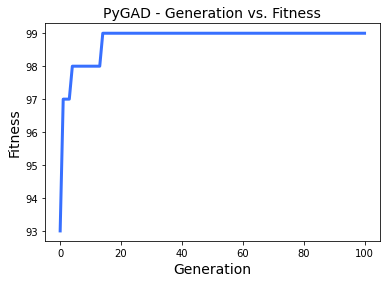

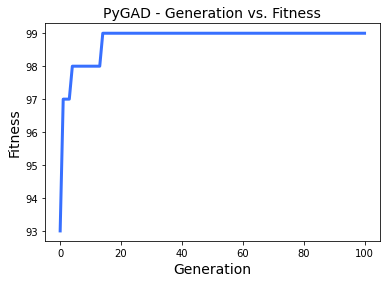

In [14]:
ga_instance.plot_fitness()

In [15]:
# Evaluate original model
original_solution = model2.optimize()
original_biomass = original_solution.objective_value

# Evaluate optimized model
model_copy = model.copy()
#for i, reaction in enumerate(model_copy.reactions):
#    flux = solution[i]
#    if flux >= 0:
#        reaction.lower_bound = 0
#        reaction.upper_bound = flux
#    else:
#        reaction.lower_bound = flux
#        reaction.upper_bound = 0
optimized_solution = model_copy.optimize()
optimized_biomass = optimized_solution.objective_value

# Compare biomass production
print(f"Original biomass production: {original_biomass}")
print(f"Optimized biomass production: {optimized_biomass}")

Original biomass production: 0.8739215069684305
Optimized biomass production: 0.0


In [16]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


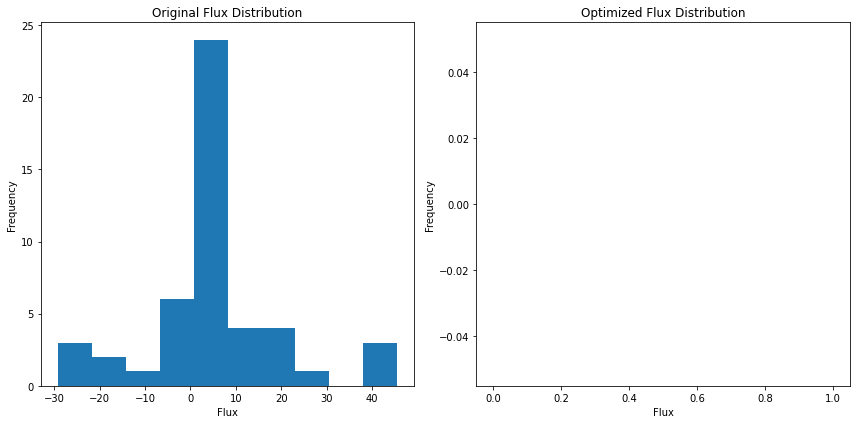

In [17]:
# Compare flux distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist([flux for flux in original_solution.fluxes if abs(flux) > 1e-6])  # exclude near-zero fluxes
plt.title("Original Flux Distribution")
plt.xlabel("Flux")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist([flux for flux in optimized_solution.fluxes if abs(flux) > 1e-6])  # exclude near-zero fluxes
plt.title("Optimized Flux Distribution")
plt.xlabel("Flux")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (101,)

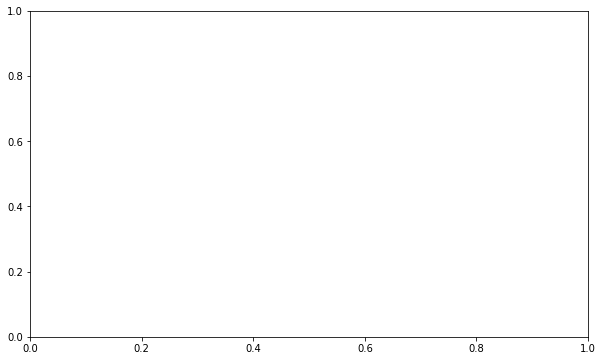

In [35]:

# Plot GA progress
plt.figure(figsize=(10, 6))
plt.plot(ga_instance.generations_completed, ga_instance.best_solutions_fitness)
plt.title("GA Progress")
plt.xlabel("Generation")
plt.ylabel("Best Fitness (Biomass Production)")
plt.show()